# Import Library & Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
from scipy import stats
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [ ]:
!kaggle datasets download -d iammustafatz/diabetes-prediction-dataset --force
!unzip "/content/diabetes-prediction-dataset.zip" -d "/content/diabetes-prediction-dataset"

df = pd.read_csv('/content/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')
df.head()

Dataset URL: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset
License(s): copyright-authors
100% 734k/734k [00:00<00:00, 1.60MB/s]
100% 734k/734k [00:00<00:00, 1.60MB/s]
Archive:  /content/diabetes-prediction-dataset.zip
replace /content/diabetes-prediction-dataset/diabetes_prediction_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: /content/diabetes-prediction-dataset/diabetes_prediction_dataset.csv  


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
def build_svc(X_train, y_train, method="rbf"):
    if method not in ["rbf", "sigmoid", "poly", "linear"]:
        method = "rbf"

    model = SVC(kernel=method)
    model.fit(X_train, y_train)

    return model

def build_logistic_regression(X_train, y_train):
    model = LogisticRegression()
    return model

def build_neural_network(X_train, y_train, layers, activation='relu', model_name='Unnamed Model'):
    model = Sequential()
    model.add(Dense(layers[0], input_dim=X_train.shape[1], activation=activation))
    for neurons in layers[1:]:
        model.add(Dense(neurons, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
    model.summary()
    start_time = time.time()
    model.fit(X_train, y_train, epochs=64, batch_size=16, validation_split=0.2, verbose=1, callbacks=[early_stopping])
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Model Name: {model_name}\n")
    print(f"Elapsed Time: {elapsed_time} seconds\n")
    return model

    # default parameters
def build_rfc(X_train, y_train):
    model = RandomForestClassifier(random_state=0)
    model.fit(X_train, y_train)
    return model

    # with 150 decision-trees
def build_rfc_150(X_train, y_train):
    model = RandomForestClassifier(n_estimators=150, random_state=0)
    model.fit(X_train, y_train)
    return model

    # balanced random forest classifier
def build_brfc(X_train, y_train):
    model = BalancedRandomForestClassifier(n_estimators=150, random_state=2)
    model.fit(X_train, y_train)
    return model

def evaluation(model, X_test, y_test, is_nn=False):
    if is_nn:
        y_pred = (model.predict(X_test) > 0.5).astype("int32")
    else:
        y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt="d")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

# Missing data

In [ ]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


# Preprocessing

In [ ]:
df.duplicated().sum()

3854

In [ ]:
df = df.drop_duplicates()
df = df[df['gender'].isin(['Female', 'Male'])]

In [ ]:
df.groupby('diabetes').count()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
diabetes,,,,,,,,
0,87646,87646,87646,87646,87646,87646,87646,87646
1,8482,8482,8482,8482,8482,8482,8482,8482


In [ ]:
df.groupby('gender').count()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,,,,,,,,
Female,56161,56161,56161,56161,56161,56161,56161,56161
Male,39967,39967,39967,39967,39967,39967,39967,39967


In [ ]:
df.groupby('smoking_history').count()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
smoking_history,,,,,,,,
No Info,32881,32881,32881,32881,32881,32881,32881,32881
current,9197,9197,9197,9197,9197,9197,9197,9197
ever,3997,3997,3997,3997,3997,3997,3997,3997
former,9299,9299,9299,9299,9299,9299,9299,9299
never,34395,34395,34395,34395,34395,34395,34395,34395
not current,6359,6359,6359,6359,6359,6359,6359,6359


In [ ]:
df = df[df['gender'].isin(['Female', 'Male'])]
df.gender.replace({'Female': 0, 'Male': 1}, inplace=True)
df.smoking_history.replace({'never': 0, 'ever': 1, 'former':1, 'not current':1, 'current':2, 'No Info':2}, inplace=True)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,2,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,2,23.45,5.0,155,0
4,1,76.0,1,1,2,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,2,24.60,4.8,145,0
99996,0,2.0,0,0,2,17.37,6.5,100,0
99997,1,66.0,0,0,1,27.83,5.7,155,0
99998,0,24.0,0,0,0,35.42,4.0,100,0


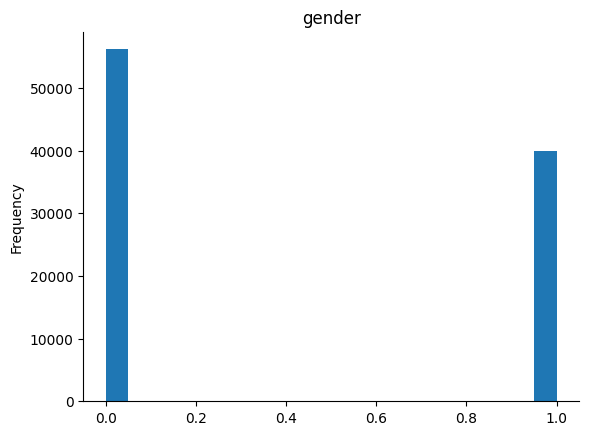

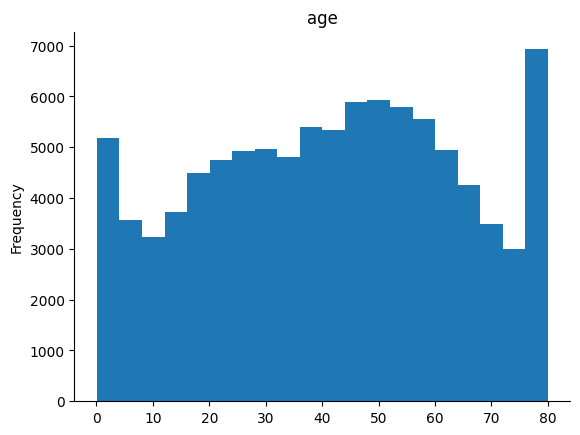

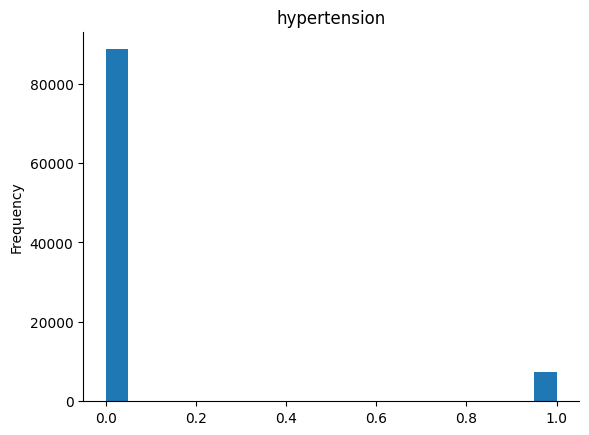

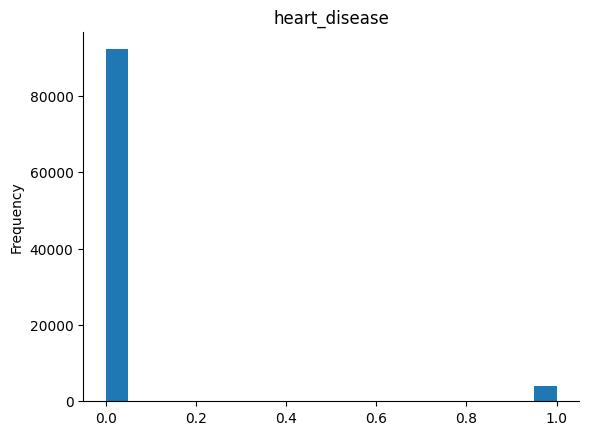

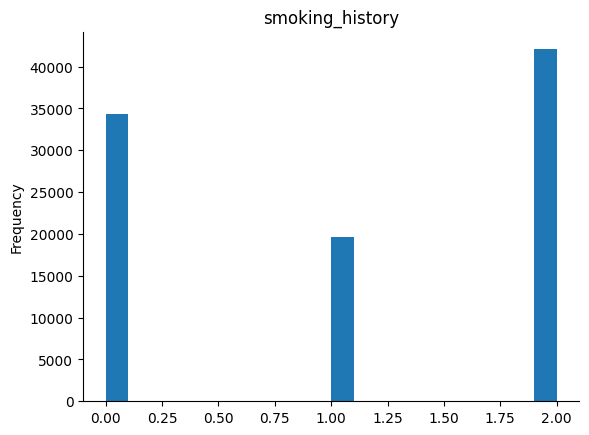

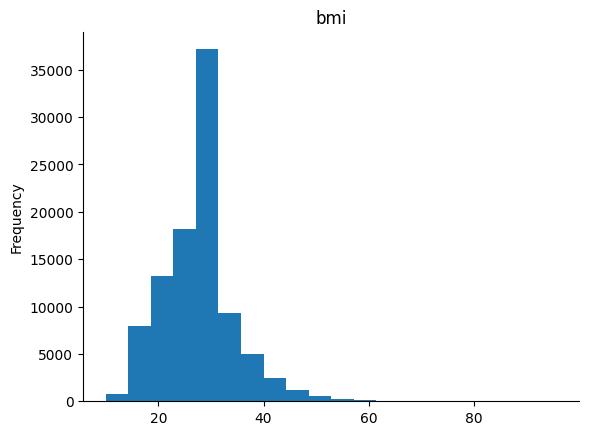

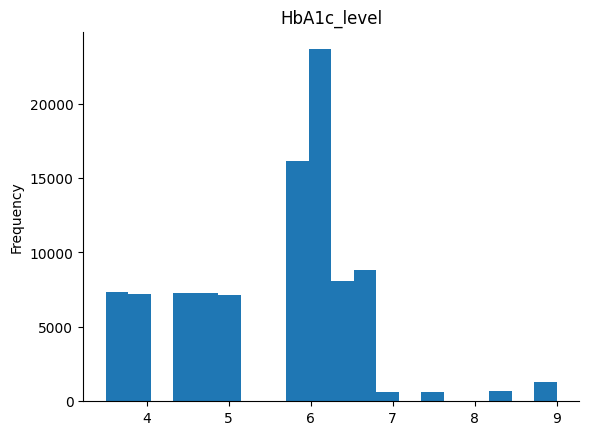

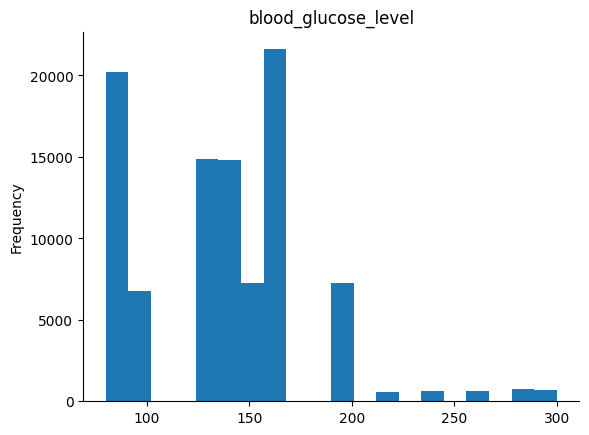

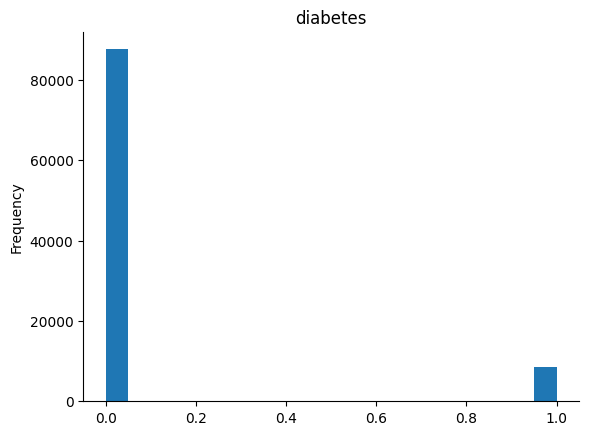

In [ ]:
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        plt.figure()
        df[column].plot(kind='hist', bins=20, title=column)
        plt.gca().spines[['top', 'right']].set_visible(False)
        plt.show()
    else:
        print(f"Skipping column {column} because it contains non-numeric data.")


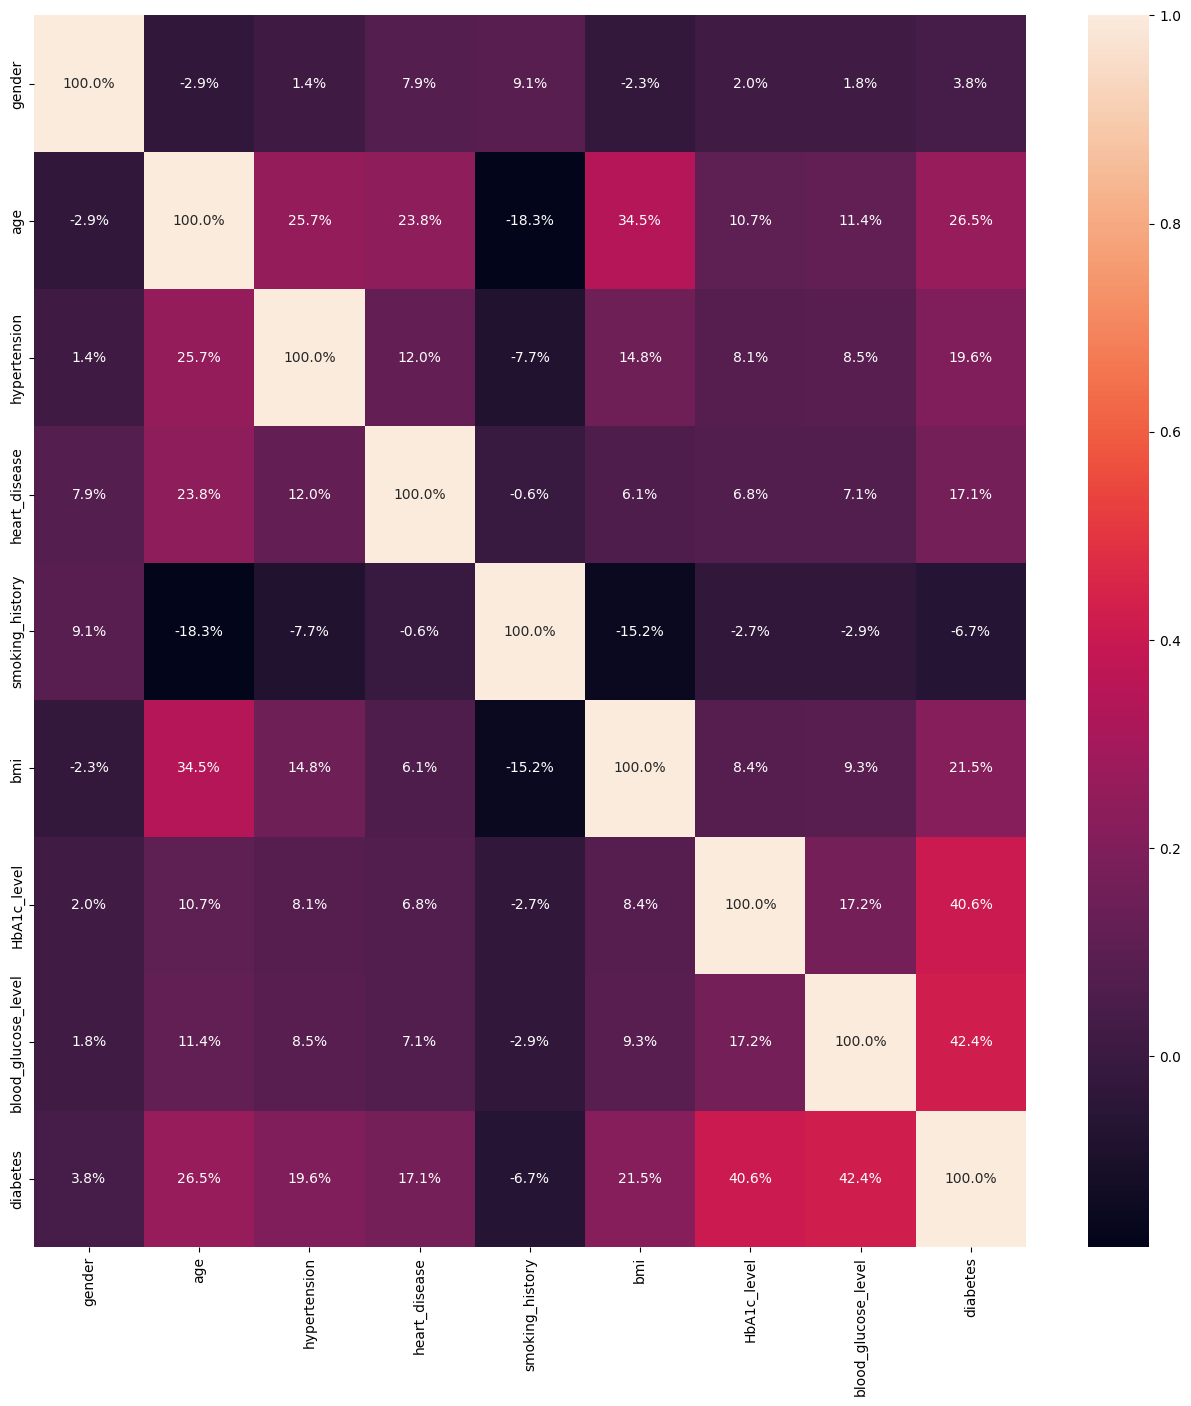

In [ ]:
corr = df.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corr, annot=True, fmt=".1%")

plt.show()

In [ ]:
df.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000
mean,0.415769,41.796617,0.077615,0.040810,1.079925,27.321450,5.532633,138.218001,0.088237
std,0.492857,22.463329,0.267567,0.197851,0.888343,6.767811,1.073225,40.911190,0.283640
min,0.000000,0.080000,0.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,0.000000,43.000000,0.000000,0.000000,1.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,59.000000,0.000000,0.000000,2.000000,29.860000,6.200000,159.000000,0.000000
max,1.000000,80.000000,1.000000,1.000000,2.000000,95.690000,9.000000,300.000000,1.000000


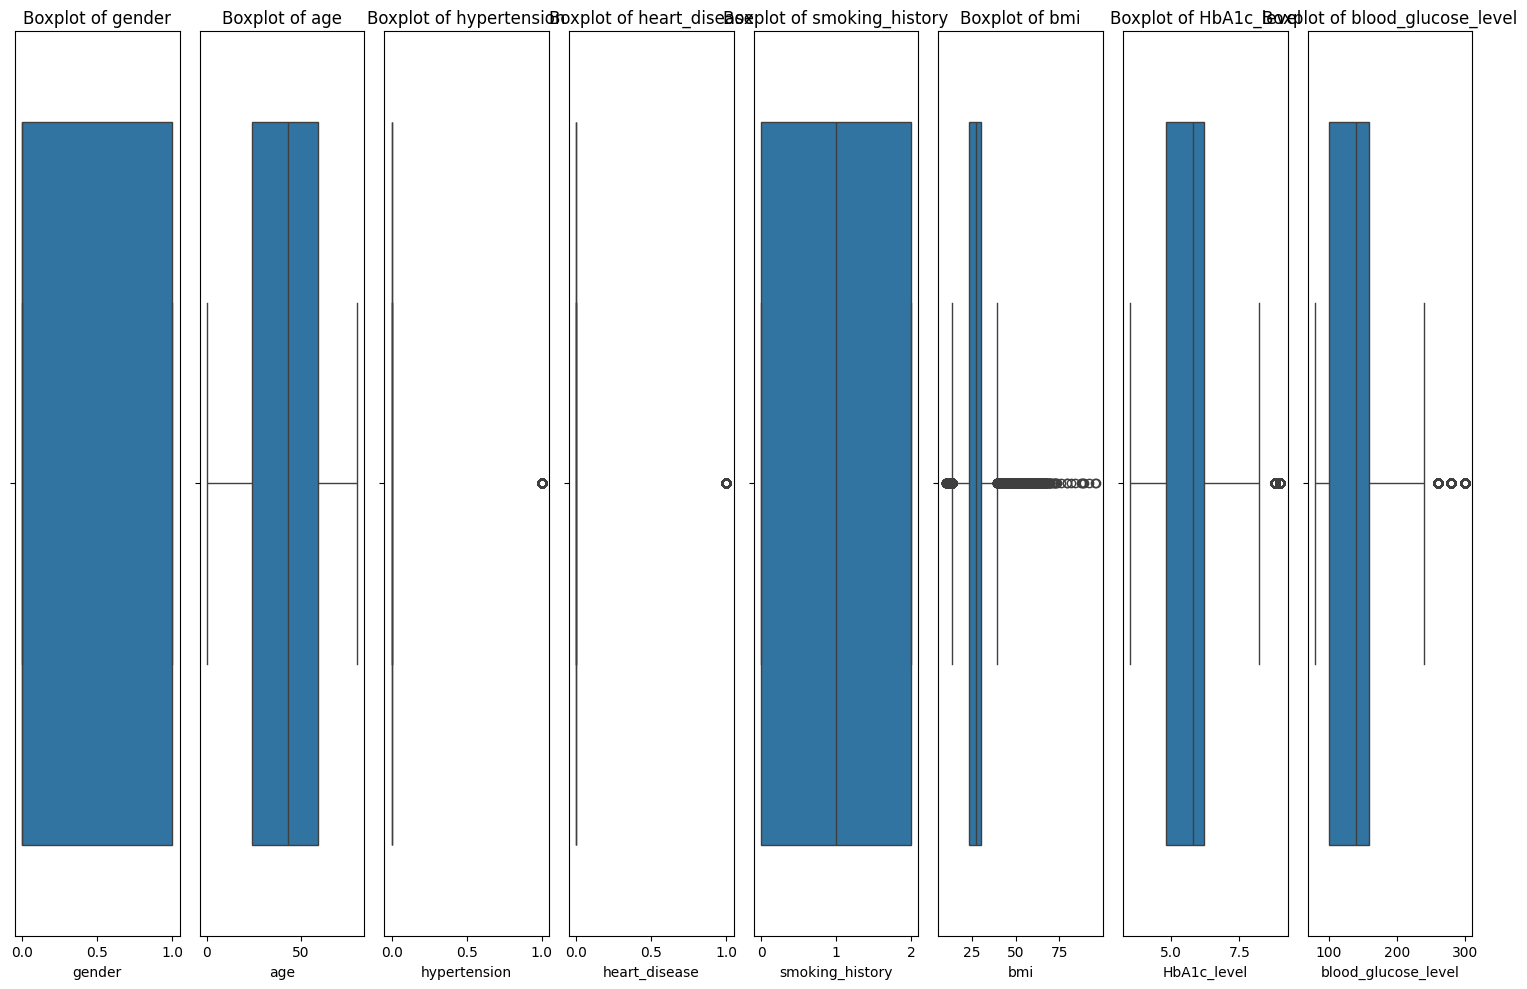

In [ ]:
def plot_boxplots(df):
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(df.columns):
        plt.subplot(1, len(df.columns), i + 1)
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot of {column}')
    plt.tight_layout()
    plt.show()

plot_boxplots(df.drop('diabetes', axis=1))

## Max Feature
### Max BMI ever recorded is 175 - 204

In [ ]:
print("Maximum values of each column:\n", df.max())

Maximum values of each column:
 gender                   1.00
age                     80.00
hypertension             1.00
heart_disease            1.00
smoking_history          2.00
bmi                     95.69
HbA1c_level              9.00
blood_glucose_level    300.00
diabetes                 1.00
dtype: float64


# Standarisasi

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('diabetes', axis=1))
Xr = df.drop(['diabetes'], axis=1)
X = df_scaled
y = df['diabetes']


# Split data to data test and train

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, y, test_size=0.30, stratify=y)

# Build Neural Network Model and Evaluation

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 8)                 72        
                                                                 
 dense_11 (Dense)            (None, 4)                 36        
                                                                 
 dense_12 (Dense)            (None, 1)                 5         
                                                                 
Total params: 113 (452.00 Byte)
Trainable params: 113 (452.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
3365/3365 [==============================] - 18s 5ms/step - loss: 0.1612 - accuracy: 0.9446 - val_loss: 0.1220 - val_accuracy: 0.9588
Epoch 2/50
3365/3365 [==============================] - 10s 3ms/step - loss: 0.1199 - accuracy: 0.9575 - val_loss: 0.1251 - val_accurac

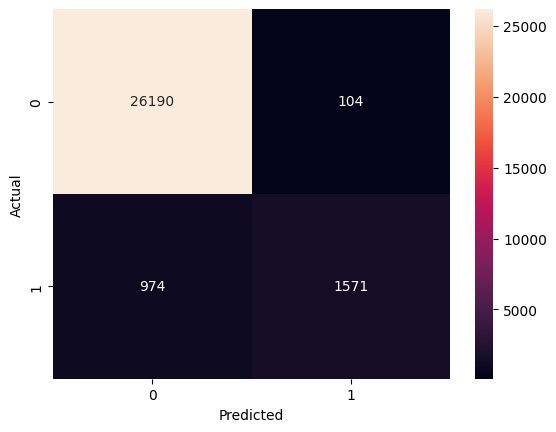

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 8)                 72        
                                                                 
 dense_14 (Dense)            (None, 4)                 36        
                                                                 
 dense_15 (Dense)            (None, 2)                 10        
                                                                 
 dense_16 (Dense)            (None, 1)                 3         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
3365/3365 [==============================] - 9s 2ms/step - loss: 0.1676 - accuracy: 0.9368 - val_loss: 0.1400 - val_accuracy: 0.9555
Epoc

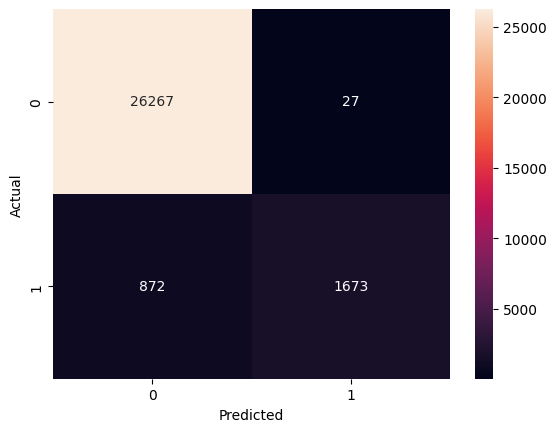

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 8)                 72        
                                                                 
 dense_18 (Dense)            (None, 4)                 36        
                                                                 
 dense_19 (Dense)            (None, 1)                 5         
                                                                 
Total params: 113 (452.00 Byte)
Trainable params: 113 (452.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
3365/3365 [==============================] - 12s 3ms/step - loss: 0.1589 - accuracy: 0.9440 - val_loss: 0.1194 - val_accuracy: 0.9584
Epoch 2/50
3365/3365 [==============================] - 11s 3ms/step - loss: 0.1180 - accuracy: 0.9580 - val_loss: 0.1188 - val_accurac

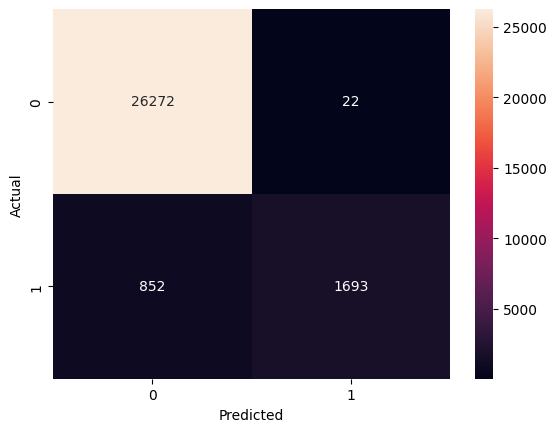

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 8)                 72        
                                                                 
 dense_21 (Dense)            (None, 4)                 36        
                                                                 
 dense_22 (Dense)            (None, 2)                 10        
                                                                 
 dense_23 (Dense)            (None, 1)                 3         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
3365/3365 [==============================] - 12s 3ms/step - loss: 0.1476 - accuracy: 0.9446 - val_loss: 0.1211 - val_accuracy: 0.9603
Epo

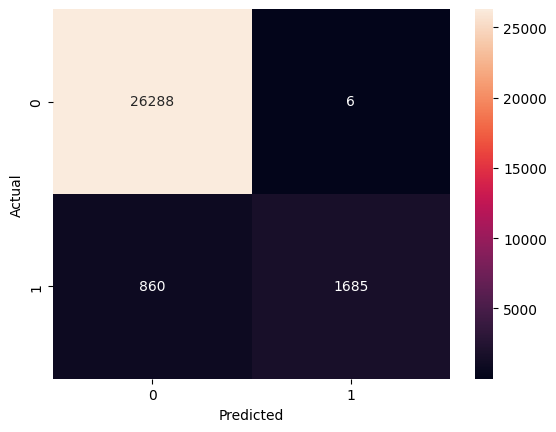

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 8)                 72        
                                                                 
 dense_25 (Dense)            (None, 4)                 36        
                                                                 
 dense_26 (Dense)            (None, 1)                 5         
                                                                 
Total params: 113 (452.00 Byte)
Trainable params: 113 (452.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
3365/3365 [==============================] - 12s 3ms/step - loss: 0.1745 - accuracy: 0.9347 - val_loss: 0.1329 - val_accuracy: 0.9591
Epoch 2/50
3365/3365 [==============================] - 13s 4ms/step - loss: 0.1274 - accuracy: 0.9586 - val_loss: 0.1263 - val_accurac

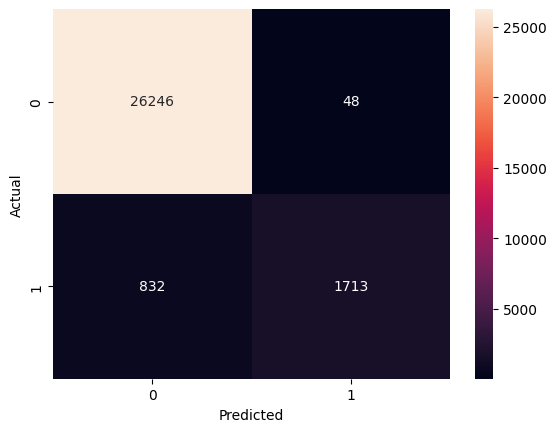

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 8)                 72        
                                                                 
 dense_28 (Dense)            (None, 4)                 36        
                                                                 
 dense_29 (Dense)            (None, 2)                 10        
                                                                 
 dense_30 (Dense)            (None, 1)                 3         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
3365/3365 [==============================] - 28s 7ms/step - loss: 0.1837 - accuracy: 0.9351 - val_loss: 0.1245 - val_accuracy: 0.9565
Epo

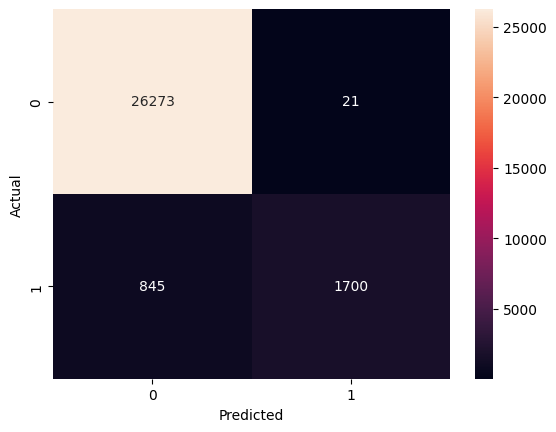

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 8)                 72        
                                                                 
 dense_32 (Dense)            (None, 4)                 36        
                                                                 
 dense_33 (Dense)            (None, 1)                 5         
                                                                 
Total params: 113 (452.00 Byte)
Trainable params: 113 (452.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
3365/3365 [==============================] - 13s 4ms/step - loss: 0.1890 - accuracy: 0.9208 - val_loss: 0.1403 - val_accuracy: 0.9575
Epoch 2/50
3365/3365 [==============================] - 11s 3ms/step - loss: 0.1321 - accuracy: 0.9574 - val_loss: 0.1261 - val_accura

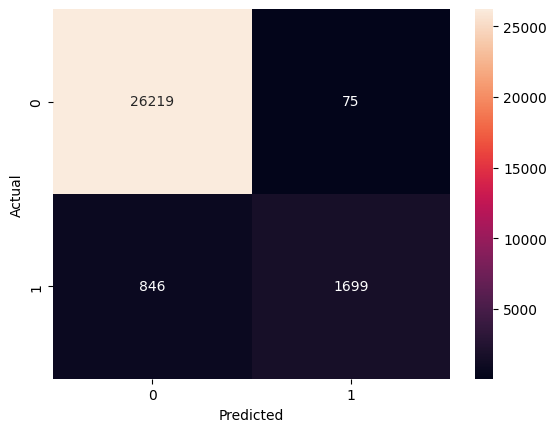

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 8)                 72        
                                                                 
 dense_35 (Dense)            (None, 4)                 36        
                                                                 
 dense_36 (Dense)            (None, 2)                 10        
                                                                 
 dense_37 (Dense)            (None, 1)                 3         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
3365/3365 [==============================] - 16s 4ms/step - loss: 0.1717 - accuracy: 0.9354 - val_loss: 0.1398 - val_accuracy: 0.9545
Ep

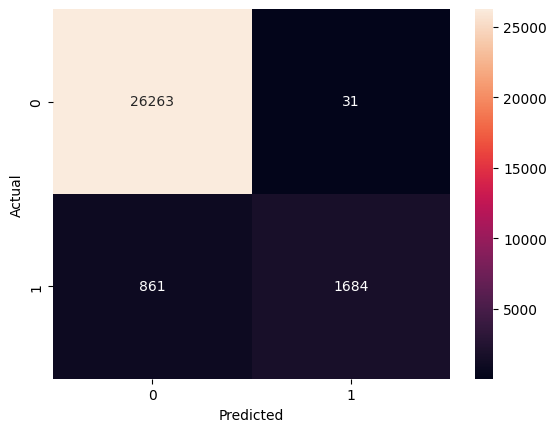

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 8)                 72        
                                                                 
 dense_39 (Dense)            (None, 4)                 36        
                                                                 
 dense_40 (Dense)            (None, 1)                 5         
                                                                 
Total params: 113 (452.00 Byte)
Trainable params: 113 (452.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
3365/3365 [==============================] - 13s 4ms/step - loss: 0.1707 - accuracy: 0.9324 - val_loss: 0.1191 - val_accuracy: 0.9606
Epoch 2/50
3365/3365 [==============================] - 11s 3ms/step - loss: 0.1179 - accuracy: 0.9585 - val_loss: 0.1182 - val_accura

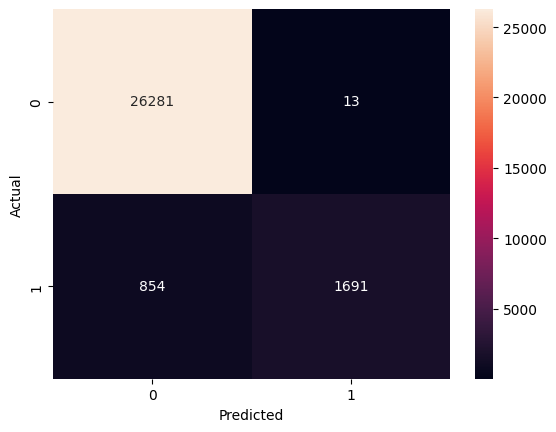

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 8)                 72        
                                                                 
 dense_42 (Dense)            (None, 4)                 36        
                                                                 
 dense_43 (Dense)            (None, 2)                 10        
                                                                 
 dense_44 (Dense)            (None, 1)                 3         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
3365/3365 [==============================] - 12s 3ms/step - loss: 0.2485 - accuracy: 0.9495 - val_loss: 0.1386 - val_accuracy: 0.9617
Ep

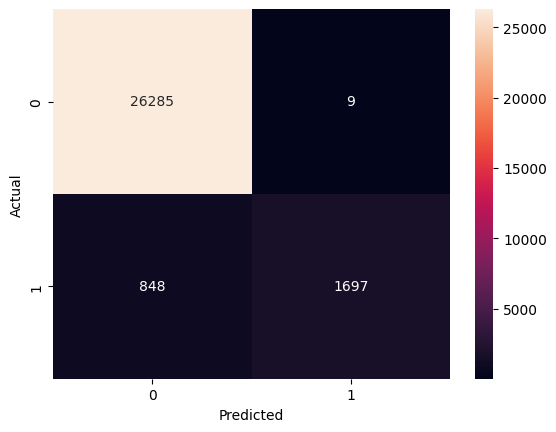

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 8)                 72        
                                                                 
 dense_46 (Dense)            (None, 4)                 36        
                                                                 
 dense_47 (Dense)            (None, 1)                 5         
                                                                 
Total params: 113 (452.00 Byte)
Trainable params: 113 (452.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
3365/3365 [==============================] - 11s 3ms/step - loss: 0.1535 - accuracy: 0.9474 - val_loss: 0.1252 - val_accuracy: 0.9560
Epoch 2/50
3365/3365 [==============================] - 9s 3ms/step - loss: 0.1200 - accuracy: 0.9579 - val_loss: 0.1210 - val_accurac

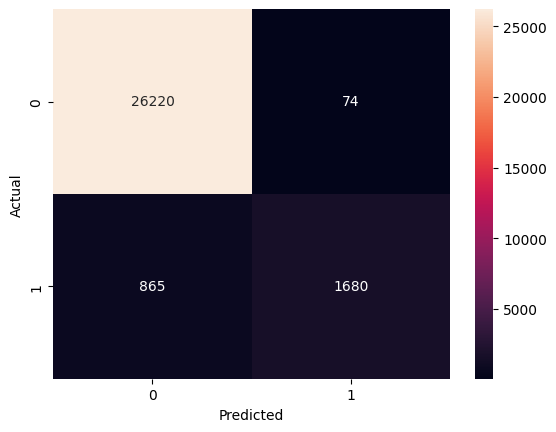

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 8)                 72        
                                                                 
 dense_49 (Dense)            (None, 4)                 36        
                                                                 
 dense_50 (Dense)            (None, 2)                 10        
                                                                 
 dense_51 (Dense)            (None, 1)                 3         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
3365/3365 [==============================] - 13s 4ms/step - loss: 0.2352 - accuracy: 0.9329 - val_loss: 0.1187 - val_accuracy: 0.9599
Ep

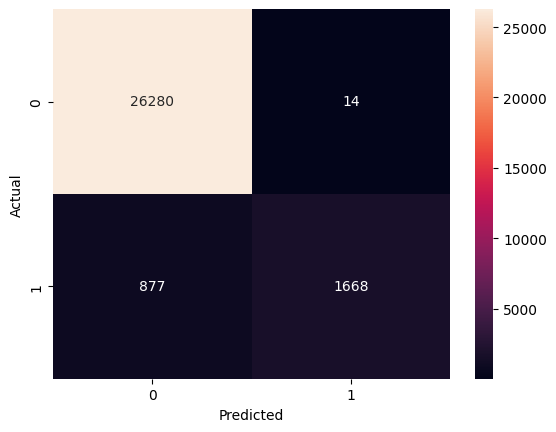

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 8)                 72        
                                                                 
 dense_53 (Dense)            (None, 4)                 36        
                                                                 
 dense_54 (Dense)            (None, 1)                 5         
                                                                 
Total params: 113 (452.00 Byte)
Trainable params: 113 (452.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
3365/3365 [==============================] - 14s 4ms/step - loss: 0.1554 - accuracy: 0.9458 - val_loss: 0.1226 - val_accuracy: 0.9582
Epoch 2/50
3365/3365 [==============================] - 12s 4ms/step - loss: 0.1187 - accuracy: 0.9583 - val_loss: 0.1207 - val_accura

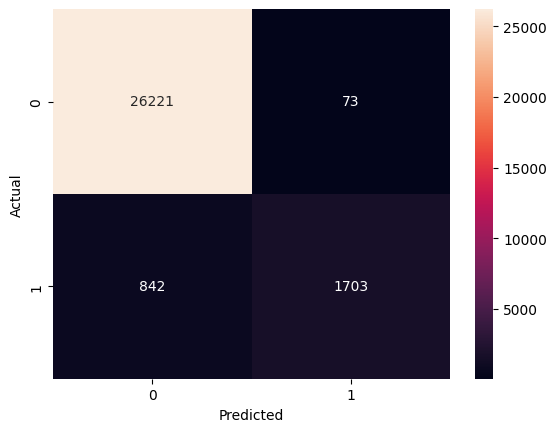

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 8)                 72        
                                                                 
 dense_56 (Dense)            (None, 4)                 36        
                                                                 
 dense_57 (Dense)            (None, 2)                 10        
                                                                 
 dense_58 (Dense)            (None, 1)                 3         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
3365/3365 [==============================] - 13s 3ms/step - loss: 0.1510 - accuracy: 0.9448 - val_loss: 0.1250 - val_accuracy: 0.9556
Ep

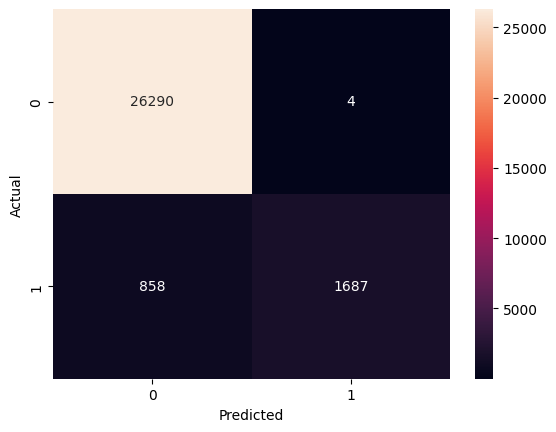

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 64)                576       
                                                                 
 dense_60 (Dense)            (None, 32)                2080      
                                                                 
 dense_61 (Dense)            (None, 16)                528       
                                                                 
 dense_62 (Dense)            (None, 8)                 136       
                                                                 
 dense_63 (Dense)            (None, 4)                 36        
                                                                 
 dense_64 (Dense)            (None, 2)                 10        
                                                                 
 dense_65 (Dense)            (None, 1)               

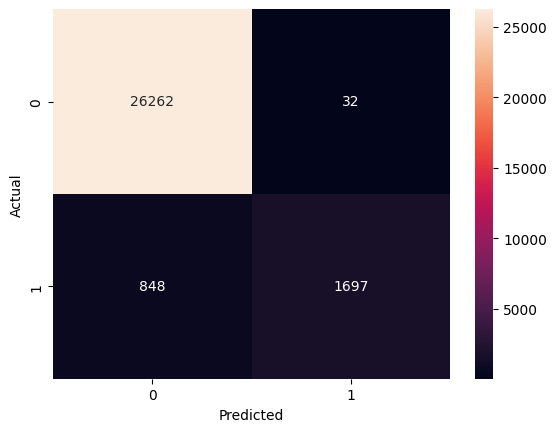

In [ ]:
nn_models = {}
nn_configurations = [
    ([8, 4], 'relu'),
    ([8, 4, 2], 'relu'),
    ([8, 4], 'elu'),
    ([8, 4, 2], 'elu'),
    ([8, 4], 'gelu'),
    ([8, 4, 2], 'gelu'),
    ([8, 4], 'relu6'),
    ([8, 4, 2], 'relu6'),
    ([8, 4], 'swish'),
    ([8, 4, 2], 'swish'),
    ([8, 4], 'leaky_relu'),
    ([8, 4, 2], 'leaky_relu'),
    ([8, 4], 'selu'),
    ([8, 4, 2], 'selu'),
    ([64, 32, 16, 8, 4, 2], 'relu'),
]

for i, (layers, activation) in enumerate(nn_configurations, start=1):
    layers_str = '_'.join(map(str, layers))
    activation_name = activation.replace('_', '')
    model_name = f"nn_model_{layers_str}_{activation_name}"
    current_model = build_neural_network(X_train, y_train, layers, activation=activation, model_name=model_name)
    nn_models[model_name] = current_model
    evaluation(current_model, X_test, y_test, is_nn=True)

In [ ]:
# nn_models = {}
nn_configurations = [
    ([8], 'relu'),
    ([8], 'elu'),
    ([8], 'gelu'),
    ([8], 'relu6'),
    ([8], 'swish'),
    ([8], 'leaky_relu'),
    ([8], 'selu'),
]

for i, (layers, activation) in enumerate(nn_configurations, start=1):
    layers_str = '_'.join(map(str, layers))
    activation_name = activation.replace('_', '')
    model_name = f"nn_model_{layers_str}_{activation_name}"
    current_model = build_neural_network(X_train, y_train, layers, activation=activation, model_name=model_name)
    nn_models[model_name] = current_model
    evaluation(current_model, X_test, y_test, is_nn=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 289 (1.13 KB)
Trainable params: 289 (1.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
3365/3365 [==============================] - 10s 3ms/step - loss: 0.1460 - accuracy: 0.9492 - val_loss: 0.1198 - val_accuracy: 0.9565
Epoch 2/50
3365/3365 [==============================] - 7s 2ms/step - loss: 0.1145 - accuracy: 0.9589 - val_loss: 0.1123 - val_accuracy: 0.9617
E

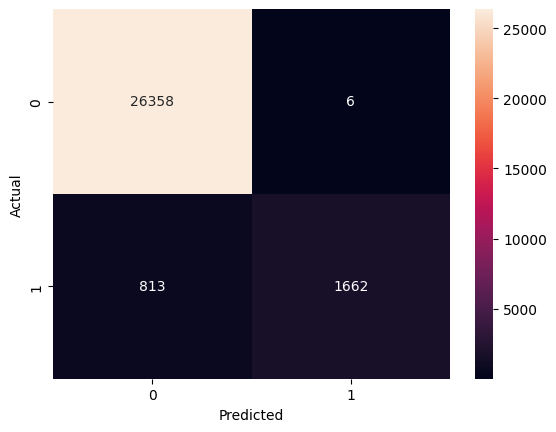

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                144       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 4)                 36        
                                                                 
 dense_6 (Dense)             (None, 1)                 5         
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
3365/3365 [==============================] - 12s 3ms/step - loss: 0.1470 - accuracy: 0.9497 - val_loss: 0.1229 - val_accuracy: 0.9562
Epoch 2/50


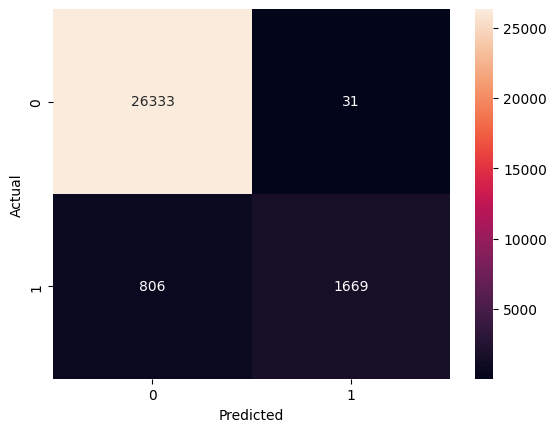

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 16)                144       
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 289 (1.13 KB)
Trainable params: 289 (1.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
3365/3365 [==============================] - 10s 3ms/step - loss: 0.1397 - accuracy: 0.9511 - val_loss: 0.1196 - val_accuracy: 0.9585
Epoch 2/50
3365/3365 [==============================] - 9s 3ms/step - loss: 0.1170 - accuracy: 0.9592 - val_loss: 0.1158 - val_accuracy: 0.9617

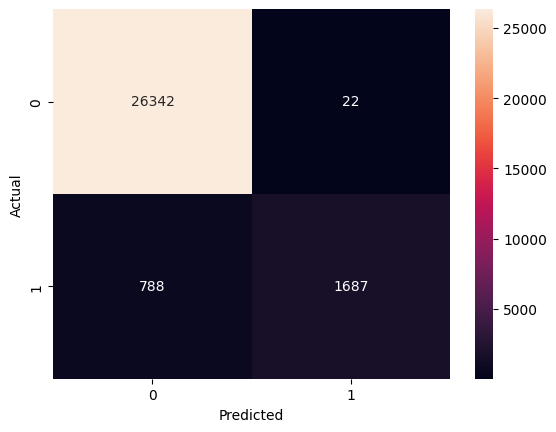

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 16)                144       
                                                                 
 dense_11 (Dense)            (None, 8)                 136       
                                                                 
 dense_12 (Dense)            (None, 4)                 36        
                                                                 
 dense_13 (Dense)            (None, 1)                 5         
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
3365/3365 [==============================] - 11s 3ms/step - loss: 0.1377 - accuracy: 0.9517 - val_loss: 0.1242 - val_accuracy: 0.9545
Epoch 2/50


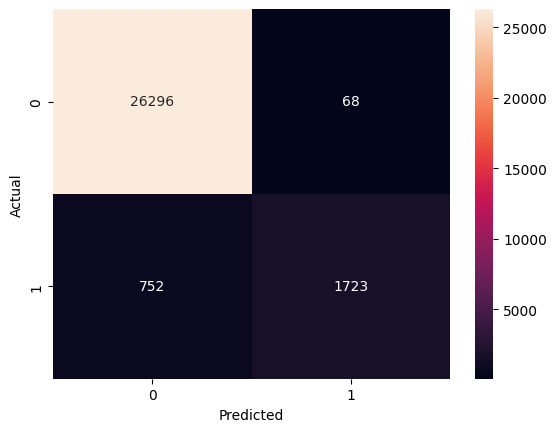

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 16)                144       
                                                                 
 dense_15 (Dense)            (None, 8)                 136       
                                                                 
 dense_16 (Dense)            (None, 1)                 9         
                                                                 
Total params: 289 (1.13 KB)
Trainable params: 289 (1.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
3365/3365 [==============================] - 11s 3ms/step - loss: 0.1433 - accuracy: 0.9513 - val_loss: 0.1214 - val_accuracy: 0.9580
Epoch 2/50
3365/3365 [==============================] - 10s 3ms/step - loss: 0.1196 - accuracy: 0.9576 - val_loss: 0.1207 - val_accuracy: 0.959

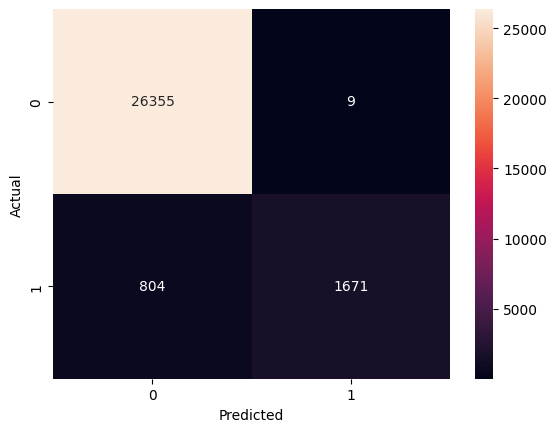

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 16)                144       
                                                                 
 dense_18 (Dense)            (None, 8)                 136       
                                                                 
 dense_19 (Dense)            (None, 4)                 36        
                                                                 
 dense_20 (Dense)            (None, 1)                 5         
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
3365/3365 [==============================] - 10s 3ms/step - loss: 0.1479 - accuracy: 0.9511 - val_loss: 0.1138 - val_accuracy: 0.9607
Epoch 2/50


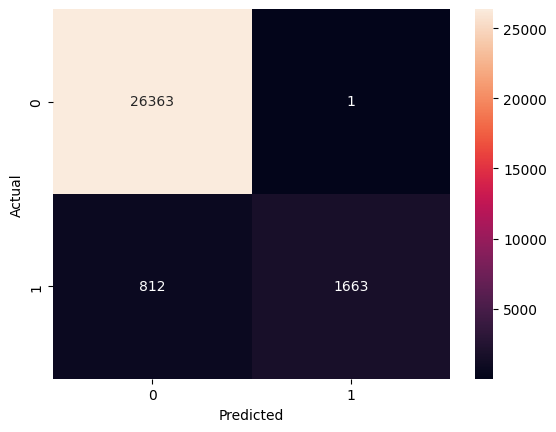

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 16)                144       
                                                                 
 dense_22 (Dense)            (None, 8)                 136       
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 289 (1.13 KB)
Trainable params: 289 (1.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
3365/3365 [==============================] - 12s 3ms/step - loss: 0.1501 - accuracy: 0.9454 - val_loss: 0.1188 - val_accuracy: 0.9594
Epoch 2/50
3365/3365 [==============================] - 9s 3ms/step - loss: 0.1162 - accuracy: 0.9597 - val_loss: 0.1130 - val_accuracy: 0.9620

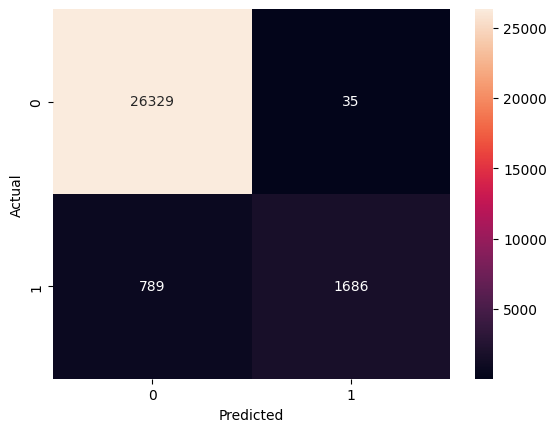

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 16)                144       
                                                                 
 dense_25 (Dense)            (None, 8)                 136       
                                                                 
 dense_26 (Dense)            (None, 4)                 36        
                                                                 
 dense_27 (Dense)            (None, 1)                 5         
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
3365/3365 [==============================] - 11s 3ms/step - loss: 0.1445 - accuracy: 0.9510 - val_loss: 0.1202 - val_accuracy: 0.9582
Epoch 2/50


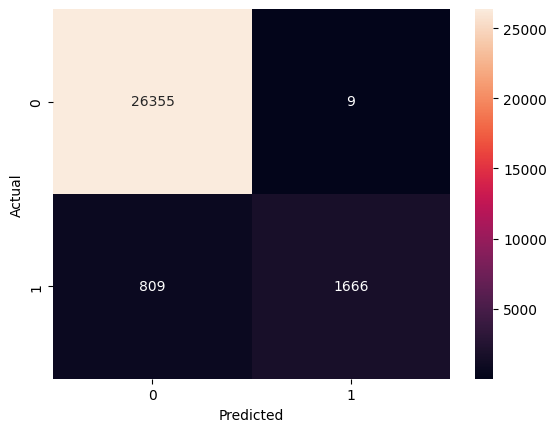

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 16)                144       
                                                                 
 dense_29 (Dense)            (None, 8)                 136       
                                                                 
 dense_30 (Dense)            (None, 1)                 9         
                                                                 
Total params: 289 (1.13 KB)
Trainable params: 289 (1.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
3365/3365 [==============================] - 11s 3ms/step - loss: 0.1487 - accuracy: 0.9484 - val_loss: 0.1197 - val_accuracy: 0.9574
Epoch 2/50
3365/3365 [==============================] - 8s 2ms/step - loss: 0.1172 - accuracy: 0.9592 - val_loss: 0.1176 - val_accuracy: 0.9592

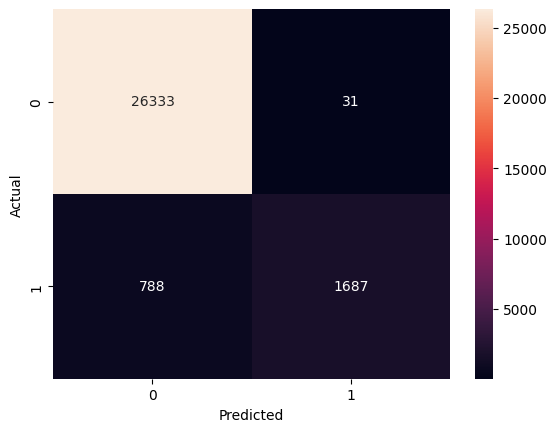

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 16)                144       
                                                                 
 dense_32 (Dense)            (None, 8)                 136       
                                                                 
 dense_33 (Dense)            (None, 4)                 36        
                                                                 
 dense_34 (Dense)            (None, 1)                 5         
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
3365/3365 [==============================] - 11s 3ms/step - loss: 0.2052 - accuracy: 0.9521 - val_loss: 0.1348 - val_accuracy: 0.9571
Epoch 2/50


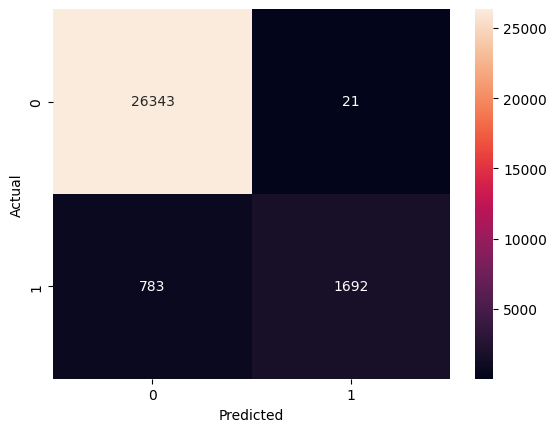

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 16)                144       
                                                                 
 dense_36 (Dense)            (None, 8)                 136       
                                                                 
 dense_37 (Dense)            (None, 1)                 9         
                                                                 
Total params: 289 (1.13 KB)
Trainable params: 289 (1.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
3365/3365 [==============================] - 9s 2ms/step - loss: 0.1382 - accuracy: 0.9508 - val_loss: 0.1198 - val_accuracy: 0.9575
Epoch 2/50
3365/3365 [==============================] - 9s 3ms/step - loss: 0.1168 - accuracy: 0.9585 - val_loss: 0.1163 - val_accuracy: 0.9585

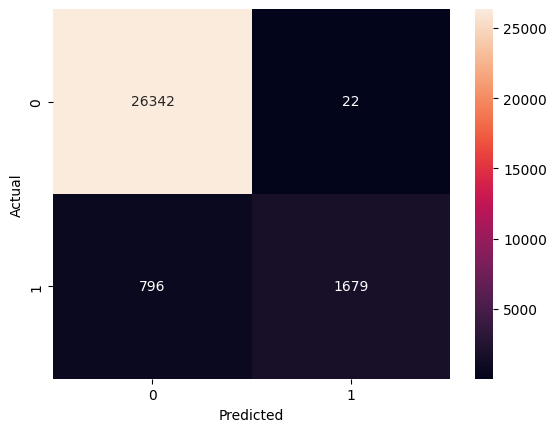

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 16)                144       
                                                                 
 dense_39 (Dense)            (None, 8)                 136       
                                                                 
 dense_40 (Dense)            (None, 4)                 36        
                                                                 
 dense_41 (Dense)            (None, 1)                 5         
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
3365/3365 [==============================] - 11s 3ms/step - loss: 0.1443 - accuracy: 0.9494 - val_loss: 0.1155 - val_accuracy: 0.9597
Epoch 2/50

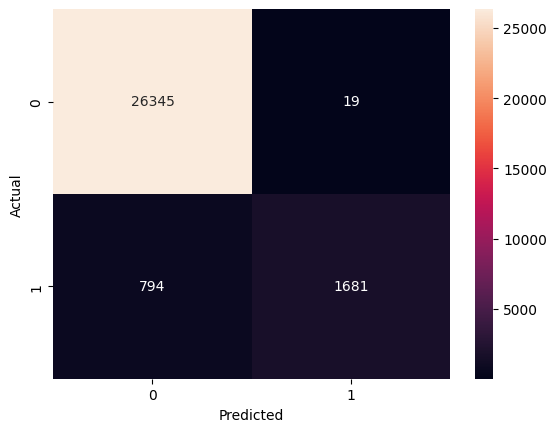

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 16)                144       
                                                                 
 dense_43 (Dense)            (None, 8)                 136       
                                                                 
 dense_44 (Dense)            (None, 1)                 9         
                                                                 
Total params: 289 (1.13 KB)
Trainable params: 289 (1.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
3365/3365 [==============================] - 11s 3ms/step - loss: 0.1393 - accuracy: 0.9498 - val_loss: 0.1190 - val_accuracy: 0.9600
Epoch 2/50
3365/3365 [==============================] - 9s 3ms/step - loss: 0.1169 - accuracy: 0.9586 - val_loss: 0.1161 - val_accuracy: 0.960

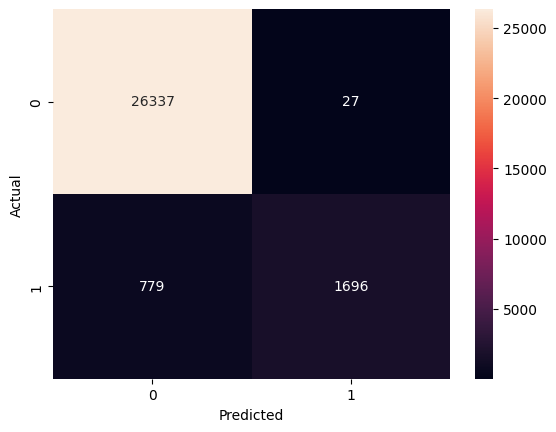

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 16)                144       
                                                                 
 dense_46 (Dense)            (None, 8)                 136       
                                                                 
 dense_47 (Dense)            (None, 4)                 36        
                                                                 
 dense_48 (Dense)            (None, 1)                 5         
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
3365/3365 [==============================] - 12s 3ms/step - loss: 0.1447 - accuracy: 0.9497 - val_loss: 0.1179 - val_accuracy: 0.9594
Epoch 2/50

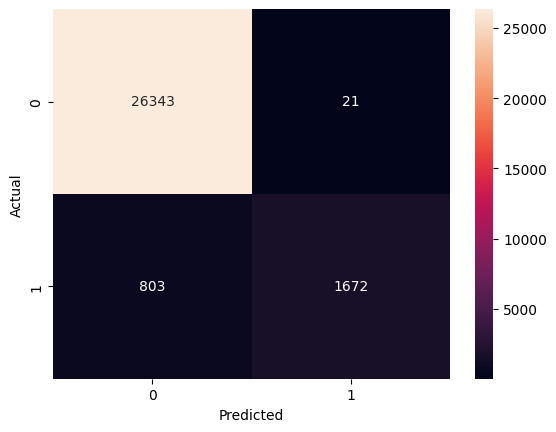

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 64)                576       
                                                                 
 dense_50 (Dense)            (None, 32)                2080      
                                                                 
 dense_51 (Dense)            (None, 16)                528       
                                                                 
 dense_52 (Dense)            (None, 8)                 136       
                                                                 
 dense_53 (Dense)            (None, 4)                 36        
                                                                 
 dense_54 (Dense)            (None, 2)                 10        
                                                                 
 dense_55 (Dense)            (None, 1)               

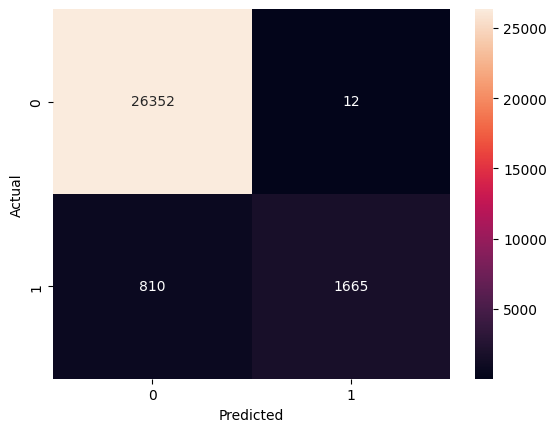

In [ ]:
# nn_models = {}
nn_configurations = [
    ([16, 8], 'relu'),
    ([16, 8, 4], 'relu'),
    ([16, 8], 'elu'),
    ([16, 8, 4], 'elu'),
    ([16, 8], 'gelu'),
    ([16, 8, 4], 'gelu'),
    ([16, 8], 'relu6'),
    ([16, 8, 4], 'relu6'),
    ([16, 8], 'swish'),
    ([16, 8, 4], 'swish'),
    ([16, 8], 'leaky_relu'),
    ([16, 8, 4], 'leaky_relu'),
    ([16, 8], 'selu'),
    ([16, 8, 4], 'selu'),
    ([64, 32, 16, 8, 4, 2], 'elu'),
]

for i, (layers, activation) in enumerate(nn_configurations, start=1):
    layers_str = '_'.join(map(str, layers))
    activation_name = activation.replace('_', '')
    model_name = f"nn_model_{layers_str}_{activation_name}"
    current_model = build_neural_network(X_train, y_train, layers, activation=activation, model_name=model_name)
    nn_models[model_name] = current_model
    evaluation(current_model, X_test, y_test, is_nn=True)

{'nn_model_8_4_relu': <keras.src.engine.sequential.Sequential object at 0x7846751ee8c0>, 'nn_model_8_4_2_relu': <keras.src.engine.sequential.Sequential object at 0x7846776550f0>, 'nn_model_8_4_elu': <keras.src.engine.sequential.Sequential object at 0x78467258a530>, 'nn_model_8_4_2_elu': <keras.src.engine.sequential.Sequential object at 0x7846603c7f70>, 'nn_model_8_4_gelu': <keras.src.engine.sequential.Sequential object at 0x784660284a30>, 'nn_model_8_4_2_gelu': <keras.src.engine.sequential.Sequential object at 0x78466004c5e0>, 'nn_model_8_4_relu6': <keras.src.engine.sequential.Sequential object at 0x784656ff7bb0>, 'nn_model_8_4_2_relu6': <keras.src.engine.sequential.Sequential object at 0x784656ccf070>, 'nn_model_8_4_swish': <keras.src.engine.sequential.Sequential object at 0x784656c824d0>, 'nn_model_8_4_2_swish': <keras.src.engine.sequential.Sequential object at 0x7846572b2170>, 'nn_model_8_4_leakyrelu': <keras.src.engine.sequential.Sequential object at 0x784674458160>, 'nn_model_8_4_

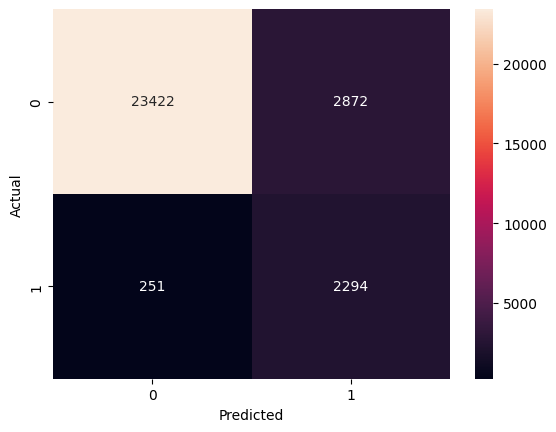

nn_model_8_4_relu_class_weight_1_1
Epoch 1/64
3365/3365 [==============================] - 12s 3ms/step - loss: 0.1813 - accuracy: 0.9261 - val_loss: 0.1209 - val_accuracy: 0.9582
Epoch 2/64
3365/3365 [==============================] - 16s 5ms/step - loss: 0.1174 - accuracy: 0.9589 - val_loss: 0.1169 - val_accuracy: 0.9580
Epoch 3/64
3365/3365 [==============================] - 17s 5ms/step - loss: 0.1147 - accuracy: 0.9592 - val_loss: 0.1144 - val_accuracy: 0.9608
Epoch 4/64
3365/3365 [==============================] - 18s 5ms/step - loss: 0.1124 - accuracy: 0.9599 - val_loss: 0.1114 - val_accuracy: 0.9622
Epoch 5/64
3365/3365 [==============================] - 10s 3ms/step - loss: 0.1093 - accuracy: 0.9605 - val_loss: 0.1093 - val_accuracy: 0.9624
Epoch 6/64
3365/3365 [==============================] - 11s 3ms/step - loss: 0.1070 - accuracy: 0.9610 - val_loss: 0.1075 - val_accuracy: 0.9624
Epoch 7/64
3365/3365 [==============================] - 12s 3ms/step - loss: 0.1049 - accuracy:

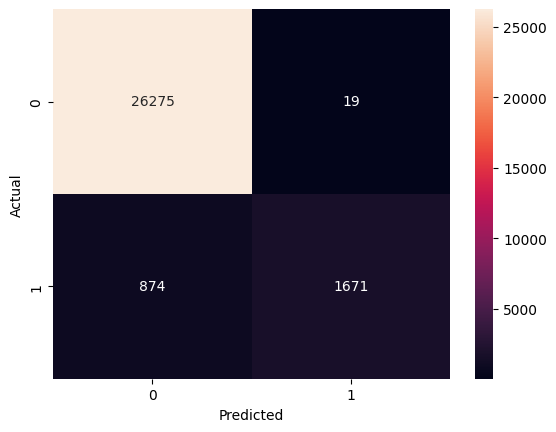

nn_model_8_4_relu_class_weight_1_3
Epoch 1/64
3365/3365 [==============================] - 12s 3ms/step - loss: 0.3286 - accuracy: 0.9239 - val_loss: 0.1635 - val_accuracy: 0.9312
Epoch 2/64
3365/3365 [==============================] - 10s 3ms/step - loss: 0.2370 - accuracy: 0.9402 - val_loss: 0.1403 - val_accuracy: 0.9445
Epoch 3/64
3365/3365 [==============================] - 11s 3ms/step - loss: 0.2333 - accuracy: 0.9417 - val_loss: 0.1482 - val_accuracy: 0.9380
Epoch 4/64
3365/3365 [==============================] - 8s 2ms/step - loss: 0.2328 - accuracy: 0.9419 - val_loss: 0.1566 - val_accuracy: 0.9321
Epoch 5/64
3365/3365 [==============================] - 10s 3ms/step - loss: 0.2322 - accuracy: 0.9419 - val_loss: 0.1548 - val_accuracy: 0.9336
Epoch 6/64
3365/3365 [==============================] - 10s 3ms/step - loss: 0.2316 - accuracy: 0.9420 - val_loss: 0.1472 - val_accuracy: 0.9383
Epoch 7/64
3365/3365 [==============================] - 9s 3ms/step - loss: 0.2307 - accuracy: 0

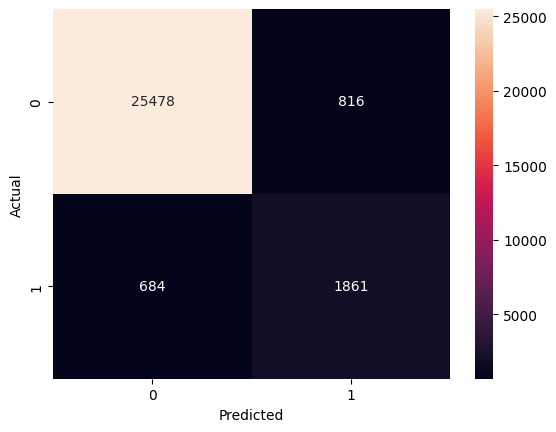

nn_model_8_4_relu_class_weight_1_5
Epoch 1/64
3365/3365 [==============================] - 11s 3ms/step - loss: 0.3621 - accuracy: 0.9071 - val_loss: 0.1796 - val_accuracy: 0.9165
Epoch 2/64
3365/3365 [==============================] - 8s 2ms/step - loss: 0.3081 - accuracy: 0.9200 - val_loss: 0.1836 - val_accuracy: 0.9151
Epoch 3/64
3365/3365 [==============================] - 10s 3ms/step - loss: 0.3007 - accuracy: 0.9221 - val_loss: 0.1709 - val_accuracy: 0.9229
Epoch 4/64
3365/3365 [==============================] - 10s 3ms/step - loss: 0.2952 - accuracy: 0.9245 - val_loss: 0.1706 - val_accuracy: 0.9235
Epoch 5/64
3365/3365 [==============================] - 8s 2ms/step - loss: 0.2913 - accuracy: 0.9253 - val_loss: 0.1766 - val_accuracy: 0.9199
Epoch 6/64
3365/3365 [==============================] - 10s 3ms/step - loss: 0.2872 - accuracy: 0.9267 - val_loss: 0.1795 - val_accuracy: 0.9163
Epoch 7/64
3365/3365 [==============================] - 12s 4ms/step - loss: 0.2841 - accuracy: 0

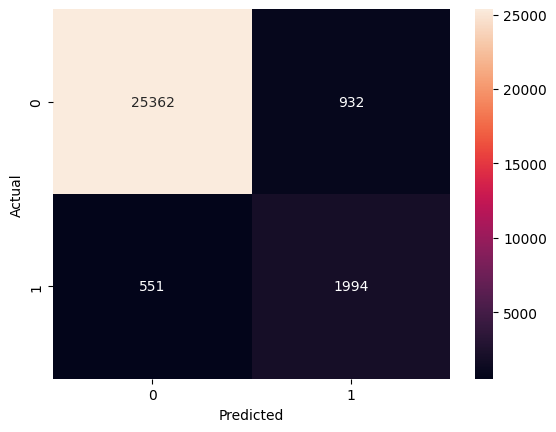

nn_model_8_4_2_relu_class_weight_0.5483847307341244_5.666919319521644
Epoch 1/64
3365/3365 [==============================] - 12s 3ms/step - loss: 0.3834 - accuracy: 0.8212 - val_loss: 0.3519 - val_accuracy: 0.8742
Epoch 2/64
3365/3365 [==============================] - 11s 3ms/step - loss: 0.2687 - accuracy: 0.8854 - val_loss: 0.2886 - val_accuracy: 0.8802
Epoch 3/64
3365/3365 [==============================] - 13s 4ms/step - loss: 0.2484 - accuracy: 0.8849 - val_loss: 0.2569 - val_accuracy: 0.8877
Epoch 4/64
3365/3365 [==============================] - 13s 4ms/step - loss: 0.2382 - accuracy: 0.8863 - val_loss: 0.2605 - val_accuracy: 0.8775
Epoch 5/64
3365/3365 [==============================] - 11s 3ms/step - loss: 0.2320 - accuracy: 0.8851 - val_loss: 0.2578 - val_accuracy: 0.8788
Epoch 6/64
3365/3365 [==============================] - 9s 3ms/step - loss: 0.2271 - accuracy: 0.8863 - val_loss: 0.2569 - val_accuracy: 0.8749
Epoch 7/64
3365/3365 [==============================] - 11s 3

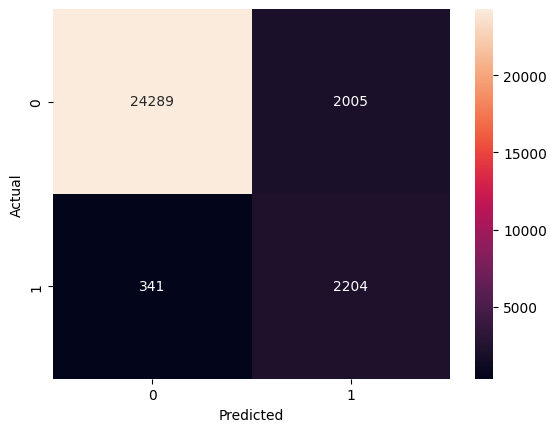

nn_model_8_4_2_relu_class_weight_1_1
Epoch 1/64
3365/3365 [==============================] - 12s 3ms/step - loss: 0.1972 - accuracy: 0.9220 - val_loss: 0.1407 - val_accuracy: 0.9582
Epoch 2/64
3365/3365 [==============================] - 12s 4ms/step - loss: 0.1325 - accuracy: 0.9576 - val_loss: 0.1260 - val_accuracy: 0.9596
Epoch 3/64
3365/3365 [==============================] - 8s 3ms/step - loss: 0.1210 - accuracy: 0.9591 - val_loss: 0.1170 - val_accuracy: 0.9621
Epoch 4/64
3365/3365 [==============================] - 10s 3ms/step - loss: 0.1136 - accuracy: 0.9603 - val_loss: 0.1113 - val_accuracy: 0.9627
Epoch 5/64
3365/3365 [==============================] - 10s 3ms/step - loss: 0.1085 - accuracy: 0.9615 - val_loss: 0.1065 - val_accuracy: 0.9637
Epoch 6/64
3365/3365 [==============================] - 8s 2ms/step - loss: 0.1035 - accuracy: 0.9632 - val_loss: 0.1015 - val_accuracy: 0.9663
Epoch 7/64
3365/3365 [==============================] - 11s 3ms/step - loss: 0.0990 - accuracy:

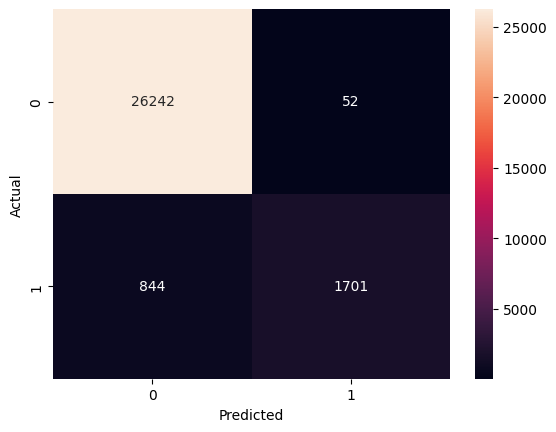

nn_model_8_4_2_relu_class_weight_1_3
Epoch 1/64
3365/3365 [==============================] - 11s 3ms/step - loss: 0.4307 - accuracy: 0.9304 - val_loss: 0.2177 - val_accuracy: 0.9409
Epoch 2/64
3365/3365 [==============================] - 10s 3ms/step - loss: 0.2632 - accuracy: 0.9474 - val_loss: 0.1604 - val_accuracy: 0.9482
Epoch 3/64
3365/3365 [==============================] - 9s 3ms/step - loss: 0.2406 - accuracy: 0.9481 - val_loss: 0.1493 - val_accuracy: 0.9482
Epoch 4/64
3365/3365 [==============================] - 11s 3ms/step - loss: 0.2314 - accuracy: 0.9501 - val_loss: 0.1459 - val_accuracy: 0.9498
Epoch 5/64
3365/3365 [==============================] - 10s 3ms/step - loss: 0.2235 - accuracy: 0.9530 - val_loss: 0.1315 - val_accuracy: 0.9555
Epoch 6/64
3365/3365 [==============================] - 9s 3ms/step - loss: 0.2148 - accuracy: 0.9556 - val_loss: 0.1285 - val_accuracy: 0.9573
Epoch 7/64
3365/3365 [==============================] - 10s 3ms/step - loss: 0.2068 - accuracy:

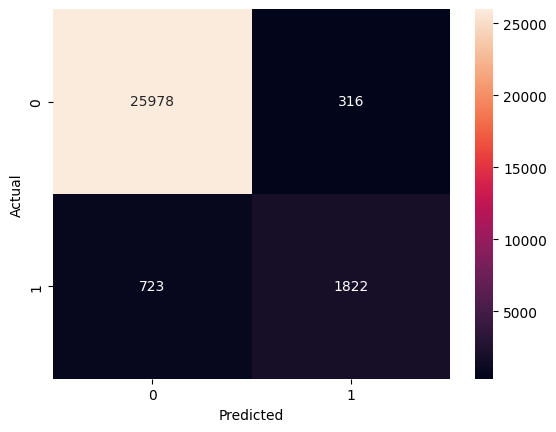

nn_model_8_4_2_relu_class_weight_1_5
Epoch 1/64
3365/3365 [==============================] - 11s 3ms/step - loss: 0.3846 - accuracy: 0.9093 - val_loss: 0.1764 - val_accuracy: 0.9231
Epoch 2/64
3365/3365 [==============================] - 10s 3ms/step - loss: 0.3129 - accuracy: 0.9200 - val_loss: 0.1831 - val_accuracy: 0.9177
Epoch 3/64
3365/3365 [==============================] - 10s 3ms/step - loss: 0.3006 - accuracy: 0.9289 - val_loss: 0.1666 - val_accuracy: 0.9319
Epoch 4/64
3365/3365 [==============================] - 9s 3ms/step - loss: 0.2888 - accuracy: 0.9368 - val_loss: 0.1640 - val_accuracy: 0.9382
Epoch 5/64
3365/3365 [==============================] - 10s 3ms/step - loss: 0.2795 - accuracy: 0.9396 - val_loss: 0.1537 - val_accuracy: 0.9331
Epoch 6/64
3365/3365 [==============================] - 10s 3ms/step - loss: 0.2705 - accuracy: 0.9347 - val_loss: 0.1576 - val_accuracy: 0.9258
Epoch 7/64
3365/3365 [==============================] - 8s 2ms/step - loss: 0.2632 - accuracy:

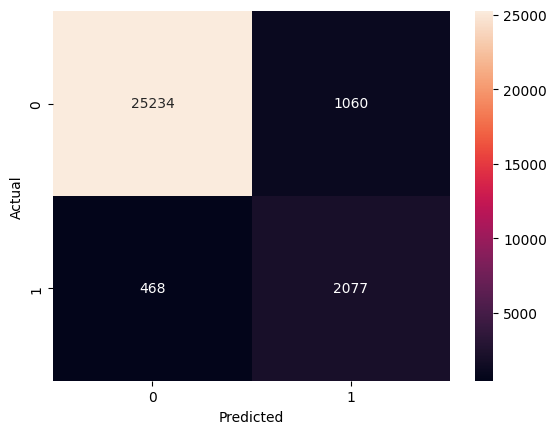

nn_model_8_4_elu_class_weight_0.5483847307341244_5.666919319521644
Epoch 1/64
3365/3365 [==============================] - 12s 3ms/step - loss: 0.3060 - accuracy: 0.8332 - val_loss: 0.2485 - val_accuracy: 0.8822
Epoch 2/64
3365/3365 [==============================] - 10s 3ms/step - loss: 0.2532 - accuracy: 0.8791 - val_loss: 0.2709 - val_accuracy: 0.8714
Epoch 3/64
3365/3365 [==============================] - 10s 3ms/step - loss: 0.2512 - accuracy: 0.8814 - val_loss: 0.2589 - val_accuracy: 0.8783
Epoch 4/64
3365/3365 [==============================] - 10s 3ms/step - loss: 0.2499 - accuracy: 0.8823 - val_loss: 0.2579 - val_accuracy: 0.8791
Epoch 5/64
3365/3365 [==============================] - 10s 3ms/step - loss: 0.2490 - accuracy: 0.8831 - val_loss: 0.2677 - val_accuracy: 0.8742
Epoch 6/64
3365/3365 [==============================] - 8s 2ms/step - loss: 0.2489 - accuracy: 0.8815 - val_loss: 0.2355 - val_accuracy: 0.8900
Epoch 7/64
3365/3365 [==============================] - 10s 3ms/

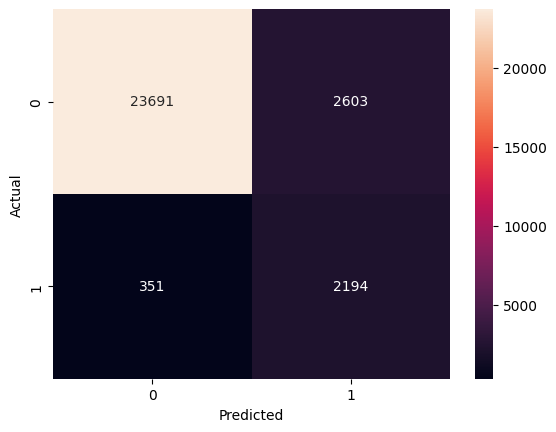

nn_model_8_4_elu_class_weight_1_1
Epoch 1/64
3365/3365 [==============================] - 12s 3ms/step - loss: 0.1660 - accuracy: 0.9409 - val_loss: 0.1194 - val_accuracy: 0.9603
Epoch 2/64
3365/3365 [==============================] - 11s 3ms/step - loss: 0.1183 - accuracy: 0.9585 - val_loss: 0.1180 - val_accuracy: 0.9602
Epoch 3/64
3365/3365 [==============================] - 9s 3ms/step - loss: 0.1167 - accuracy: 0.9585 - val_loss: 0.1162 - val_accuracy: 0.9612
Epoch 4/64
3365/3365 [==============================] - 12s 4ms/step - loss: 0.1141 - accuracy: 0.9602 - val_loss: 0.1131 - val_accuracy: 0.9628
Epoch 5/64
3365/3365 [==============================] - 11s 3ms/step - loss: 0.1101 - accuracy: 0.9621 - val_loss: 0.1090 - val_accuracy: 0.9641
Epoch 6/64
3365/3365 [==============================] - 13s 4ms/step - loss: 0.1060 - accuracy: 0.9640 - val_loss: 0.1047 - val_accuracy: 0.9671
Epoch 7/64
3365/3365 [==============================] - 12s 3ms/step - loss: 0.1024 - accuracy: 0

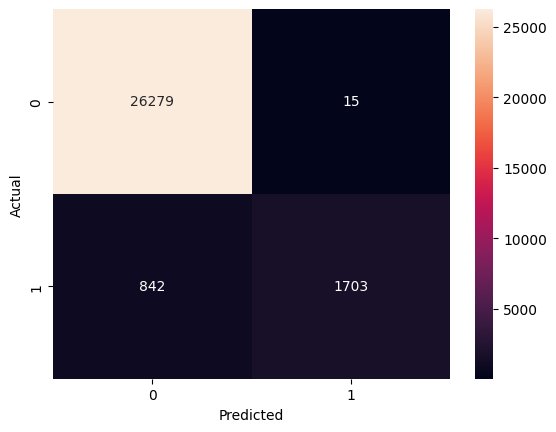

nn_model_8_4_elu_class_weight_1_3
Epoch 1/64
3365/3365 [==============================] - 12s 3ms/step - loss: 0.2723 - accuracy: 0.9289 - val_loss: 0.1493 - val_accuracy: 0.9385
Epoch 2/64
3365/3365 [==============================] - 12s 4ms/step - loss: 0.2370 - accuracy: 0.9396 - val_loss: 0.1561 - val_accuracy: 0.9339
Epoch 3/64
3365/3365 [==============================] - 13s 4ms/step - loss: 0.2342 - accuracy: 0.9404 - val_loss: 0.1422 - val_accuracy: 0.9429
Epoch 4/64
3365/3365 [==============================] - 9s 3ms/step - loss: 0.2332 - accuracy: 0.9414 - val_loss: 0.1452 - val_accuracy: 0.9419
Epoch 5/64
3365/3365 [==============================] - 11s 3ms/step - loss: 0.2320 - accuracy: 0.9426 - val_loss: 0.1601 - val_accuracy: 0.9327
Epoch 6/64
3365/3365 [==============================] - 11s 3ms/step - loss: 0.2313 - accuracy: 0.9429 - val_loss: 0.1483 - val_accuracy: 0.9414
Epoch 7/64
3365/3365 [==============================] - 11s 3ms/step - loss: 0.2308 - accuracy: 0

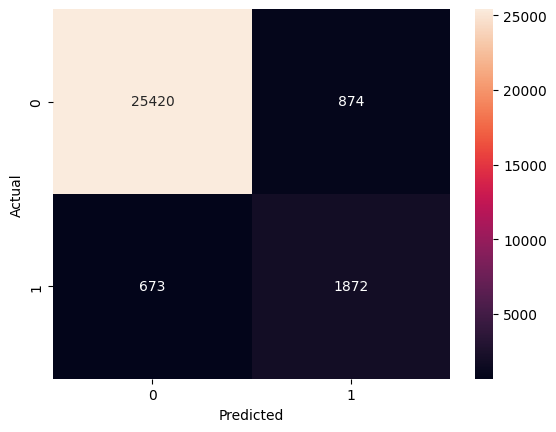

nn_model_8_4_elu_class_weight_1_5
Epoch 1/64
3365/3365 [==============================] - 12s 3ms/step - loss: 0.3543 - accuracy: 0.9073 - val_loss: 0.1915 - val_accuracy: 0.9156
Epoch 2/64
3365/3365 [==============================] - 11s 3ms/step - loss: 0.3134 - accuracy: 0.9235 - val_loss: 0.1839 - val_accuracy: 0.9182
Epoch 3/64
3365/3365 [==============================] - 9s 3ms/step - loss: 0.3077 - accuracy: 0.9253 - val_loss: 0.1871 - val_accuracy: 0.9152
Epoch 4/64
3365/3365 [==============================] - 12s 4ms/step - loss: 0.2980 - accuracy: 0.9293 - val_loss: 0.1686 - val_accuracy: 0.9255
Epoch 5/64
3365/3365 [==============================] - 11s 3ms/step - loss: 0.2824 - accuracy: 0.9341 - val_loss: 0.1597 - val_accuracy: 0.9316
Epoch 6/64
3365/3365 [==============================] - 11s 3ms/step - loss: 0.2639 - accuracy: 0.9381 - val_loss: 0.1548 - val_accuracy: 0.9305
Epoch 7/64
3365/3365 [==============================] - 10s 3ms/step - loss: 0.2502 - accuracy: 0

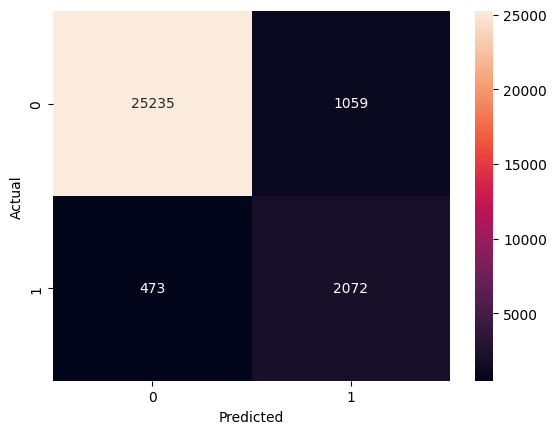

nn_model_8_4_2_elu_class_weight_0.5483847307341244_5.666919319521644
Epoch 1/64
3365/3365 [==============================] - 14s 4ms/step - loss: 0.3284 - accuracy: 0.8293 - val_loss: 0.2579 - val_accuracy: 0.8704
Epoch 2/64
3365/3365 [==============================] - 8s 3ms/step - loss: 0.2643 - accuracy: 0.8744 - val_loss: 0.2641 - val_accuracy: 0.8730
Epoch 3/64
3365/3365 [==============================] - 10s 3ms/step - loss: 0.2583 - accuracy: 0.8781 - val_loss: 0.2422 - val_accuracy: 0.8843
Epoch 4/64
3365/3365 [==============================] - 12s 4ms/step - loss: 0.2555 - accuracy: 0.8803 - val_loss: 0.3004 - val_accuracy: 0.8528
Epoch 5/64
3365/3365 [==============================] - 11s 3ms/step - loss: 0.2530 - accuracy: 0.8797 - val_loss: 0.2818 - val_accuracy: 0.8662
Epoch 6/64
3365/3365 [==============================] - 9s 3ms/step - loss: 0.2497 - accuracy: 0.8810 - val_loss: 0.2569 - val_accuracy: 0.8764
Epoch 7/64
3365/3365 [==============================] - 11s 3ms

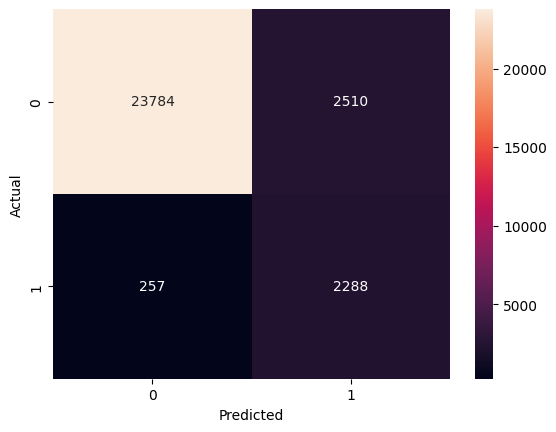

nn_model_8_4_2_elu_class_weight_1_1
Epoch 1/64
3365/3365 [==============================] - 15s 4ms/step - loss: 0.1766 - accuracy: 0.9451 - val_loss: 0.1215 - val_accuracy: 0.9606
Epoch 2/64
3365/3365 [==============================] - 12s 4ms/step - loss: 0.1174 - accuracy: 0.9611 - val_loss: 0.1157 - val_accuracy: 0.9608
Epoch 3/64
3365/3365 [==============================] - 11s 3ms/step - loss: 0.1117 - accuracy: 0.9633 - val_loss: 0.1092 - val_accuracy: 0.9663
Epoch 4/64
3365/3365 [==============================] - 13s 4ms/step - loss: 0.1056 - accuracy: 0.9654 - val_loss: 0.1046 - val_accuracy: 0.9673
Epoch 5/64
3365/3365 [==============================] - 11s 3ms/step - loss: 0.0996 - accuracy: 0.9667 - val_loss: 0.0974 - val_accuracy: 0.9688
Epoch 6/64
3365/3365 [==============================] - 12s 4ms/step - loss: 0.0939 - accuracy: 0.9683 - val_loss: 0.0942 - val_accuracy: 0.9689
Epoch 7/64
3365/3365 [==============================] - 10s 3ms/step - loss: 0.0905 - accuracy

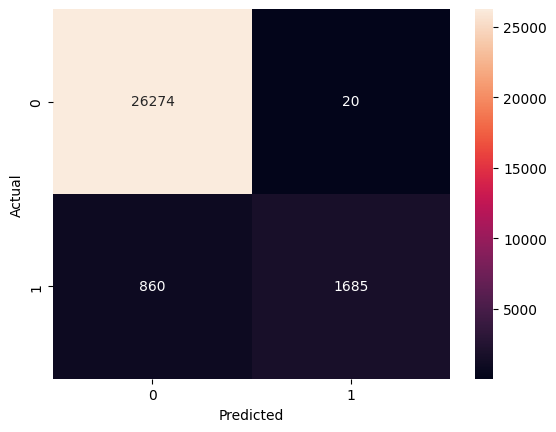

nn_model_8_4_2_elu_class_weight_1_3
Epoch 1/64
3365/3365 [==============================] - 14s 4ms/step - loss: 0.3272 - accuracy: 0.9273 - val_loss: 0.1573 - val_accuracy: 0.9441
Epoch 2/64
3365/3365 [==============================] - 14s 4ms/step - loss: 0.2430 - accuracy: 0.9446 - val_loss: 0.1596 - val_accuracy: 0.9377
Epoch 3/64
3365/3365 [==============================] - 12s 4ms/step - loss: 0.2356 - accuracy: 0.9447 - val_loss: 0.1517 - val_accuracy: 0.9400
Epoch 4/64
3365/3365 [==============================] - 12s 4ms/step - loss: 0.2326 - accuracy: 0.9447 - val_loss: 0.1455 - val_accuracy: 0.9443
Epoch 5/64
3365/3365 [==============================] - 12s 4ms/step - loss: 0.2306 - accuracy: 0.9449 - val_loss: 0.1383 - val_accuracy: 0.9484
Epoch 6/64
3365/3365 [==============================] - 13s 4ms/step - loss: 0.2280 - accuracy: 0.9463 - val_loss: 0.1387 - val_accuracy: 0.9484
Epoch 7/64
3365/3365 [==============================] - 12s 4ms/step - loss: 0.2252 - accuracy

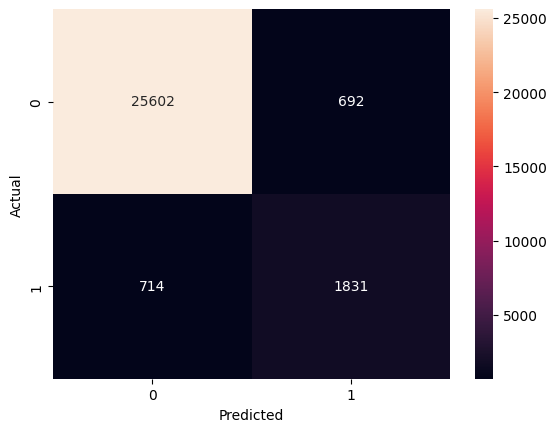

nn_model_8_4_2_elu_class_weight_1_5
Epoch 1/64
3365/3365 [==============================] - 12s 3ms/step - loss: 0.4089 - accuracy: 0.9014 - val_loss: 0.2017 - val_accuracy: 0.9114
Epoch 2/64
3365/3365 [==============================] - 11s 3ms/step - loss: 0.3175 - accuracy: 0.9231 - val_loss: 0.1976 - val_accuracy: 0.9148
Epoch 3/64
3365/3365 [==============================] - 11s 3ms/step - loss: 0.3153 - accuracy: 0.9241 - val_loss: 0.1792 - val_accuracy: 0.9231
Epoch 4/64
3365/3365 [==============================] - 10s 3ms/step - loss: 0.3142 - accuracy: 0.9250 - val_loss: 0.1825 - val_accuracy: 0.9227
Epoch 5/64
3365/3365 [==============================] - 11s 3ms/step - loss: 0.3137 - accuracy: 0.9247 - val_loss: 0.1974 - val_accuracy: 0.9138
Epoch 6/64
3365/3365 [==============================] - 10s 3ms/step - loss: 0.3119 - accuracy: 0.9250 - val_loss: 0.1602 - val_accuracy: 0.9336
Epoch 7/64
3365/3365 [==============================] - 11s 3ms/step - loss: 0.3120 - accuracy

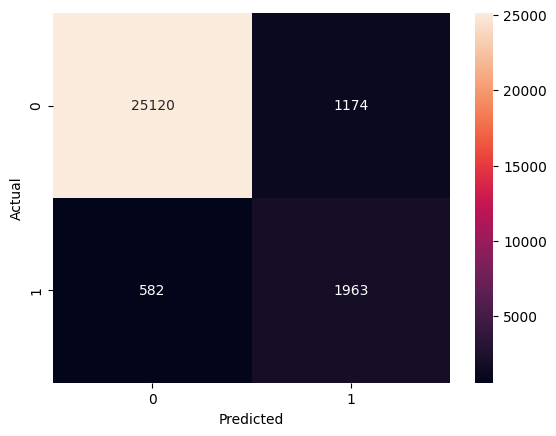

nn_model_8_4_gelu_class_weight_0.5483847307341244_5.666919319521644
Epoch 1/64
3365/3365 [==============================] - 12s 3ms/step - loss: 0.3120 - accuracy: 0.8481 - val_loss: 0.2721 - val_accuracy: 0.8703
Epoch 2/64
3365/3365 [==============================] - 10s 3ms/step - loss: 0.2461 - accuracy: 0.8782 - val_loss: 0.2665 - val_accuracy: 0.8684
Epoch 3/64
3365/3365 [==============================] - 9s 3ms/step - loss: 0.2374 - accuracy: 0.8811 - val_loss: 0.2542 - val_accuracy: 0.8747
Epoch 4/64
3365/3365 [==============================] - 11s 3ms/step - loss: 0.2294 - accuracy: 0.8851 - val_loss: 0.2701 - val_accuracy: 0.8641
Epoch 5/64
3365/3365 [==============================] - 11s 3ms/step - loss: 0.2203 - accuracy: 0.8881 - val_loss: 0.2407 - val_accuracy: 0.8827
Epoch 6/64
3365/3365 [==============================] - 12s 3ms/step - loss: 0.2139 - accuracy: 0.8922 - val_loss: 0.2462 - val_accuracy: 0.8772
Epoch 7/64
3365/3365 [==============================] - 12s 3ms

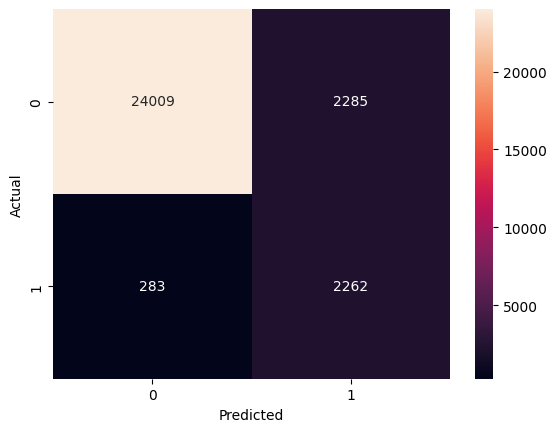

nn_model_8_4_gelu_class_weight_1_1
Epoch 1/64
3365/3365 [==============================] - 13s 4ms/step - loss: 0.1775 - accuracy: 0.9434 - val_loss: 0.1205 - val_accuracy: 0.9602
Epoch 2/64
3365/3365 [==============================] - 13s 4ms/step - loss: 0.1192 - accuracy: 0.9580 - val_loss: 0.1182 - val_accuracy: 0.9591
Epoch 3/64
3365/3365 [==============================] - 11s 3ms/step - loss: 0.1169 - accuracy: 0.9589 - val_loss: 0.1172 - val_accuracy: 0.9599
Epoch 4/64
3365/3365 [==============================] - 12s 4ms/step - loss: 0.1156 - accuracy: 0.9593 - val_loss: 0.1178 - val_accuracy: 0.9582
Epoch 5/64
3365/3365 [==============================] - 11s 3ms/step - loss: 0.1142 - accuracy: 0.9603 - val_loss: 0.1145 - val_accuracy: 0.9628
Epoch 6/64
3365/3365 [==============================] - 10s 3ms/step - loss: 0.1120 - accuracy: 0.9610 - val_loss: 0.1138 - val_accuracy: 0.9607
Epoch 7/64
3365/3365 [==============================] - 13s 4ms/step - loss: 0.1082 - accuracy:

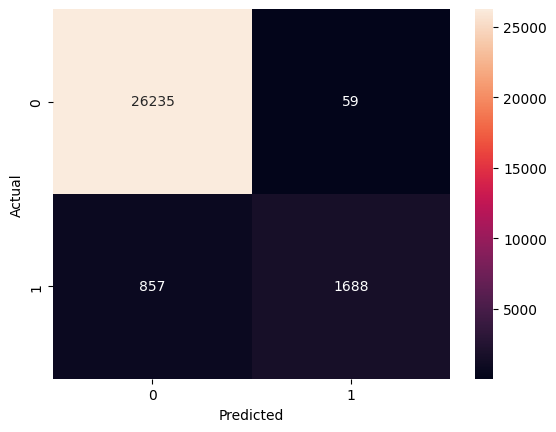

nn_model_8_4_gelu_class_weight_1_3
Epoch 1/64
3365/3365 [==============================] - 13s 4ms/step - loss: 0.3158 - accuracy: 0.9286 - val_loss: 0.1584 - val_accuracy: 0.9320
Epoch 2/64
3365/3365 [==============================] - 11s 3ms/step - loss: 0.2352 - accuracy: 0.9401 - val_loss: 0.1437 - val_accuracy: 0.9412
Epoch 3/64
3365/3365 [==============================] - 11s 3ms/step - loss: 0.2269 - accuracy: 0.9431 - val_loss: 0.1410 - val_accuracy: 0.9430
Epoch 4/64
3365/3365 [==============================] - 10s 3ms/step - loss: 0.2169 - accuracy: 0.9464 - val_loss: 0.1285 - val_accuracy: 0.9488
Epoch 5/64
3365/3365 [==============================] - 10s 3ms/step - loss: 0.2083 - accuracy: 0.9486 - val_loss: 0.1396 - val_accuracy: 0.9424
Epoch 6/64
3365/3365 [==============================] - 11s 3ms/step - loss: 0.2021 - accuracy: 0.9497 - val_loss: 0.1225 - val_accuracy: 0.9519
Epoch 7/64
3365/3365 [==============================] - 13s 4ms/step - loss: 0.1967 - accuracy:

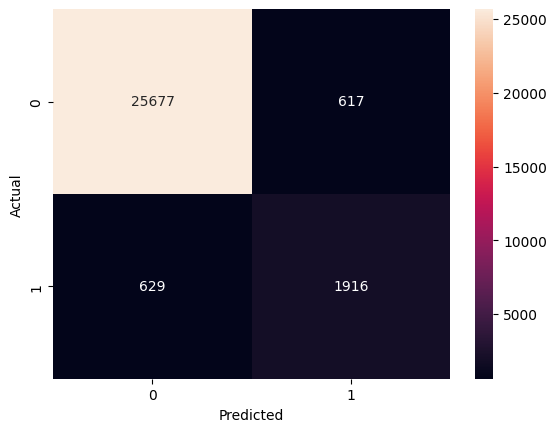

nn_model_8_4_gelu_class_weight_1_5
Epoch 1/64
3365/3365 [==============================] - 13s 4ms/step - loss: 0.3926 - accuracy: 0.9067 - val_loss: 0.1974 - val_accuracy: 0.9077
Epoch 2/64
3365/3365 [==============================] - 17s 5ms/step - loss: 0.3092 - accuracy: 0.9189 - val_loss: 0.1834 - val_accuracy: 0.9160
Epoch 3/64
3365/3365 [==============================] - 11s 3ms/step - loss: 0.2991 - accuracy: 0.9209 - val_loss: 0.1830 - val_accuracy: 0.9129
Epoch 4/64
3365/3365 [==============================] - 12s 4ms/step - loss: 0.2902 - accuracy: 0.9241 - val_loss: 0.1602 - val_accuracy: 0.9261
Epoch 5/64
3365/3365 [==============================] - 11s 3ms/step - loss: 0.2860 - accuracy: 0.9255 - val_loss: 0.1754 - val_accuracy: 0.9171
Epoch 6/64
3365/3365 [==============================] - 12s 3ms/step - loss: 0.2836 - accuracy: 0.9272 - val_loss: 0.1711 - val_accuracy: 0.9209
Epoch 7/64
3365/3365 [==============================] - 22s 6ms/step - loss: 0.2820 - accuracy:

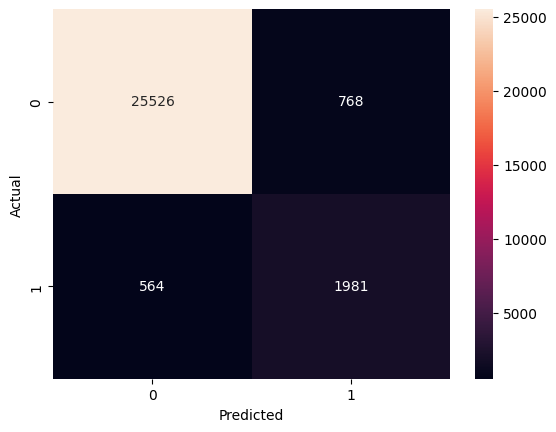

nn_model_8_4_2_gelu_class_weight_0.5483847307341244_5.666919319521644
Epoch 1/64
3365/3365 [==============================] - 12s 3ms/step - loss: 0.3574 - accuracy: 0.8725 - val_loss: 0.3500 - val_accuracy: 0.8800
Epoch 2/64
3365/3365 [==============================] - 12s 3ms/step - loss: 0.2749 - accuracy: 0.8928 - val_loss: 0.2900 - val_accuracy: 0.8837
Epoch 3/64
3365/3365 [==============================] - 11s 3ms/step - loss: 0.2599 - accuracy: 0.8894 - val_loss: 0.2785 - val_accuracy: 0.8768
Epoch 4/64
3365/3365 [==============================] - 9s 3ms/step - loss: 0.2464 - accuracy: 0.8906 - val_loss: 0.2621 - val_accuracy: 0.8798
Epoch 5/64
3365/3365 [==============================] - 12s 3ms/step - loss: 0.2361 - accuracy: 0.8918 - val_loss: 0.2290 - val_accuracy: 0.8986
Epoch 6/64
3365/3365 [==============================] - 12s 3ms/step - loss: 0.2309 - accuracy: 0.8927 - val_loss: 0.2235 - val_accuracy: 0.8954
Epoch 7/64
3365/3365 [==============================] - 12s 4

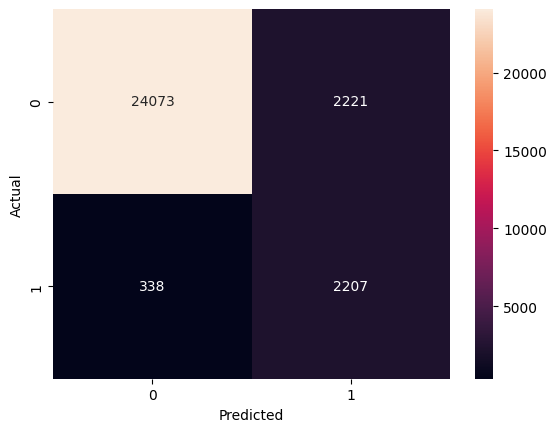

nn_model_8_4_2_gelu_class_weight_1_1
Epoch 1/64
3365/3365 [==============================] - 12s 3ms/step - loss: 0.1698 - accuracy: 0.9382 - val_loss: 0.1362 - val_accuracy: 0.9568
Epoch 2/64
3365/3365 [==============================] - 11s 3ms/step - loss: 0.1292 - accuracy: 0.9574 - val_loss: 0.1260 - val_accuracy: 0.9581
Epoch 3/64
3365/3365 [==============================] - 12s 3ms/step - loss: 0.1221 - accuracy: 0.9587 - val_loss: 0.1211 - val_accuracy: 0.9601
Epoch 4/64
3365/3365 [==============================] - 12s 4ms/step - loss: 0.1163 - accuracy: 0.9602 - val_loss: 0.1159 - val_accuracy: 0.9620
Epoch 5/64
3365/3365 [==============================] - 13s 4ms/step - loss: 0.1111 - accuracy: 0.9621 - val_loss: 0.1123 - val_accuracy: 0.9625
Epoch 6/64
3365/3365 [==============================] - 13s 4ms/step - loss: 0.1072 - accuracy: 0.9632 - val_loss: 0.1096 - val_accuracy: 0.9642
Epoch 7/64
3365/3365 [==============================] - 12s 4ms/step - loss: 0.1049 - accurac

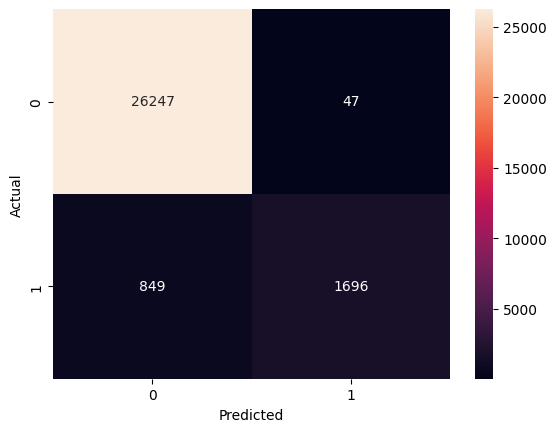

nn_model_8_4_2_gelu_class_weight_1_3
Epoch 1/64
3365/3365 [==============================] - 12s 3ms/step - loss: 0.3377 - accuracy: 0.9364 - val_loss: 0.1518 - val_accuracy: 0.9393
Epoch 2/64
3365/3365 [==============================] - 12s 3ms/step - loss: 0.2594 - accuracy: 0.9380 - val_loss: 0.1581 - val_accuracy: 0.9348
Epoch 3/64
3365/3365 [==============================] - 12s 3ms/step - loss: 0.2472 - accuracy: 0.9411 - val_loss: 0.1571 - val_accuracy: 0.9351
Epoch 4/64
3365/3365 [==============================] - 11s 3ms/step - loss: 0.2408 - accuracy: 0.9415 - val_loss: 0.1443 - val_accuracy: 0.9428
Epoch 5/64
3365/3365 [==============================] - 10s 3ms/step - loss: 0.2361 - accuracy: 0.9426 - val_loss: 0.1459 - val_accuracy: 0.9420
Epoch 6/64
3365/3365 [==============================] - 11s 3ms/step - loss: 0.2297 - accuracy: 0.9436 - val_loss: 0.1475 - val_accuracy: 0.9414
Epoch 7/64
3365/3365 [==============================] - 12s 3ms/step - loss: 0.2235 - accurac

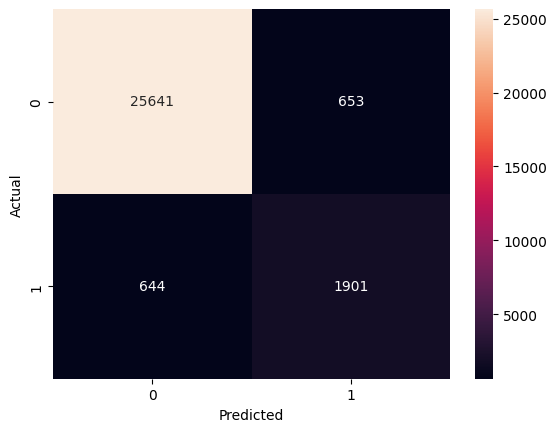

nn_model_8_4_2_gelu_class_weight_1_5
Epoch 1/64
3365/3365 [==============================] - 14s 4ms/step - loss: 0.4464 - accuracy: 0.9006 - val_loss: 0.1840 - val_accuracy: 0.9160
Epoch 2/64
3365/3365 [==============================] - 12s 4ms/step - loss: 0.3067 - accuracy: 0.9239 - val_loss: 0.1882 - val_accuracy: 0.9154
Epoch 3/64
3365/3365 [==============================] - 13s 4ms/step - loss: 0.2966 - accuracy: 0.9277 - val_loss: 0.1744 - val_accuracy: 0.9245
Epoch 4/64
3365/3365 [==============================] - 14s 4ms/step - loss: 0.2851 - accuracy: 0.9339 - val_loss: 0.1556 - val_accuracy: 0.9378
Epoch 5/64
3365/3365 [==============================] - 15s 4ms/step - loss: 0.2707 - accuracy: 0.9392 - val_loss: 0.1560 - val_accuracy: 0.9370
Epoch 6/64
3365/3365 [==============================] - 13s 4ms/step - loss: 0.2606 - accuracy: 0.9421 - val_loss: 0.1580 - val_accuracy: 0.9278
Epoch 7/64
3365/3365 [==============================] - 12s 4ms/step - loss: 0.2541 - accurac

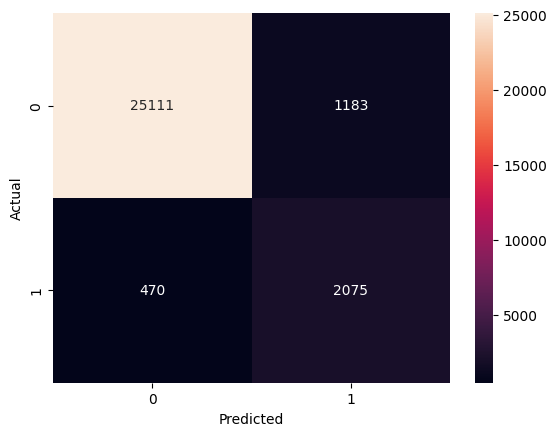

nn_model_8_4_relu6_class_weight_0.5483847307341244_5.666919319521644
Epoch 1/64
3365/3365 [==============================] - 12s 3ms/step - loss: 0.3162 - accuracy: 0.8252 - val_loss: 0.2598 - val_accuracy: 0.8740
Epoch 2/64
3365/3365 [==============================] - 9s 3ms/step - loss: 0.2508 - accuracy: 0.8816 - val_loss: 0.2882 - val_accuracy: 0.8623
Epoch 3/64
3365/3365 [==============================] - 12s 4ms/step - loss: 0.2489 - accuracy: 0.8816 - val_loss: 0.2668 - val_accuracy: 0.8714
Epoch 4/64
3365/3365 [==============================] - 11s 3ms/step - loss: 0.2466 - accuracy: 0.8823 - val_loss: 0.2645 - val_accuracy: 0.8733
Epoch 5/64
3365/3365 [==============================] - 11s 3ms/step - loss: 0.2419 - accuracy: 0.8805 - val_loss: 0.2437 - val_accuracy: 0.8823
Epoch 6/64
3365/3365 [==============================] - 13s 4ms/step - loss: 0.2364 - accuracy: 0.8816 - val_loss: 0.2847 - val_accuracy: 0.8598
Epoch 7/64
3365/3365 [==============================] - 10s 3m

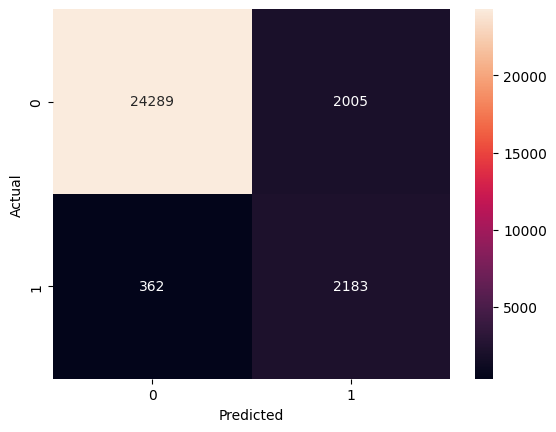

nn_model_8_4_relu6_class_weight_1_1
Epoch 1/64
3365/3365 [==============================] - 14s 4ms/step - loss: 0.1773 - accuracy: 0.9279 - val_loss: 0.1411 - val_accuracy: 0.9554
Epoch 2/64
3365/3365 [==============================] - 12s 4ms/step - loss: 0.1349 - accuracy: 0.9555 - val_loss: 0.1293 - val_accuracy: 0.9586
Epoch 3/64
3365/3365 [==============================] - 12s 4ms/step - loss: 0.1264 - accuracy: 0.9572 - val_loss: 0.1249 - val_accuracy: 0.9591
Epoch 4/64
3365/3365 [==============================] - 12s 4ms/step - loss: 0.1221 - accuracy: 0.9581 - val_loss: 0.1213 - val_accuracy: 0.9603
Epoch 5/64
3365/3365 [==============================] - 14s 4ms/step - loss: 0.1192 - accuracy: 0.9588 - val_loss: 0.1193 - val_accuracy: 0.9593
Epoch 6/64
3365/3365 [==============================] - 13s 4ms/step - loss: 0.1175 - accuracy: 0.9589 - val_loss: 0.1181 - val_accuracy: 0.9607
Epoch 7/64
3365/3365 [==============================] - 15s 5ms/step - loss: 0.1160 - accuracy

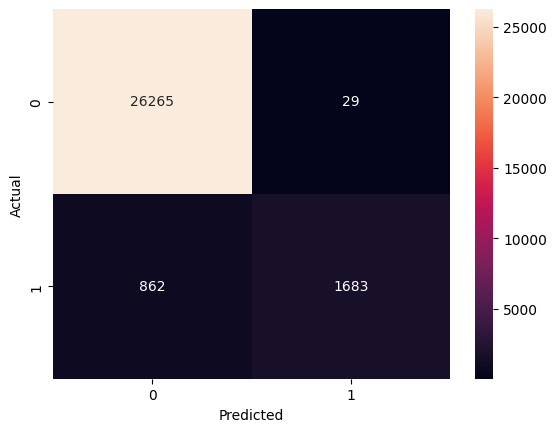

nn_model_8_4_relu6_class_weight_1_3
Epoch 1/64
3365/3365 [==============================] - 14s 4ms/step - loss: 0.3337 - accuracy: 0.9275 - val_loss: 0.1669 - val_accuracy: 0.9292
Epoch 2/64
3365/3365 [==============================] - 12s 4ms/step - loss: 0.2610 - accuracy: 0.9341 - val_loss: 0.1360 - val_accuracy: 0.9486
Epoch 3/64
3365/3365 [==============================] - 10s 3ms/step - loss: 0.2458 - accuracy: 0.9364 - val_loss: 0.1601 - val_accuracy: 0.9286
Epoch 4/64
3365/3365 [==============================] - 11s 3ms/step - loss: 0.2373 - accuracy: 0.9384 - val_loss: 0.1403 - val_accuracy: 0.9426
Epoch 5/64
3365/3365 [==============================] - 12s 3ms/step - loss: 0.2311 - accuracy: 0.9412 - val_loss: 0.1428 - val_accuracy: 0.9397
Epoch 6/64
3365/3365 [==============================] - 11s 3ms/step - loss: 0.2246 - accuracy: 0.9423 - val_loss: 0.1374 - val_accuracy: 0.9421
Epoch 7/64
3365/3365 [==============================] - 13s 4ms/step - loss: 0.2185 - accuracy

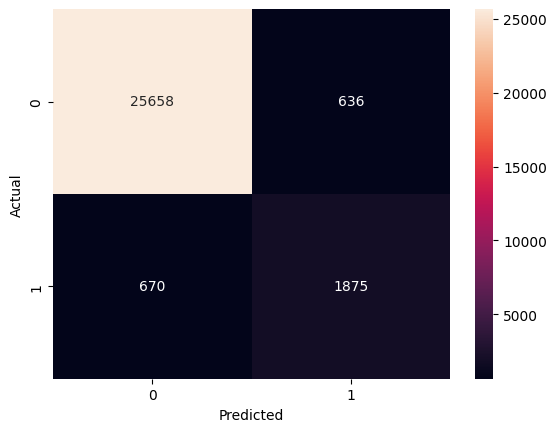

nn_model_8_4_relu6_class_weight_1_5
Epoch 1/64
3365/3365 [==============================] - 13s 4ms/step - loss: 0.3959 - accuracy: 0.9072 - val_loss: 0.1943 - val_accuracy: 0.9048
Epoch 2/64
3365/3365 [==============================] - 12s 4ms/step - loss: 0.3144 - accuracy: 0.9160 - val_loss: 0.1866 - val_accuracy: 0.9138
Epoch 3/64
3365/3365 [==============================] - 12s 4ms/step - loss: 0.3019 - accuracy: 0.9223 - val_loss: 0.1658 - val_accuracy: 0.9259
Epoch 4/64
3365/3365 [==============================] - 13s 4ms/step - loss: 0.2961 - accuracy: 0.9244 - val_loss: 0.1873 - val_accuracy: 0.9136
Epoch 5/64
3365/3365 [==============================] - 14s 4ms/step - loss: 0.2919 - accuracy: 0.9257 - val_loss: 0.1646 - val_accuracy: 0.9258
Epoch 6/64
3365/3365 [==============================] - 13s 4ms/step - loss: 0.2879 - accuracy: 0.9283 - val_loss: 0.1720 - val_accuracy: 0.9224
Epoch 7/64
3365/3365 [==============================] - 12s 4ms/step - loss: 0.2833 - accuracy

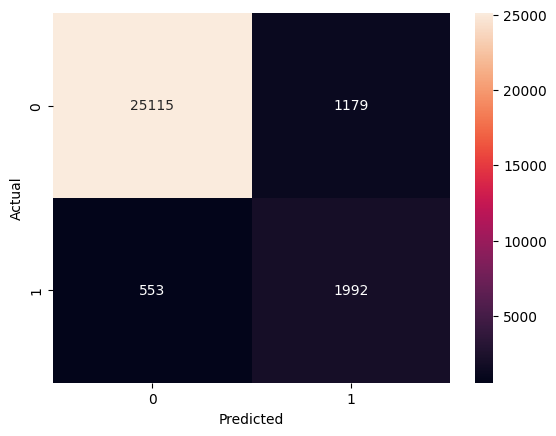

nn_model_8_4_2_relu6_class_weight_0.5483847307341244_5.666919319521644
Epoch 1/64
3365/3365 [==============================] - 13s 4ms/step - loss: 0.3447 - accuracy: 0.8294 - val_loss: 0.2672 - val_accuracy: 0.8760
Epoch 2/64
3365/3365 [==============================] - 14s 4ms/step - loss: 0.2505 - accuracy: 0.8819 - val_loss: 0.2665 - val_accuracy: 0.8755
Epoch 3/64
3365/3365 [==============================] - 11s 3ms/step - loss: 0.2420 - accuracy: 0.8792 - val_loss: 0.2285 - val_accuracy: 0.8899
Epoch 4/64
3365/3365 [==============================] - 11s 3ms/step - loss: 0.2350 - accuracy: 0.8783 - val_loss: 0.2341 - val_accuracy: 0.8813
Epoch 5/64
3365/3365 [==============================] - 11s 3ms/step - loss: 0.2278 - accuracy: 0.8838 - val_loss: 0.2541 - val_accuracy: 0.8764
Epoch 6/64
3365/3365 [==============================] - 13s 4ms/step - loss: 0.2216 - accuracy: 0.8849 - val_loss: 0.2281 - val_accuracy: 0.8894
Epoch 7/64
3365/3365 [==============================] - 12s

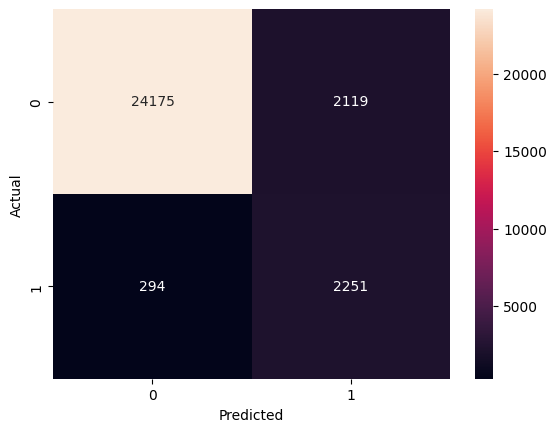

nn_model_8_4_2_relu6_class_weight_1_1
Epoch 1/64
3365/3365 [==============================] - 15s 4ms/step - loss: 0.3432 - accuracy: 0.9354 - val_loss: 0.1758 - val_accuracy: 0.9603
Epoch 2/64
3365/3365 [==============================] - 15s 4ms/step - loss: 0.1479 - accuracy: 0.9589 - val_loss: 0.1320 - val_accuracy: 0.9597
Epoch 3/64
3365/3365 [==============================] - 15s 4ms/step - loss: 0.1248 - accuracy: 0.9609 - val_loss: 0.1220 - val_accuracy: 0.9618
Epoch 4/64
3365/3365 [==============================] - 13s 4ms/step - loss: 0.1173 - accuracy: 0.9623 - val_loss: 0.1158 - val_accuracy: 0.9634
Epoch 5/64
3365/3365 [==============================] - 14s 4ms/step - loss: 0.1122 - accuracy: 0.9628 - val_loss: 0.1103 - val_accuracy: 0.9650
Epoch 6/64
3365/3365 [==============================] - 13s 4ms/step - loss: 0.1068 - accuracy: 0.9638 - val_loss: 0.1071 - val_accuracy: 0.9640
Epoch 7/64
3365/3365 [==============================] - 13s 4ms/step - loss: 0.1043 - accura

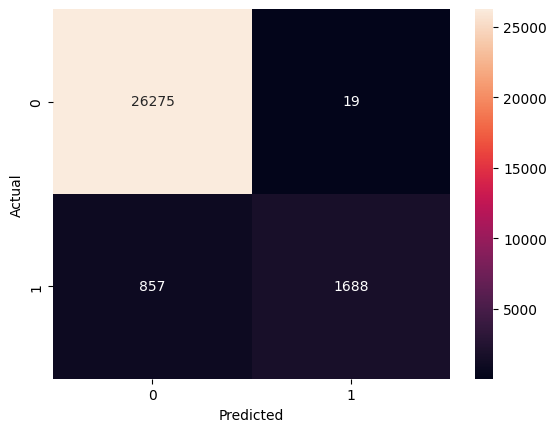

nn_model_8_4_2_relu6_class_weight_1_3
Epoch 1/64
3365/3365 [==============================] - 15s 4ms/step - loss: 0.4381 - accuracy: 0.9263 - val_loss: 0.2097 - val_accuracy: 0.9449
Epoch 2/64
2421/3365 [====================>.........] - ETA: 4s - loss: 0.2759 - accuracy: 0.9453

KeyboardInterrupt: 

In [ ]:
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight
# !pip install tensorflow
# from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

print(nn_models)
# nn_models = {}
nn_models_class_weight = {}
class_weights_balanced = compute_class_weight(class_weight = "balanced", classes= np.unique(y_train), y= y_train)
class_weights_balanced = dict(zip(np.unique(y_train), class_weights_balanced))
class_weights_balanced = (class_weights_balanced,)
class_weights_combined = class_weights_balanced + tuple([{0: 1, 1: w} for w in [1, 3, 5]])
print(class_weights_combined)

model_list = list(nn_models.items())
random.shuffle(model_list)
model_list = model_list[:31]
for name, model in model_list:
    for class_weights in class_weights_combined:
        class_str = ('_'.join(f"{value}" for key, value in class_weights.items()))
        new_model_name = f"{name}_class_weight_{class_str}"
        new_model = tf.keras.models.clone_model(model)
        print(new_model_name)
        print(new_model)
        new_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
        new_model.fit(X_train, y_train, epochs=64, batch_size=16, validation_split=0.2, verbose=1, callbacks=[early_stopping], class_weight=class_weights)
        nn_models_class_weight[new_model_name] = new_model
        evaluation(new_model, X_test, y_test, is_nn=True)

nn_model_8_4_relu_smote_0.1
Epoch 1/64
3375/3375 [==============================] - 14s 4ms/step - loss: 0.1689 - accuracy: 0.9395 - val_loss: 0.1369 - val_accuracy: 0.9515
Epoch 2/64
3375/3375 [==============================] - 9s 3ms/step - loss: 0.1176 - accuracy: 0.9582 - val_loss: 0.1375 - val_accuracy: 0.9527
Epoch 3/64
3375/3375 [==============================] - 11s 3ms/step - loss: 0.1163 - accuracy: 0.9594 - val_loss: 0.1339 - val_accuracy: 0.9538
Epoch 4/64
3375/3375 [==============================] - 10s 3ms/step - loss: 0.1156 - accuracy: 0.9592 - val_loss: 0.1339 - val_accuracy: 0.9519
Epoch 5/64
3375/3375 [==============================] - 8s 2ms/step - loss: 0.1152 - accuracy: 0.9596 - val_loss: 0.1367 - val_accuracy: 0.9535
Epoch 6/64
3375/3375 [==============================] - 11s 3ms/step - loss: 0.1154 - accuracy: 0.9595 - val_loss: 0.1339 - val_accuracy: 0.9531
Epoch 7/64
3375/3375 [==============================] - 10s 3ms/step - loss: 0.1150 - accuracy: 0.9596 -

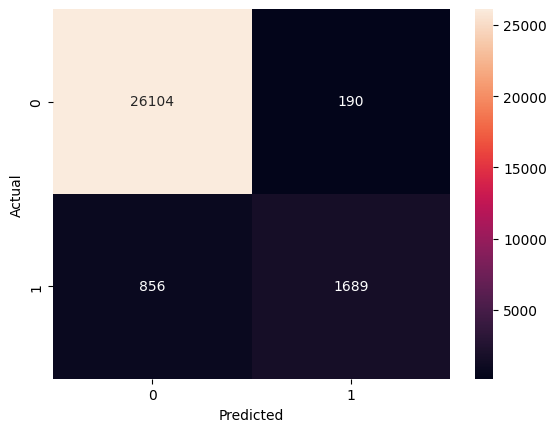

nn_model_8_4_relu_smote_0.25
Epoch 1/64
3835/3835 [==============================] - 13s 3ms/step - loss: 0.1768 - accuracy: 0.9391 - val_loss: 0.5679 - val_accuracy: 0.7624
Epoch 2/64
3835/3835 [==============================] - 12s 3ms/step - loss: 0.1155 - accuracy: 0.9593 - val_loss: 0.6425 - val_accuracy: 0.7267
Epoch 3/64
3835/3835 [==============================] - 9s 2ms/step - loss: 0.1133 - accuracy: 0.9602 - val_loss: 0.5785 - val_accuracy: 0.7386
Epoch 4/64
3835/3835 [==============================] - 11s 3ms/step - loss: 0.1127 - accuracy: 0.9602 - val_loss: 0.5855 - val_accuracy: 0.7358
Epoch 5/64
3835/3835 [==============================] - 13s 3ms/step - loss: 0.1120 - accuracy: 0.9607 - val_loss: 0.6139 - val_accuracy: 0.7279
Epoch 6/64
3835/3835 [==============================] - 12s 3ms/step - loss: 0.1117 - accuracy: 0.9608 - val_loss: 0.5607 - val_accuracy: 0.7368
Epoch 7/64
3835/3835 [==============================] - 11s 3ms/step - loss: 0.1116 - accuracy: 0.9603

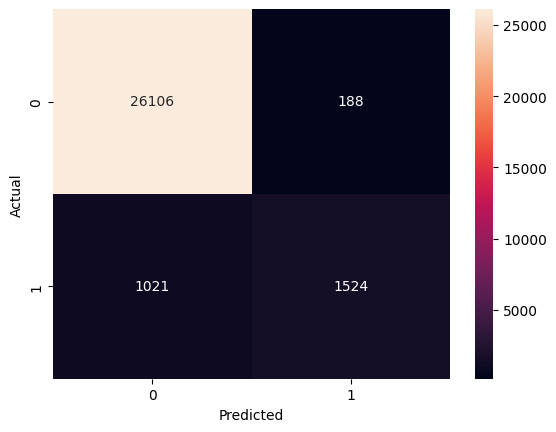

nn_model_8_4_relu_smote_0.5
Epoch 1/64
4602/4602 [==============================] - 14s 3ms/step - loss: 0.2211 - accuracy: 0.9067 - val_loss: 0.5987 - val_accuracy: 0.7220
Epoch 2/64
4602/4602 [==============================] - 16s 4ms/step - loss: 0.1698 - accuracy: 0.9316 - val_loss: 0.6179 - val_accuracy: 0.7048
Epoch 3/64
4602/4602 [==============================] - 14s 3ms/step - loss: 0.1685 - accuracy: 0.9317 - val_loss: 0.6600 - val_accuracy: 0.6876
Epoch 4/64
4602/4602 [==============================] - 13s 3ms/step - loss: 0.1682 - accuracy: 0.9324 - val_loss: 0.5850 - val_accuracy: 0.7235
Epoch 5/64
4602/4602 [==============================] - 14s 3ms/step - loss: 0.1670 - accuracy: 0.9323 - val_loss: 0.5887 - val_accuracy: 0.7191
Epoch 6/64
4602/4602 [==============================] - 14s 3ms/step - loss: 0.1650 - accuracy: 0.9337 - val_loss: 0.6160 - val_accuracy: 0.6954
Epoch 7/64
4602/4602 [==============================] - 15s 3ms/step - loss: 0.1626 - accuracy: 0.9352

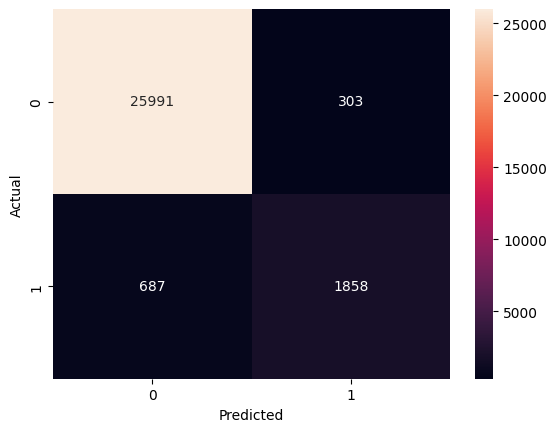

nn_model_16_8_4_swish_smote_0.1
Epoch 1/64
3375/3375 [==============================] - 12s 3ms/step - loss: 0.1434 - accuracy: 0.9534 - val_loss: 0.1308 - val_accuracy: 0.9534
Epoch 2/64
3375/3375 [==============================] - 12s 3ms/step - loss: 0.1081 - accuracy: 0.9623 - val_loss: 0.1204 - val_accuracy: 0.9571
Epoch 3/64
3375/3375 [==============================] - 11s 3ms/step - loss: 0.0983 - accuracy: 0.9665 - val_loss: 0.1111 - val_accuracy: 0.9604
Epoch 4/64
3375/3375 [==============================] - 10s 3ms/step - loss: 0.0922 - accuracy: 0.9685 - val_loss: 0.1051 - val_accuracy: 0.9621
Epoch 5/64
3375/3375 [==============================] - 9s 3ms/step - loss: 0.0890 - accuracy: 0.9695 - val_loss: 0.1014 - val_accuracy: 0.9630
Epoch 6/64
3375/3375 [==============================] - 10s 3ms/step - loss: 0.0869 - accuracy: 0.9703 - val_loss: 0.1017 - val_accuracy: 0.9629
Epoch 7/64
3375/3375 [==============================] - 10s 3ms/step - loss: 0.0862 - accuracy: 0.9

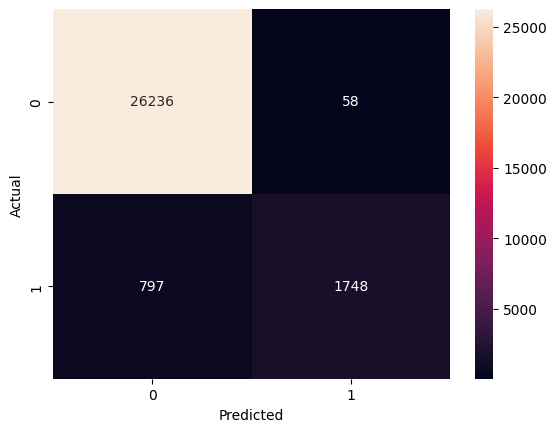

nn_model_16_8_4_swish_smote_0.25
Epoch 1/64
3835/3835 [==============================] - 13s 3ms/step - loss: 0.1416 - accuracy: 0.9523 - val_loss: 0.6203 - val_accuracy: 0.7358
Epoch 2/64
3835/3835 [==============================] - 11s 3ms/step - loss: 0.1142 - accuracy: 0.9604 - val_loss: 0.5837 - val_accuracy: 0.7402
Epoch 3/64
3835/3835 [==============================] - 14s 4ms/step - loss: 0.1101 - accuracy: 0.9620 - val_loss: 0.5567 - val_accuracy: 0.7336
Epoch 4/64
3835/3835 [==============================] - 14s 4ms/step - loss: 0.1045 - accuracy: 0.9642 - val_loss: 0.4743 - val_accuracy: 0.7753
Epoch 5/64
3835/3835 [==============================] - 13s 3ms/step - loss: 0.0985 - accuracy: 0.9659 - val_loss: 0.4828 - val_accuracy: 0.7722
Epoch 6/64
3835/3835 [==============================] - 12s 3ms/step - loss: 0.0911 - accuracy: 0.9692 - val_loss: 0.4825 - val_accuracy: 0.7742
Epoch 7/64
3835/3835 [==============================] - 11s 3ms/step - loss: 0.0877 - accuracy: 0

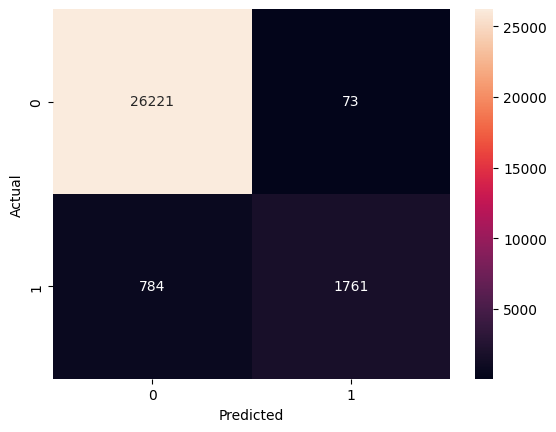

nn_model_16_8_4_swish_smote_0.5
Epoch 1/64
4602/4602 [==============================] - 16s 3ms/step - loss: 0.2024 - accuracy: 0.9244 - val_loss: 0.6522 - val_accuracy: 0.7086
Epoch 2/64
4602/4602 [==============================] - 15s 3ms/step - loss: 0.1630 - accuracy: 0.9343 - val_loss: 0.6588 - val_accuracy: 0.6787
Epoch 3/64
4602/4602 [==============================] - 15s 3ms/step - loss: 0.1438 - accuracy: 0.9392 - val_loss: 0.5113 - val_accuracy: 0.7393
Epoch 4/64
4602/4602 [==============================] - 16s 3ms/step - loss: 0.1379 - accuracy: 0.9418 - val_loss: 0.5123 - val_accuracy: 0.7168
Epoch 5/64
4602/4602 [==============================] - 14s 3ms/step - loss: 0.1348 - accuracy: 0.9433 - val_loss: 0.5401 - val_accuracy: 0.7138
Epoch 6/64
4602/4602 [==============================] - 14s 3ms/step - loss: 0.1326 - accuracy: 0.9444 - val_loss: 0.4431 - val_accuracy: 0.7509
Epoch 7/64
4602/4602 [==============================] - 14s 3ms/step - loss: 0.1310 - accuracy: 0.

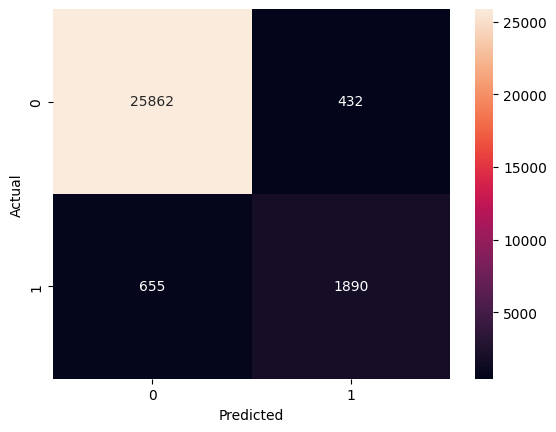

nn_model_8_4_2_elu_smote_0.1
Epoch 1/64
3375/3375 [==============================] - 11s 3ms/step - loss: 0.1473 - accuracy: 0.9465 - val_loss: 0.1389 - val_accuracy: 0.9525
Epoch 2/64
3375/3375 [==============================] - 11s 3ms/step - loss: 0.1184 - accuracy: 0.9587 - val_loss: 0.1349 - val_accuracy: 0.9535
Epoch 3/64
3375/3375 [==============================] - 9s 3ms/step - loss: 0.1159 - accuracy: 0.9595 - val_loss: 0.1357 - val_accuracy: 0.9537
Epoch 4/64
3375/3375 [==============================] - 10s 3ms/step - loss: 0.1145 - accuracy: 0.9596 - val_loss: 0.1334 - val_accuracy: 0.9538
Epoch 5/64
3375/3375 [==============================] - 10s 3ms/step - loss: 0.1138 - accuracy: 0.9600 - val_loss: 0.1347 - val_accuracy: 0.9528
Epoch 6/64
3375/3375 [==============================] - 8s 3ms/step - loss: 0.1131 - accuracy: 0.9600 - val_loss: 0.1310 - val_accuracy: 0.9542
Epoch 7/64
3375/3375 [==============================] - 10s 3ms/step - loss: 0.1126 - accuracy: 0.9602 

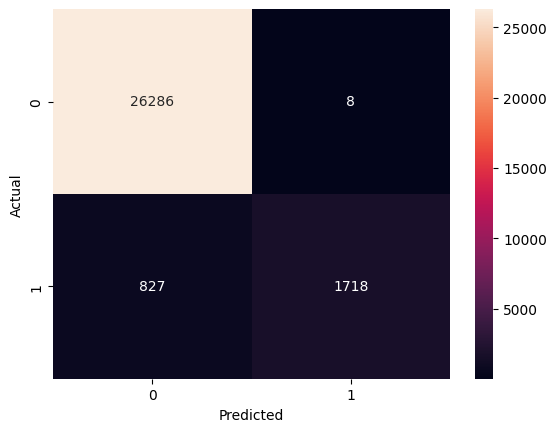

nn_model_8_4_2_elu_smote_0.25
Epoch 1/64
3835/3835 [==============================] - 13s 3ms/step - loss: 0.1471 - accuracy: 0.9464 - val_loss: 0.5662 - val_accuracy: 0.7793
Epoch 2/64
3835/3835 [==============================] - 10s 3ms/step - loss: 0.1203 - accuracy: 0.9596 - val_loss: 0.6758 - val_accuracy: 0.7359
Epoch 3/64
3835/3835 [==============================] - 11s 3ms/step - loss: 0.1182 - accuracy: 0.9598 - val_loss: 0.5589 - val_accuracy: 0.7743
Epoch 4/64
3835/3835 [==============================] - 11s 3ms/step - loss: 0.1170 - accuracy: 0.9604 - val_loss: 0.5414 - val_accuracy: 0.7726
Epoch 5/64
3835/3835 [==============================] - 13s 3ms/step - loss: 0.1158 - accuracy: 0.9614 - val_loss: 0.4908 - val_accuracy: 0.7920
Epoch 6/64
3835/3835 [==============================] - 12s 3ms/step - loss: 0.1148 - accuracy: 0.9612 - val_loss: 0.6097 - val_accuracy: 0.7579
Epoch 7/64
3835/3835 [==============================] - 11s 3ms/step - loss: 0.1137 - accuracy: 0.96

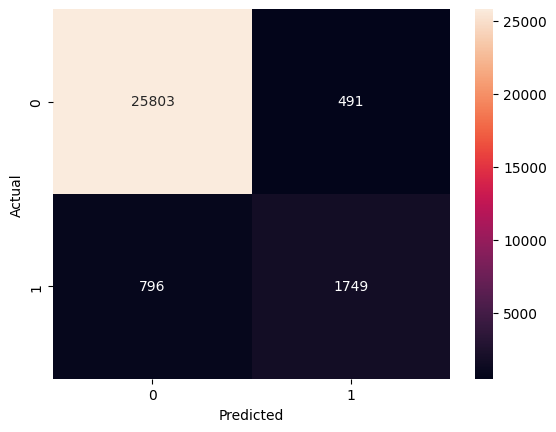

nn_model_8_4_2_elu_smote_0.5
Epoch 1/64
4602/4602 [==============================] - 14s 3ms/step - loss: 0.1948 - accuracy: 0.9259 - val_loss: 0.6736 - val_accuracy: 0.6976
Epoch 2/64
4602/4602 [==============================] - 14s 3ms/step - loss: 0.1686 - accuracy: 0.9333 - val_loss: 0.6229 - val_accuracy: 0.7066
Epoch 3/64
4602/4602 [==============================] - 13s 3ms/step - loss: 0.1639 - accuracy: 0.9345 - val_loss: 0.5805 - val_accuracy: 0.7176
Epoch 4/64
4602/4602 [==============================] - 14s 3ms/step - loss: 0.1562 - accuracy: 0.9373 - val_loss: 0.5638 - val_accuracy: 0.7055
Epoch 5/64
4602/4602 [==============================] - 14s 3ms/step - loss: 0.1470 - accuracy: 0.9404 - val_loss: 0.5413 - val_accuracy: 0.7117
Epoch 6/64
1180/4602 [======>.......................] - ETA: 8s - loss: 0.1426 - accuracy: 0.9407

In [ ]:
from imblearn.over_sampling import SMOTE
import random
import tensorflow as tf

nn_models_smote = {}
smote_sampling_strategies = [0.1, 0.25, 0.5]
model_list = list(nn_models.items())
random.shuffle(model_list)
model_list = model_list[:10]
for name, model in model_list:
    for sampling_strategy in smote_sampling_strategies:
        strategy_str = f"smote_{sampling_strategy}"
        smote = SMOTE(sampling_strategy=sampling_strategy)
        X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
        new_model = tf.keras.models.clone_model(model)
        new_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        new_model_name = f"{name}_{strategy_str}"
        print(new_model_name)
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
        new_model.fit(X_resampled, y_resampled, epochs=64, batch_size=16, validation_split=0.2, verbose=1, callbacks=[early_stopping])
        nn_models_smote[new_model_name] = new_model
        evaluation(new_model, X_test, y_test, is_nn=True)

nn_model_16_8_4_elu_smote_0.1
Epoch 1/64
3375/3375 [==============================] - 11s 3ms/step - loss: 0.1393 - accuracy: 0.9502 - val_loss: 0.1334 - val_accuracy: 0.9530
Epoch 2/64
3375/3375 [==============================] - 8s 2ms/step - loss: 0.1140 - accuracy: 0.9606 - val_loss: 0.1301 - val_accuracy: 0.9536
Epoch 3/64
3375/3375 [==============================] - 11s 3ms/step - loss: 0.1100 - accuracy: 0.9619 - val_loss: 0.1250 - val_accuracy: 0.9555
Epoch 4/64
3375/3375 [==============================] - 10s 3ms/step - loss: 0.1030 - accuracy: 0.9643 - val_loss: 0.1181 - val_accuracy: 0.9571
Epoch 5/64
3375/3375 [==============================] - 8s 2ms/step - loss: 0.0979 - accuracy: 0.9663 - val_loss: 0.1114 - val_accuracy: 0.9593
Epoch 6/64
3375/3375 [==============================] - 10s 3ms/step - loss: 0.0943 - accuracy: 0.9674 - val_loss: 0.1060 - val_accuracy: 0.9613
Epoch 7/64
3375/3375 [==============================] - 11s 3ms/step - loss: 0.0905 - accuracy: 0.9685

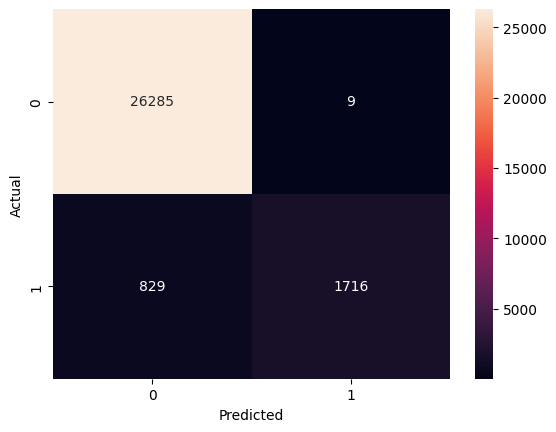

nn_model_16_8_4_elu_smote_0.25
Epoch 1/64
3835/3835 [==============================] - 15s 4ms/step - loss: 0.1390 - accuracy: 0.9513 - val_loss: 0.6416 - val_accuracy: 0.7431
Epoch 2/64
3835/3835 [==============================] - 13s 3ms/step - loss: 0.1173 - accuracy: 0.9599 - val_loss: 0.5829 - val_accuracy: 0.7494
Epoch 3/64
3835/3835 [==============================] - 12s 3ms/step - loss: 0.1117 - accuracy: 0.9621 - val_loss: 0.5194 - val_accuracy: 0.7661
Epoch 4/64
3835/3835 [==============================] - 12s 3ms/step - loss: 0.1031 - accuracy: 0.9642 - val_loss: 0.5015 - val_accuracy: 0.7710
Epoch 5/64
3835/3835 [==============================] - 13s 3ms/step - loss: 0.0999 - accuracy: 0.9652 - val_loss: 0.4479 - val_accuracy: 0.7845
Epoch 6/64
3835/3835 [==============================] - 12s 3ms/step - loss: 0.0974 - accuracy: 0.9660 - val_loss: 0.4957 - val_accuracy: 0.7663
Epoch 7/64
3835/3835 [==============================] - 12s 3ms/step - loss: 0.0943 - accuracy: 0.9

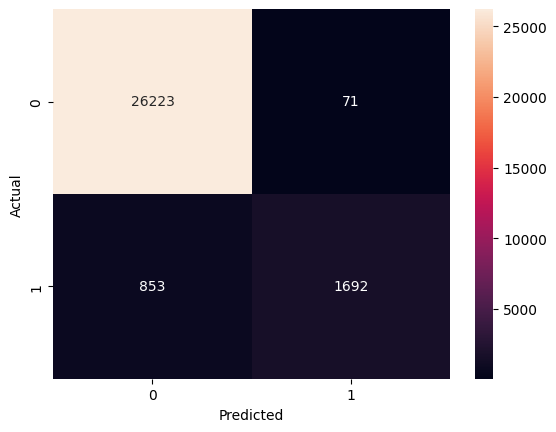

nn_model_16_8_4_elu_smote_0.5
Epoch 1/64
4602/4602 [==============================] - 16s 3ms/step - loss: 0.1841 - accuracy: 0.9246 - val_loss: 0.6388 - val_accuracy: 0.6972
Epoch 2/64
4602/4602 [==============================] - 13s 3ms/step - loss: 0.1649 - accuracy: 0.9338 - val_loss: 0.6434 - val_accuracy: 0.6936
Epoch 3/64
4602/4602 [==============================] - 13s 3ms/step - loss: 0.1586 - accuracy: 0.9357 - val_loss: 0.5842 - val_accuracy: 0.7008
Epoch 4/64
4602/4602 [==============================] - 14s 3ms/step - loss: 0.1483 - accuracy: 0.9387 - val_loss: 0.4560 - val_accuracy: 0.7424
Epoch 5/64
4602/4602 [==============================] - 13s 3ms/step - loss: 0.1389 - accuracy: 0.9411 - val_loss: 0.4580 - val_accuracy: 0.7308
Epoch 6/64
4602/4602 [==============================] - 14s 3ms/step - loss: 0.1325 - accuracy: 0.9429 - val_loss: 0.4929 - val_accuracy: 0.7048
Epoch 7/64
4602/4602 [==============================] - 15s 3ms/step - loss: 0.1289 - accuracy: 0.94

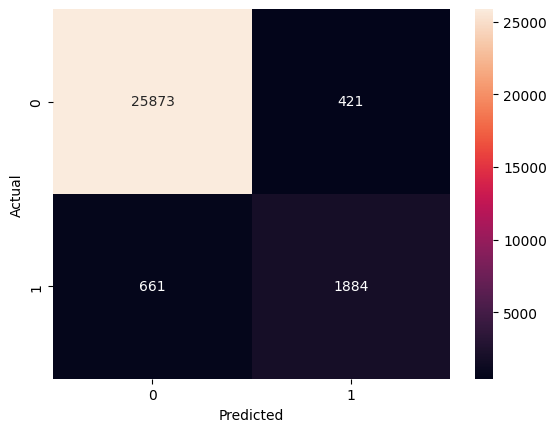

nn_model_16_8_swish_smote_0.1
Epoch 1/64
3375/3375 [==============================] - 12s 3ms/step - loss: 0.1405 - accuracy: 0.9504 - val_loss: 0.1354 - val_accuracy: 0.9526
Epoch 2/64
3375/3375 [==============================] - 9s 3ms/step - loss: 0.1155 - accuracy: 0.9601 - val_loss: 0.1345 - val_accuracy: 0.9513
Epoch 3/64
3375/3375 [==============================] - 11s 3ms/step - loss: 0.1134 - accuracy: 0.9602 - val_loss: 0.1341 - val_accuracy: 0.9530
Epoch 4/64
3375/3375 [==============================] - 11s 3ms/step - loss: 0.1090 - accuracy: 0.9614 - val_loss: 0.1231 - val_accuracy: 0.9558
Epoch 5/64
3375/3375 [==============================] - 12s 4ms/step - loss: 0.1025 - accuracy: 0.9641 - val_loss: 0.1170 - val_accuracy: 0.9580
Epoch 6/64
3375/3375 [==============================] - 12s 3ms/step - loss: 0.0979 - accuracy: 0.9661 - val_loss: 0.1170 - val_accuracy: 0.9577
Epoch 7/64
3375/3375 [==============================] - 12s 3ms/step - loss: 0.0949 - accuracy: 0.967

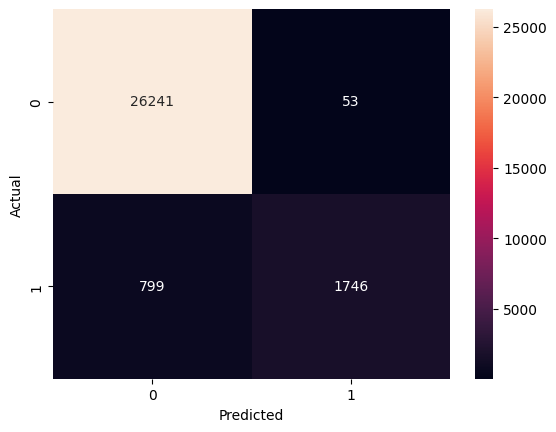

nn_model_16_8_swish_smote_0.25
Epoch 1/64
3835/3835 [==============================] - 14s 3ms/step - loss: 0.1391 - accuracy: 0.9540 - val_loss: 0.5434 - val_accuracy: 0.7670
Epoch 2/64
3835/3835 [==============================] - 13s 3ms/step - loss: 0.1090 - accuracy: 0.9628 - val_loss: 0.5338 - val_accuracy: 0.7627
Epoch 3/64
3835/3835 [==============================] - 13s 3ms/step - loss: 0.1007 - accuracy: 0.9658 - val_loss: 0.4654 - val_accuracy: 0.7899
Epoch 4/64
3835/3835 [==============================] - 12s 3ms/step - loss: 0.0966 - accuracy: 0.9666 - val_loss: 0.4665 - val_accuracy: 0.7790
Epoch 5/64
3835/3835 [==============================] - 11s 3ms/step - loss: 0.0927 - accuracy: 0.9681 - val_loss: 0.4379 - val_accuracy: 0.7909
Epoch 6/64
3835/3835 [==============================] - 12s 3ms/step - loss: 0.0895 - accuracy: 0.9693 - val_loss: 0.5027 - val_accuracy: 0.7802
Epoch 7/64
3835/3835 [==============================] - 13s 3ms/step - loss: 0.0877 - accuracy: 0.9

In [ ]:
from imblearn.over_sampling import SMOTE
import random
import tensorflow as tf

nn_models_smote = {}
smote_sampling_strategies = [0.1, 0.25, 0.5]
model_list = list(nn_models.items())
random.shuffle(model_list)
model_list = model_list[:10]
for name, model in model_list:
    for sampling_strategy in smote_sampling_strategies:
        strategy_str = f"smote_{sampling_strategy}"
        smote = SMOTE(sampling_strategy=sampling_strategy)
        X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
        new_model = tf.keras.models.clone_model(model)
        new_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        new_model_name = f"{name}_{strategy_str}"
        print(new_model_name)
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
        new_model.fit(X_resampled, y_resampled, epochs=64, batch_size=16, validation_split=0.2, verbose=1, callbacks=[early_stopping])
        nn_models_smote[new_model_name] = new_model
        evaluation(new_model, X_test, y_test, is_nn=True)

nn_model_16_8_elu_undersample_0.1
Epoch 1/64
3266/3266 [==============================] - 11s 3ms/step - loss: 0.0215 - accuracy: 0.9958 - val_loss: 4.2541 - val_accuracy: 0.5455
Epoch 2/64
3266/3266 [==============================] - 10s 3ms/step - loss: 3.9771e-05 - accuracy: 1.0000 - val_loss: 5.4004 - val_accuracy: 0.5455
Epoch 3/64
3266/3266 [==============================] - 9s 3ms/step - loss: 4.6745e-06 - accuracy: 1.0000 - val_loss: 6.3688 - val_accuracy: 0.5455
Epoch 4/64
3266/3266 [==============================] - 10s 3ms/step - loss: 6.9111e-07 - accuracy: 1.0000 - val_loss: 7.2902 - val_accuracy: 0.5455
Epoch 5/64
3266/3266 [==============================] - 10s 3ms/step - loss: 1.0961e-07 - accuracy: 1.0000 - val_loss: 8.1855 - val_accuracy: 0.5455
Epoch 6/64
3266/3266 [==============================] - 8s 3ms/step - loss: 1.8222e-08 - accuracy: 1.0000 - val_loss: 9.0435 - val_accuracy: 0.5455
Epoch 6: early stopping
902/902 [==============================] - 2s 2ms/step

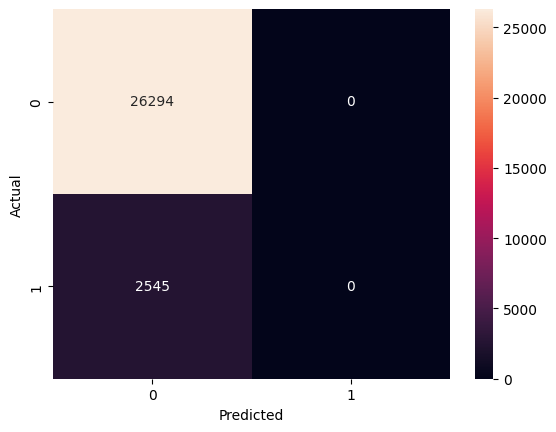

nn_model_16_8_elu_undersample_0.25
Epoch 1/64
1485/1485 [==============================] - 7s 4ms/step - loss: 0.0620 - accuracy: 0.9836 - val_loss: 7.6825 - val_accuracy: 0.0000e+00
Epoch 2/64
1485/1485 [==============================] - 5s 3ms/step - loss: 2.3968e-04 - accuracy: 1.0000 - val_loss: 9.6891 - val_accuracy: 0.0000e+00
Epoch 3/64
1485/1485 [==============================] - 5s 3ms/step - loss: 5.1901e-05 - accuracy: 1.0000 - val_loss: 11.0262 - val_accuracy: 0.0000e+00
Epoch 4/64
1485/1485 [==============================] - 4s 3ms/step - loss: 1.6798e-05 - accuracy: 1.0000 - val_loss: 12.1549 - val_accuracy: 0.0000e+00
Epoch 5/64
1485/1485 [==============================] - 5s 3ms/step - loss: 6.2482e-06 - accuracy: 1.0000 - val_loss: 13.1899 - val_accuracy: 0.0000e+00
Epoch 6/64
1485/1485 [==============================] - 5s 3ms/step - loss: 2.4802e-06 - accuracy: 1.0000 - val_loss: 14.1705 - val_accuracy: 0.0000e+00
Epoch 6: early stopping
902/902 [====================

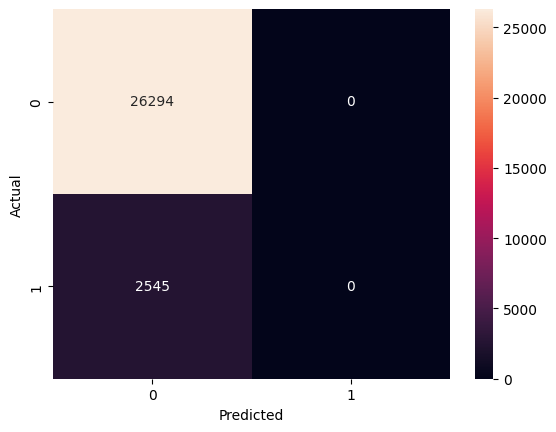

nn_model_16_8_elu_undersample_0.5
Epoch 1/64
891/891 [==============================] - 4s 3ms/step - loss: 0.2576 - accuracy: 0.8976 - val_loss: 0.6187 - val_accuracy: 0.7090
Epoch 2/64
891/891 [==============================] - 4s 4ms/step - loss: 0.1705 - accuracy: 0.9319 - val_loss: 0.6720 - val_accuracy: 0.6921
Epoch 3/64
891/891 [==============================] - 2s 3ms/step - loss: 0.1676 - accuracy: 0.9316 - val_loss: 0.6283 - val_accuracy: 0.7115
Epoch 4/64
891/891 [==============================] - 3s 3ms/step - loss: 0.1668 - accuracy: 0.9327 - val_loss: 0.6842 - val_accuracy: 0.6840
Epoch 5/64
891/891 [==============================] - 2s 3ms/step - loss: 0.1658 - accuracy: 0.9335 - val_loss: 0.6919 - val_accuracy: 0.6887
Epoch 6/64
891/891 [==============================] - 3s 3ms/step - loss: 0.1652 - accuracy: 0.9337 - val_loss: 0.6569 - val_accuracy: 0.6949
Epoch 6: early stopping
902/902 [==============================] - 2s 2ms/step
Accuracy: 0.9470508686154167
Precis

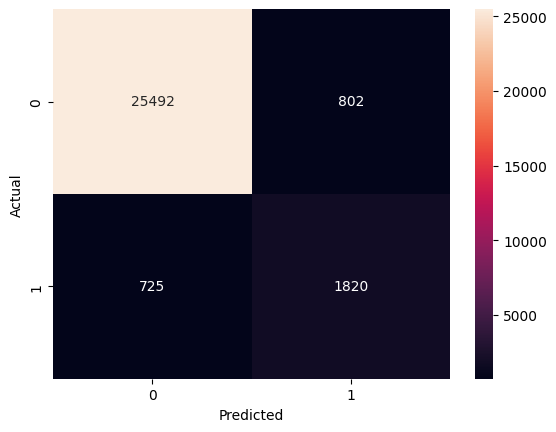

nn_model_8_4_relu6_undersample_0.1
Epoch 1/64
3266/3266 [==============================] - 11s 3ms/step - loss: 0.0237 - accuracy: 0.9976 - val_loss: 5.1122 - val_accuracy: 0.5455
Epoch 2/64
3266/3266 [==============================] - 9s 3ms/step - loss: 4.9252e-05 - accuracy: 1.0000 - val_loss: 6.1088 - val_accuracy: 0.5455
Epoch 3/64
3266/3266 [==============================] - 9s 3ms/step - loss: 5.9609e-06 - accuracy: 1.0000 - val_loss: 6.8209 - val_accuracy: 0.5455
Epoch 4/64
3266/3266 [==============================] - 11s 3ms/step - loss: 9.1280e-07 - accuracy: 1.0000 - val_loss: 7.3883 - val_accuracy: 0.5455
Epoch 5/64
3266/3266 [==============================] - 9s 3ms/step - loss: 1.6096e-07 - accuracy: 1.0000 - val_loss: 7.8849 - val_accuracy: 0.5455
Epoch 6/64
3266/3266 [==============================] - 9s 3ms/step - loss: 3.3375e-08 - accuracy: 1.0000 - val_loss: 8.3726 - val_accuracy: 0.5455
Epoch 6: early stopping
902/902 [==============================] - 1s 1ms/step


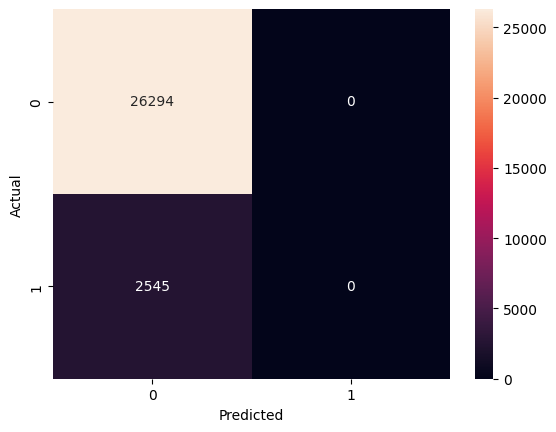

nn_model_8_4_relu6_undersample_0.25
Epoch 1/64
1485/1485 [==============================] - 6s 3ms/step - loss: 0.0391 - accuracy: 1.0000 - val_loss: 10.7651 - val_accuracy: 0.0000e+00
Epoch 2/64
1485/1485 [==============================] - 3s 2ms/step - loss: 1.6854e-04 - accuracy: 1.0000 - val_loss: 12.9290 - val_accuracy: 0.0000e+00
Epoch 3/64
1485/1485 [==============================] - 3s 2ms/step - loss: 3.8795e-05 - accuracy: 1.0000 - val_loss: 14.1930 - val_accuracy: 0.0000e+00
Epoch 4/64
1485/1485 [==============================] - 5s 3ms/step - loss: 1.3055e-05 - accuracy: 1.0000 - val_loss: 15.1260 - val_accuracy: 0.0000e+00
Epoch 5/64
1485/1485 [==============================] - 4s 2ms/step - loss: 5.0370e-06 - accuracy: 1.0000 - val_loss: 15.9151 - val_accuracy: 0.0000e+00
Epoch 6/64
1485/1485 [==============================] - 3s 2ms/step - loss: 2.0510e-06 - accuracy: 1.0000 - val_loss: 16.6189 - val_accuracy: 0.0000e+00
Epoch 6: early stopping
902/902 [=================

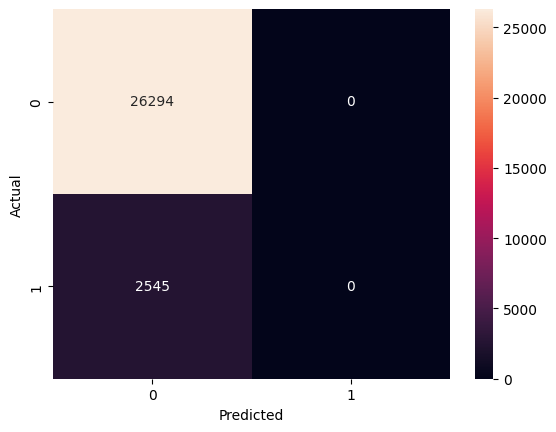

nn_model_8_4_relu6_undersample_0.5
Epoch 1/64
891/891 [==============================] - 4s 3ms/step - loss: 0.3281 - accuracy: 0.8732 - val_loss: 0.6534 - val_accuracy: 0.6921
Epoch 2/64
891/891 [==============================] - 2s 3ms/step - loss: 0.1820 - accuracy: 0.9285 - val_loss: 0.6368 - val_accuracy: 0.7104
Epoch 3/64
891/891 [==============================] - 2s 3ms/step - loss: 0.1740 - accuracy: 0.9311 - val_loss: 0.6726 - val_accuracy: 0.6966
Epoch 4/64
891/891 [==============================] - 2s 2ms/step - loss: 0.1701 - accuracy: 0.9327 - val_loss: 0.5069 - val_accuracy: 0.7676
Epoch 5/64
891/891 [==============================] - 2s 3ms/step - loss: 0.1689 - accuracy: 0.9330 - val_loss: 0.6737 - val_accuracy: 0.6958
Epoch 6/64
891/891 [==============================] - 3s 4ms/step - loss: 0.1674 - accuracy: 0.9326 - val_loss: 0.6364 - val_accuracy: 0.7129
Epoch 7/64
891/891 [==============================] - 2s 3ms/step - loss: 0.1659 - accuracy: 0.9335 - val_loss: 0

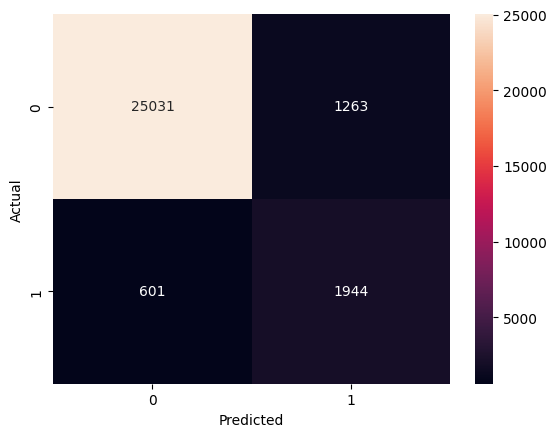

nn_model_16_8_4_relu_undersample_0.1
Epoch 1/64
3266/3266 [==============================] - 11s 3ms/step - loss: 0.0289 - accuracy: 0.9909 - val_loss: 7.8097 - val_accuracy: 0.5455
Epoch 2/64
3266/3266 [==============================] - 10s 3ms/step - loss: 2.8055e-06 - accuracy: 1.0000 - val_loss: 10.0197 - val_accuracy: 0.5455
Epoch 3/64
3266/3266 [==============================] - 8s 3ms/step - loss: 2.4562e-07 - accuracy: 1.0000 - val_loss: 11.6532 - val_accuracy: 0.5455
Epoch 4/64
3266/3266 [==============================] - 10s 3ms/step - loss: 3.4091e-08 - accuracy: 1.0000 - val_loss: 13.0835 - val_accuracy: 0.5455
Epoch 5/64
3266/3266 [==============================] - 11s 4ms/step - loss: 5.7558e-09 - accuracy: 1.0000 - val_loss: 14.2657 - val_accuracy: 0.5455
Epoch 6/64
3266/3266 [==============================] - 9s 3ms/step - loss: 1.2692e-09 - accuracy: 1.0000 - val_loss: 15.1274 - val_accuracy: 0.5455
Epoch 6: early stopping
902/902 [==============================] - 2s 

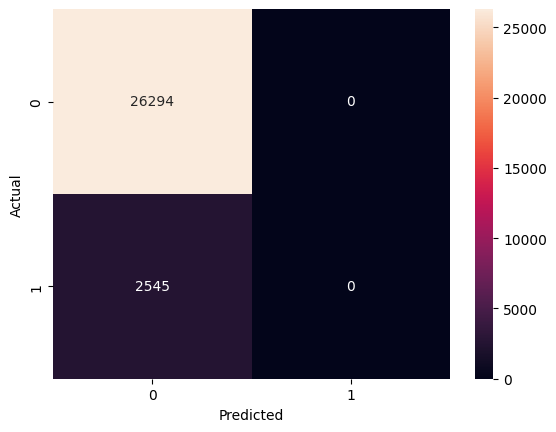

nn_model_16_8_4_relu_undersample_0.25
Epoch 1/64
1485/1485 [==============================] - 5s 3ms/step - loss: 0.0497 - accuracy: 0.9896 - val_loss: 9.6755 - val_accuracy: 0.0000e+00
Epoch 2/64
1485/1485 [==============================] - 4s 2ms/step - loss: 1.0578e-04 - accuracy: 1.0000 - val_loss: 11.7463 - val_accuracy: 0.0000e+00
Epoch 3/64
1485/1485 [==============================] - 5s 3ms/step - loss: 2.5054e-05 - accuracy: 1.0000 - val_loss: 13.2034 - val_accuracy: 0.0000e+00
Epoch 4/64
1485/1485 [==============================] - 4s 3ms/step - loss: 8.4339e-06 - accuracy: 1.0000 - val_loss: 14.4556 - val_accuracy: 0.0000e+00
Epoch 5/64
1485/1485 [==============================] - 4s 3ms/step - loss: 3.2221e-06 - accuracy: 1.0000 - val_loss: 15.6135 - val_accuracy: 0.0000e+00
Epoch 6/64
1485/1485 [==============================] - 6s 4ms/step - loss: 1.3029e-06 - accuracy: 1.0000 - val_loss: 16.7227 - val_accuracy: 0.0000e+00
Epoch 6: early stopping
902/902 [================

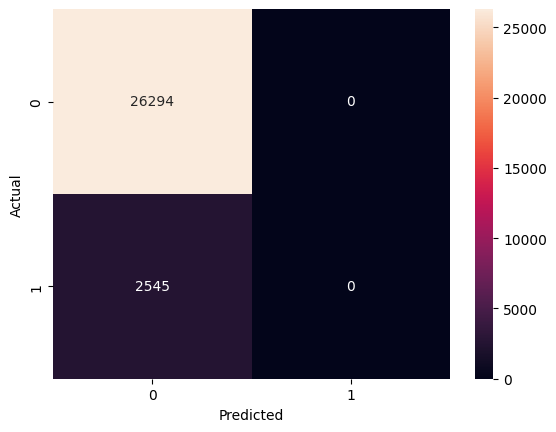

nn_model_16_8_4_relu_undersample_0.5
Epoch 1/64
891/891 [==============================] - 4s 3ms/step - loss: 0.2513 - accuracy: 0.9001 - val_loss: 0.6430 - val_accuracy: 0.7090
Epoch 2/64
891/891 [==============================] - 2s 3ms/step - loss: 0.1783 - accuracy: 0.9275 - val_loss: 0.5934 - val_accuracy: 0.7278
Epoch 3/64
891/891 [==============================] - 3s 4ms/step - loss: 0.1721 - accuracy: 0.9314 - val_loss: 0.5798 - val_accuracy: 0.7235
Epoch 4/64
891/891 [==============================] - 3s 3ms/step - loss: 0.1687 - accuracy: 0.9322 - val_loss: 0.6235 - val_accuracy: 0.7118
Epoch 5/64
891/891 [==============================] - 2s 3ms/step - loss: 0.1656 - accuracy: 0.9337 - val_loss: 0.7446 - val_accuracy: 0.6534
Epoch 6/64
891/891 [==============================] - 3s 3ms/step - loss: 0.1628 - accuracy: 0.9347 - val_loss: 0.5881 - val_accuracy: 0.7148
Epoch 7/64
891/891 [==============================] - 2s 3ms/step - loss: 0.1600 - accuracy: 0.9363 - val_loss:

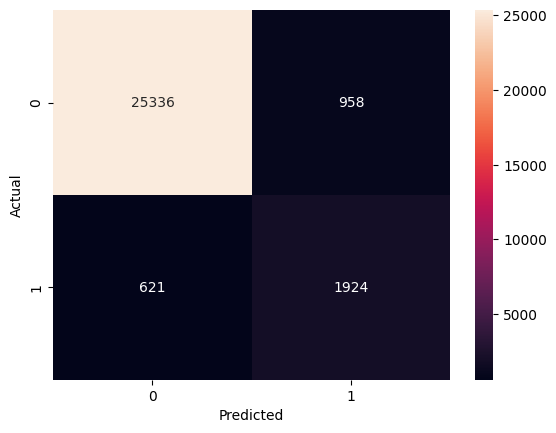

nn_model_16_8_4_leakyrelu_undersample_0.1
Epoch 1/64
3266/3266 [==============================] - 11s 3ms/step - loss: 0.0125 - accuracy: 0.9972 - val_loss: 5.4134 - val_accuracy: 0.5455
Epoch 2/64
3266/3266 [==============================] - 9s 3ms/step - loss: 1.0645e-05 - accuracy: 1.0000 - val_loss: 6.5864 - val_accuracy: 0.5455
Epoch 3/64
3266/3266 [==============================] - 10s 3ms/step - loss: 1.3143e-06 - accuracy: 1.0000 - val_loss: 7.5913 - val_accuracy: 0.5455
Epoch 4/64
3266/3266 [==============================] - 10s 3ms/step - loss: 1.9788e-07 - accuracy: 1.0000 - val_loss: 8.5444 - val_accuracy: 0.5455
Epoch 5/64
3266/3266 [==============================] - 9s 3ms/step - loss: 3.1791e-08 - accuracy: 1.0000 - val_loss: 9.4713 - val_accuracy: 0.5455
Epoch 6/64
3266/3266 [==============================] - 10s 3ms/step - loss: 5.3634e-09 - accuracy: 1.0000 - val_loss: 10.3491 - val_accuracy: 0.5455
Epoch 6: early stopping
902/902 [==============================] - 1s

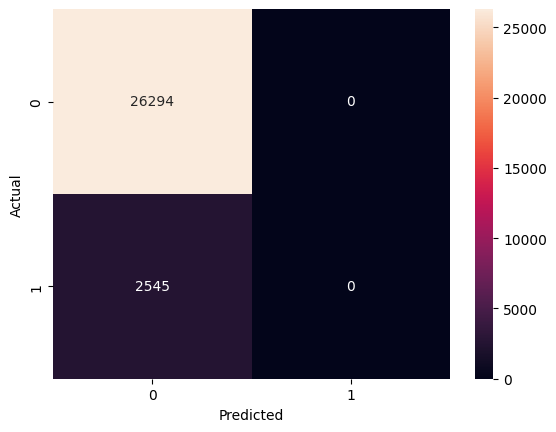

nn_model_16_8_4_leakyrelu_undersample_0.25
Epoch 1/64
1485/1485 [==============================] - 7s 4ms/step - loss: 0.0408 - accuracy: 0.9919 - val_loss: 9.2951 - val_accuracy: 0.0000e+00
Epoch 2/64
1485/1485 [==============================] - 4s 3ms/step - loss: 7.5245e-05 - accuracy: 1.0000 - val_loss: 11.3890 - val_accuracy: 0.0000e+00
Epoch 3/64
1485/1485 [==============================] - 5s 3ms/step - loss: 1.8229e-05 - accuracy: 1.0000 - val_loss: 12.8392 - val_accuracy: 0.0000e+00
Epoch 4/64
1485/1485 [==============================] - 5s 3ms/step - loss: 6.2614e-06 - accuracy: 1.0000 - val_loss: 14.0823 - val_accuracy: 0.0000e+00
Epoch 5/64
1485/1485 [==============================] - 4s 3ms/step - loss: 2.4375e-06 - accuracy: 1.0000 - val_loss: 15.2197 - val_accuracy: 0.0000e+00
Epoch 6/64
1485/1485 [==============================] - 4s 3ms/step - loss: 1.0024e-06 - accuracy: 1.0000 - val_loss: 16.3123 - val_accuracy: 0.0000e+00
Epoch 6: early stopping
902/902 [===========

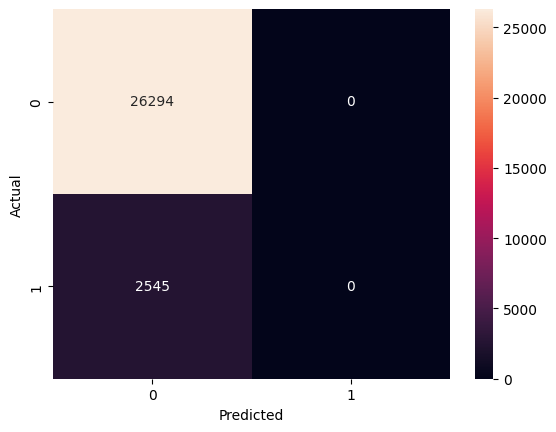

nn_model_16_8_4_leakyrelu_undersample_0.5
Epoch 1/64
891/891 [==============================] - 3s 3ms/step - loss: 0.2812 - accuracy: 0.8957 - val_loss: 0.6210 - val_accuracy: 0.6879
Epoch 2/64
891/891 [==============================] - 3s 3ms/step - loss: 0.1661 - accuracy: 0.9331 - val_loss: 0.6888 - val_accuracy: 0.6598
Epoch 3/64
891/891 [==============================] - 2s 3ms/step - loss: 0.1608 - accuracy: 0.9350 - val_loss: 0.6273 - val_accuracy: 0.6702
Epoch 4/64
891/891 [==============================] - 3s 3ms/step - loss: 0.1560 - accuracy: 0.9377 - val_loss: 0.6322 - val_accuracy: 0.6649
Epoch 5/64
891/891 [==============================] - 3s 4ms/step - loss: 0.1533 - accuracy: 0.9394 - val_loss: 0.5921 - val_accuracy: 0.6899
Epoch 6/64
891/891 [==============================] - 2s 3ms/step - loss: 0.1506 - accuracy: 0.9413 - val_loss: 0.5814 - val_accuracy: 0.7045
Epoch 7/64
891/891 [==============================] - 2s 3ms/step - loss: 0.1482 - accuracy: 0.9422 - val_

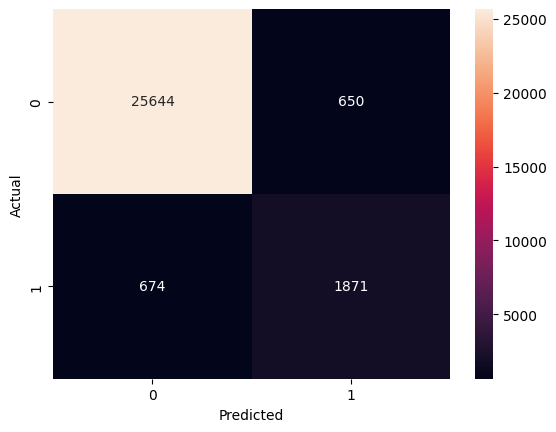

nn_model_16_8_gelu_undersample_0.1
Epoch 1/64
3266/3266 [==============================] - 11s 3ms/step - loss: 0.0208 - accuracy: 0.9984 - val_loss: 5.9269 - val_accuracy: 0.5455
Epoch 2/64
3266/3266 [==============================] - 9s 3ms/step - loss: 2.0157e-05 - accuracy: 1.0000 - val_loss: 7.3533 - val_accuracy: 0.5455
Epoch 3/64
3266/3266 [==============================] - 10s 3ms/step - loss: 2.4758e-06 - accuracy: 1.0000 - val_loss: 8.5560 - val_accuracy: 0.5455
Epoch 4/64
3266/3266 [==============================] - 10s 3ms/step - loss: 3.7430e-07 - accuracy: 1.0000 - val_loss: 9.6869 - val_accuracy: 0.5455
Epoch 5/64
3266/3266 [==============================] - 9s 3ms/step - loss: 6.0390e-08 - accuracy: 1.0000 - val_loss: 10.7732 - val_accuracy: 0.5455
Epoch 6/64
3266/3266 [==============================] - 10s 3ms/step - loss: 1.0189e-08 - accuracy: 1.0000 - val_loss: 11.8013 - val_accuracy: 0.5455
Epoch 6: early stopping
902/902 [==============================] - 1s 2ms/s

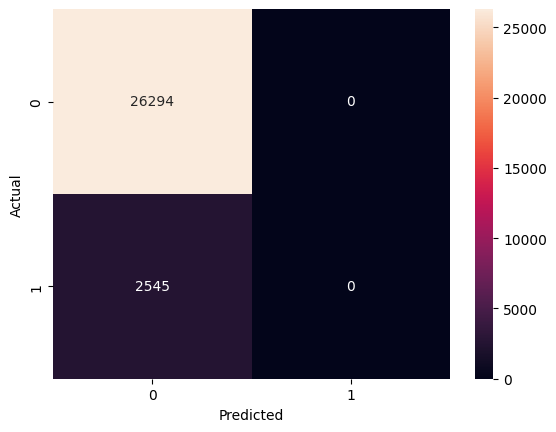

nn_model_16_8_gelu_undersample_0.25
Epoch 1/64
1485/1485 [==============================] - 8s 4ms/step - loss: 0.0714 - accuracy: 0.9803 - val_loss: 8.7570 - val_accuracy: 0.0000e+00
Epoch 2/64
1485/1485 [==============================] - 5s 3ms/step - loss: 2.7843e-04 - accuracy: 1.0000 - val_loss: 10.8276 - val_accuracy: 0.0000e+00
Epoch 3/64
1485/1485 [==============================] - 4s 3ms/step - loss: 6.7487e-05 - accuracy: 1.0000 - val_loss: 12.2568 - val_accuracy: 0.0000e+00
Epoch 4/64
1485/1485 [==============================] - 6s 4ms/step - loss: 2.3046e-05 - accuracy: 1.0000 - val_loss: 13.4859 - val_accuracy: 0.0000e+00
Epoch 5/64
1485/1485 [==============================] - 4s 3ms/step - loss: 8.8901e-06 - accuracy: 1.0000 - val_loss: 14.6077 - val_accuracy: 0.0000e+00
Epoch 6/64
1485/1485 [==============================] - 4s 3ms/step - loss: 3.6303e-06 - accuracy: 1.0000 - val_loss: 15.6759 - val_accuracy: 0.0000e+00
Epoch 6: early stopping
902/902 [==================

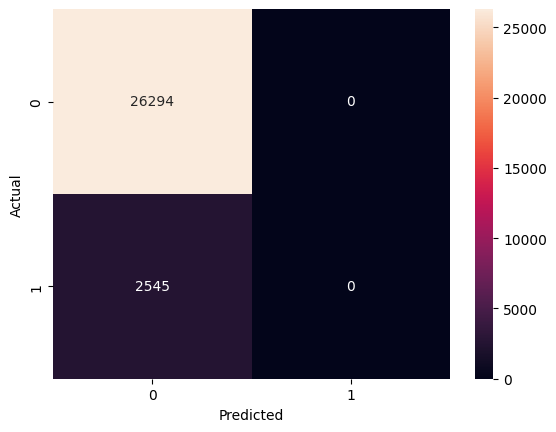

nn_model_16_8_gelu_undersample_0.5
Epoch 1/64
891/891 [==============================] - 4s 3ms/step - loss: 0.2548 - accuracy: 0.9073 - val_loss: 0.6515 - val_accuracy: 0.6991
Epoch 2/64
891/891 [==============================] - 2s 3ms/step - loss: 0.1675 - accuracy: 0.9325 - val_loss: 0.6088 - val_accuracy: 0.7098
Epoch 3/64
891/891 [==============================] - 3s 3ms/step - loss: 0.1644 - accuracy: 0.9337 - val_loss: 0.6696 - val_accuracy: 0.6857
Epoch 4/64
891/891 [==============================] - 4s 4ms/step - loss: 0.1624 - accuracy: 0.9351 - val_loss: 0.6482 - val_accuracy: 0.6952
Epoch 5/64
891/891 [==============================] - 3s 3ms/step - loss: 0.1603 - accuracy: 0.9356 - val_loss: 0.5851 - val_accuracy: 0.7238
Epoch 6/64
891/891 [==============================] - 3s 3ms/step - loss: 0.1587 - accuracy: 0.9372 - val_loss: 0.5498 - val_accuracy: 0.7331
Epoch 7/64
891/891 [==============================] - 3s 3ms/step - loss: 0.1575 - accuracy: 0.9371 - val_loss: 0

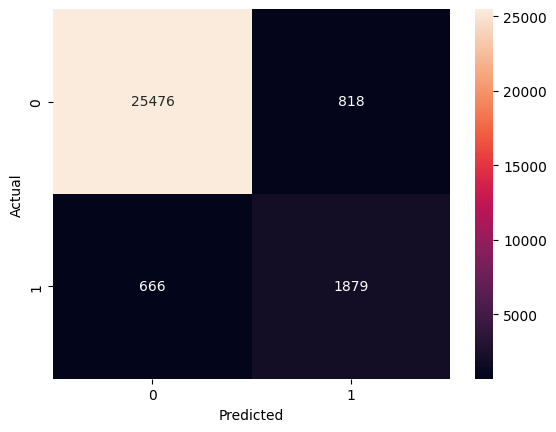

nn_model_16_8_4_relu6_undersample_0.1
Epoch 1/64
3266/3266 [==============================] - 11s 3ms/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 5.1565 - val_accuracy: 0.5455
Epoch 2/64
2141/3266 [==================>...........] - ETA: 2s - loss: 1.3905e-05 - accuracy: 1.0000

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import random
import tensorflow as tf
from sklearn.utils import class_weight
nn_models_undersample = {}
undersample_ratios = [0.1, 0.25, 0.5]
model_list = list(nn_models.items())
random.shuffle(model_list)
model_list = model_list[:10]
for name, model in model_list:
    for undersample_ratio in undersample_ratios:
        strategy_str = f"undersample_{undersample_ratio}"
        undersampler = RandomUnderSampler(sampling_strategy=undersample_ratio)
        X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)
        new_model = tf.keras.models.clone_model(model)
        new_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        new_model_name = f"{name}_{strategy_str}"
        print(new_model_name)
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
        new_model.fit(X_resampled, y_resampled, epochs=64, batch_size=16, validation_split=0.2, verbose=1, callbacks=[early_stopping])
        nn_models_undersample[new_model_name] = new_model
        evaluation(new_model, X_test, y_test, is_nn=True)

# Build SVM Model and Evaluation

Training SVM menggunakan default values dan class_weight 'balanced'

Accuracy: 0.9619959083185964
Precision: 0.973839110529758
Recall: 0.5850687622789784
F1-score: 0.7309769268532156

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     26294
           1       0.97      0.59      0.73      2545

    accuracy                           0.96     28839
   macro avg       0.97      0.79      0.86     28839
weighted avg       0.96      0.96      0.96     28839



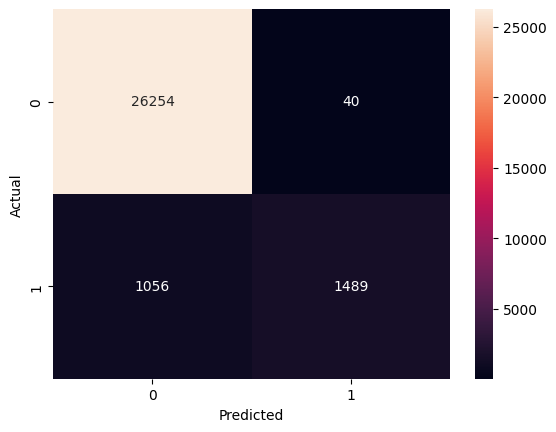

In [ ]:
svc_rbf_model = build_svc(X_train, y_train, method="rbf")
eval = evaluation(svc_rbf_model, X_test, y_test)

Accuracy: 0.9625160373105863
Precision: 0.9784313725490196
Recall: 0.5882121807465619
F1-score: 0.7347239263803682

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     26294
           1       0.98      0.59      0.73      2545

    accuracy                           0.96     28839
   macro avg       0.97      0.79      0.86     28839
weighted avg       0.96      0.96      0.96     28839



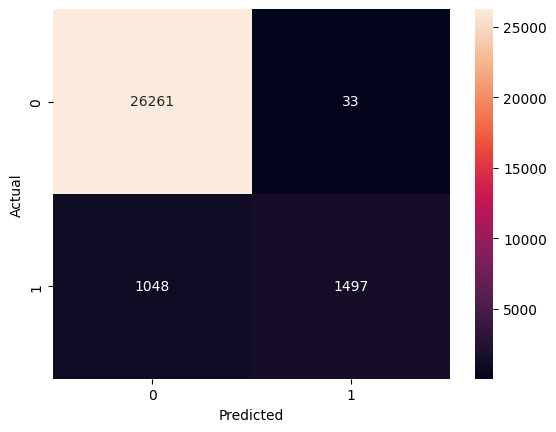

In [ ]:
svc_poly_model = build_svc(X_train, y_train, method="poly")
eval = evaluation(svc_poly_model, X_test, y_test)

Accuracy: 0.9605048718748916
Precision: 0.9328817733990148
Recall: 0.5952848722986247
F1-score: 0.7267929959222834

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     26294
           1       0.93      0.60      0.73      2545

    accuracy                           0.96     28839
   macro avg       0.95      0.80      0.85     28839
weighted avg       0.96      0.96      0.96     28839



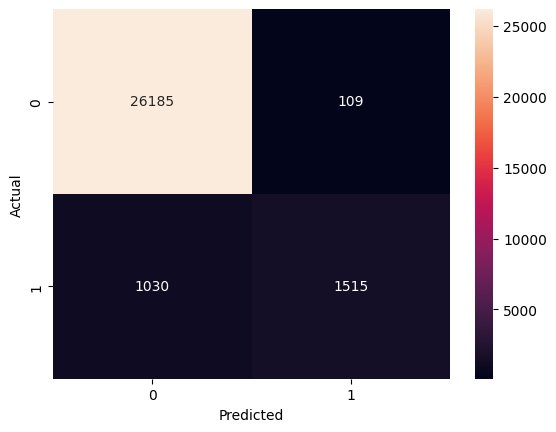

In [ ]:
svc_line_model = build_svc(X_train, y_train, method="linear")
eval = evaluation(svc_line_model, X_test, y_test)

Accuracy: 0.8891778494399944
Precision: 0.4391475042063937
Recall: 0.9229862475442043
F1-score: 0.5951355459842919

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.94     26294
           1       0.44      0.92      0.60      2545

    accuracy                           0.89     28839
   macro avg       0.72      0.90      0.77     28839
weighted avg       0.94      0.89      0.91     28839



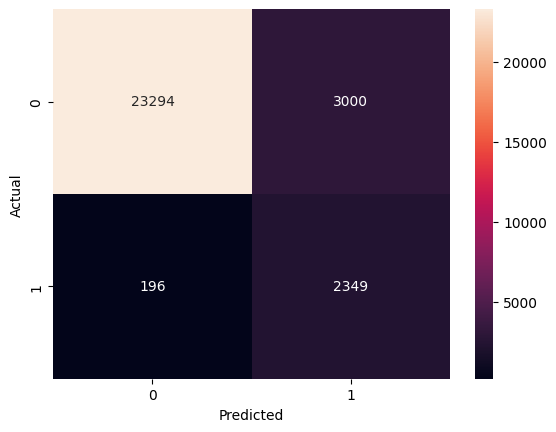

In [ ]:
svc_rbf_model_weighted = SVC(kernel="rbf", class_weight='balanced')
svc_rbf_model_weighted.fit(X_train, y_train)
eval = evaluation(svc_rbf_model_weighted, X_test, y_test)

Accuracy: 0.9063767814417976
Precision: 0.48362560743714345
Recall: 0.8994106090373281
F1-score: 0.6290189612530915

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95     26294
           1       0.48      0.90      0.63      2545

    accuracy                           0.91     28839
   macro avg       0.74      0.90      0.79     28839
weighted avg       0.94      0.91      0.92     28839



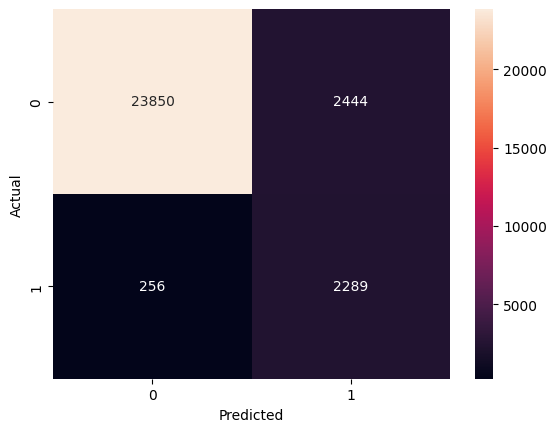

In [ ]:
svc_poly_model_weighted = SVC(kernel="poly", class_weight='balanced')
svc_poly_model_weighted.fit(X_train, y_train)
eval = evaluation(svc_poly_model_weighted, X_test, y_test)

Accuracy: 0.8863691528832484
Precision: 0.43068181818181817
Recall: 0.8935166994106091
F1-score: 0.5812140575079873

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.93     26294
           1       0.43      0.89      0.58      2545

    accuracy                           0.89     28839
   macro avg       0.71      0.89      0.76     28839
weighted avg       0.94      0.89      0.90     28839



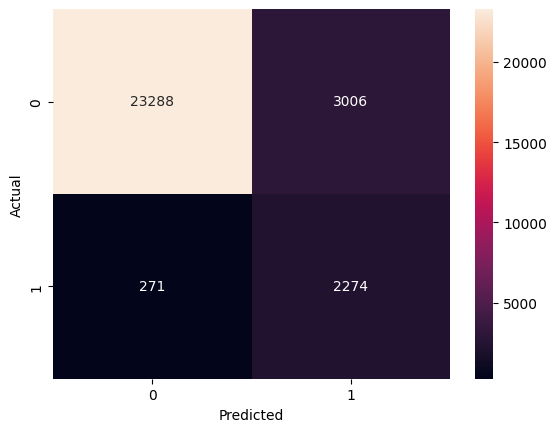

In [ ]:
svc_line_model_weighted = SVC(kernel="linear", class_weight='balanced')
svc_line_model_weighted.fit(X_train, y_train)
eval = evaluation(svc_line_model_weighted, X_test, y_test)

Tuning parameter class weight model SVM menggunakan GridsearchCV. Cross validation bernilai 2 dan scoring berdasarkan 'accuracy', 'f1-score', 'recall' dan 'precision'

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..............class_weight={0: 1, 1: 1}, kernel=rbf; total time=  18.6s
[CV] END ..............class_weight={0: 1, 1: 1}, kernel=rbf; total time=  14.4s
[CV] END .............class_weight={0: 1, 1: 1}, kernel=poly; total time=  11.7s
[CV] END .............class_weight={0: 1, 1: 1}, kernel=poly; total time=  10.6s
[CV] END ...........class_weight={0: 1, 1: 1}, kernel=linear; total time=  11.6s
[CV] END ...........class_weight={0: 1, 1: 1}, kernel=linear; total time=  11.4s
[CV] END ..............class_weight={0: 1, 1: 3}, kernel=rbf; total time=  23.2s
[CV] END ..............class_weight={0: 1, 1: 3}, kernel=rbf; total time=  22.1s
[CV] END .............class_weight={0: 1, 1: 3}, kernel=poly; total time=  17.1s
[CV] END .............class_weight={0: 1, 1: 3}, kernel=poly; total time=  15.5s
[CV] END ...........class_weight={0: 1, 1: 3}, kernel=linear; total time=  19.9s
[CV] END ...........class_weight={0: 1, 1: 3}, ke

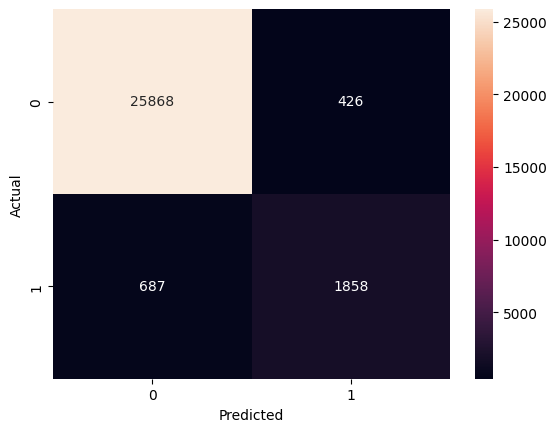

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'kernel': ["rbf", "poly", "linear"],
    'class_weight': [{0: 1, 1: w} for w in [1, 3, 5]]
}

# Initialize SVC
svc = SVC()

# Initialize GridSearchCV
grid_search = GridSearchCV(svc, param_grid, cv=2, scoring=['accuracy', 'f1', 'recall', 'precision'], refit='f1', return_train_score=True, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best class weights: ", best_params)

# Best model
best_model = grid_search.best_estimator_

eval = evaluation(best_model, X_test, y_test)

In [ ]:
results = grid_search.cv_results_

# Initialize arrays to store the metrics
accuracy_scores = results['mean_test_accuracy']
f1_scores = results['mean_test_f1']
recall_scores = results['mean_test_recall']
precision_scores = results['mean_test_precision']

# Store all the arrays into a single array
all_metrics = [accuracy_scores, f1_scores, recall_scores, precision_scores]

# Create a DataFrame from the arrays and parameter combinations
metrics_df = pd.DataFrame({
    'Kernel': results['param_kernel'],
    'Sampling Strategy': results['param_class_weight'],
    'Accuracy': accuracy_scores,
    'F1 Score': f1_scores,
    'Recall': recall_scores,
    'Precision': precision_scores,
})

# Output the DataFrame as a table
print(metrics_df)

   Kernel Sampling Strategy  Accuracy  F1 Score    Recall  Precision
0     rbf      {0: 1, 1: 1}  0.961554  0.725925  0.577059   0.978301
1    poly      {0: 1, 1: 1}  0.962342  0.731687  0.581944   0.985212
2  linear      {0: 1, 1: 1}  0.958998  0.715443  0.584300   0.922652
3     rbf      {0: 1, 1: 3}  0.956902  0.743689  0.708773   0.782605
4    poly      {0: 1, 1: 3}  0.958938  0.753051  0.709616   0.802634
5  linear      {0: 1, 1: 3}  0.947986  0.710557  0.723427   0.698778
6     rbf      {0: 1, 1: 5}  0.938831  0.698695  0.803434   0.618532
7    poly      {0: 1, 1: 5}  0.943334  0.711885  0.793160   0.645994
8  linear      {0: 1, 1: 5}  0.930033  0.665968  0.790464   0.575586


Tuning model SVM menggunakan metode Undersampling (RandomUnderSampler) dengan parameter sampling strategy = [0.1, 0.25, 0.5]

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END svc__kernel=rbf, undersample__sampling_strategy=0.1; total time=  15.4s
[CV] END svc__kernel=rbf, undersample__sampling_strategy=0.1; total time=  14.1s
[CV] END svc__kernel=rbf, undersample__sampling_strategy=0.25; total time=   9.3s
[CV] END svc__kernel=rbf, undersample__sampling_strategy=0.25; total time=   9.0s
[CV] END svc__kernel=rbf, undersample__sampling_strategy=0.5; total time=   8.5s
[CV] END svc__kernel=rbf, undersample__sampling_strategy=0.5; total time=   6.1s
[CV] END svc__kernel=poly, undersample__sampling_strategy=0.1; total time=  11.3s
[CV] END svc__kernel=poly, undersample__sampling_strategy=0.1; total time=  10.8s
[CV] END svc__kernel=poly, undersample__sampling_strategy=0.25; total time=   5.0s
[CV] END svc__kernel=poly, undersample__sampling_strategy=0.25; total time=   5.8s
[CV] END svc__kernel=poly, undersample__sampling_strategy=0.5; total time=   3.1s
[CV] END svc__kernel=poly, undersample__

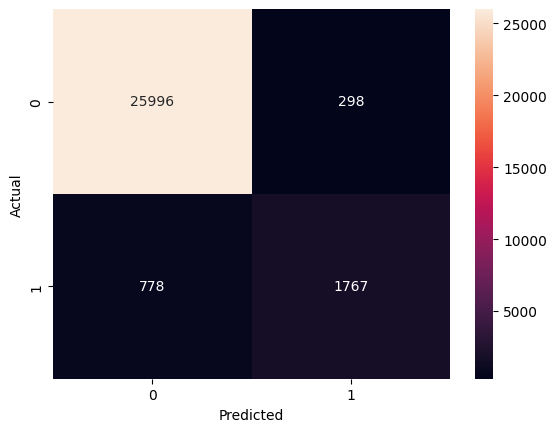

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Define the parameter grid
param_grid = {
    'svc__kernel': ['rbf', 'poly', 'linear'],
    'undersample__sampling_strategy': [0.1, 0.25, 0.5]
}

# Initialize the components of the pipeline
undersample = RandomUnderSampler()
svc = SVC()

# Create a pipeline
pipeline = Pipeline([
    ('undersample', undersample),
    ('svc', svc)
])

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=2, scoring=['accuracy', 'f1', 'recall', 'precision'], refit='f1', return_train_score=True, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best parameters: ", best_params)

# Best model
best_model = grid_search.best_estimator_

eval = evaluation(best_model, X_test, y_test)

In [ ]:
results = grid_search.cv_results_

# Initialize arrays to store the metrics
accuracy_scores = results['mean_test_accuracy']
f1_scores = results['mean_test_f1']
recall_scores = results['mean_test_recall']
precision_scores = results['mean_test_precision']

# Store all the arrays into a single array
all_metrics = [accuracy_scores, f1_scores, recall_scores, precision_scores]

# Create a DataFrame from the arrays and parameter combinations
metrics_df = pd.DataFrame({
    'Kernel': results['param_svc__kernel'],
    'Sampling Strategy': results['param_undersample__sampling_strategy'],
    'Accuracy': accuracy_scores,
    'F1 Score': f1_scores,
    'Recall': recall_scores,
    'Precision': precision_scores,
})

# Output the DataFrame as a table
print(metrics_df)

   Kernel Sampling Strategy  Accuracy  F1 Score    Recall  Precision
0     rbf               0.1  0.961673  0.727237  0.579080   0.977274
1     rbf              0.25  0.958611  0.745908  0.688562   0.813921
2     rbf               0.5  0.934893  0.685543  0.803940   0.597830
3    poly               0.1  0.962431  0.732663  0.583460   0.984442
4    poly              0.25  0.960410  0.752402  0.681823   0.840469
5    poly               0.5  0.941833  0.701228  0.772946   0.642647
6  linear               0.1  0.959027  0.716643  0.587332   0.919147
7  linear              0.25  0.951047  0.717856  0.705740   0.731735
8  linear               0.5  0.929424  0.664061  0.790633   0.572591


Tuning model SVM menggunakan metode Oversampling (SMOTE) dengan parameter sampling strategy = [0.1, 0.25, 0.5]

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ......smote__sampling_strategy=0.1, svc__kernel=rbf; total time=  16.5s
[CV] END ......smote__sampling_strategy=0.1, svc__kernel=rbf; total time=  15.7s
[CV] END .....smote__sampling_strategy=0.1, svc__kernel=poly; total time=  10.9s
[CV] END .....smote__sampling_strategy=0.1, svc__kernel=poly; total time=  10.9s
[CV] END ...smote__sampling_strategy=0.1, svc__kernel=linear; total time=  12.8s
[CV] END ...smote__sampling_strategy=0.1, svc__kernel=linear; total time=  12.4s
[CV] END .....smote__sampling_strategy=0.25, svc__kernel=rbf; total time=  29.7s
[CV] END .....smote__sampling_strategy=0.25, svc__kernel=rbf; total time=  29.7s
[CV] END ....smote__sampling_strategy=0.25, svc__kernel=poly; total time=  20.2s
[CV] END ....smote__sampling_strategy=0.25, svc__kernel=poly; total time=  21.6s
[CV] END ..smote__sampling_strategy=0.25, svc__kernel=linear; total time=  27.5s
[CV] END ..smote__sampling_strategy=0.25, svc__ke

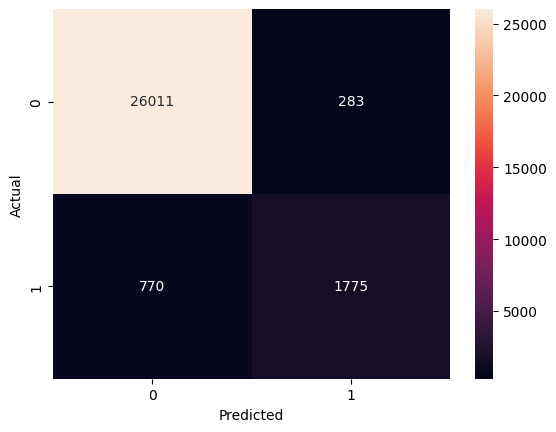

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Define the parameter grid
param_grid = {
    'svc__kernel': ['rbf', 'poly', 'linear'],
    'smote__sampling_strategy': [0.1, 0.25, 0.5]
}

# Initialize the components of the pipeline
smote = SMOTE()
svc = SVC()

# Create a pipeline
pipeline = Pipeline([
    ('smote', smote),
    ('svc', svc)
])

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=2, scoring=['accuracy', 'f1', 'recall', 'precision'], refit='f1', return_train_score=True, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best parameters: ", best_params)

# Best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
eval = evaluation(best_model, X_test, y_test)

In [ ]:
# Extract the results into arrays
results = grid_search.cv_results_

# Initialize arrays to store the metrics
accuracy_scores = results['mean_test_accuracy']
f1_scores = results['mean_test_f1']
recall_scores = results['mean_test_recall']
precision_scores = results['mean_test_precision']

# Create a DataFrame from the arrays and parameter combinations
metrics_df = pd.DataFrame({
    'Kernel': results['param_svc__kernel'],
    'Sampling Strategy': results['param_smote__sampling_strategy'],
    'Accuracy': accuracy_scores,
    'F1 Score': f1_scores,
    'Recall': recall_scores,
    'Precision': precision_scores
})

print(metrics_df)

   Kernel Sampling Strategy  Accuracy  F1 Score    Recall  Precision
0     rbf               0.1  0.961702  0.727673  0.579922   0.976453
1    poly               0.1  0.962490  0.733311  0.584470   0.983871
2  linear               0.1  0.959072  0.717088  0.588006   0.919010
3     rbf              0.25  0.958849  0.746517  0.686877   0.817633
4    poly              0.25  0.960187  0.753899  0.691256   0.829949
5  linear              0.25  0.951329  0.718932  0.705404   0.733895
6     rbf               0.5  0.936409  0.692648  0.811013   0.605160
7    poly               0.5  0.941878  0.707158  0.795181   0.636913
8  linear               0.5  0.926199  0.656647  0.799728   0.557222


# Build Random Forest Model and Evaluation

Training Random Forest dengan jumlah desicion tree atau n_estimators=100 dan n_estimators=150

Accuracy: 0.9674746003675578
Precision: 0.9340896812533765
Recall: 0.6793713163064833
F1-score: 0.786624203821656

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     26294
           1       0.93      0.68      0.79      2545

    accuracy                           0.97     28839
   macro avg       0.95      0.84      0.88     28839
weighted avg       0.97      0.97      0.97     28839



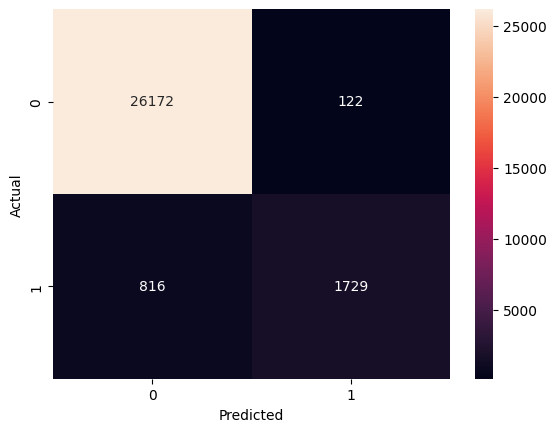

In [ ]:
# RFC model with default parameters
rfc_model_def = build_rfc(Xr_train, yr_train)
evaluation(rfc_model_def, Xr_test, yr_test)

Accuracy: 0.9675092756336905
Precision: 0.9364820846905537
Recall: 0.6777996070726916
F1-score: 0.7864144062001367

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     26294
           1       0.94      0.68      0.79      2545

    accuracy                           0.97     28839
   macro avg       0.95      0.84      0.88     28839
weighted avg       0.97      0.97      0.97     28839



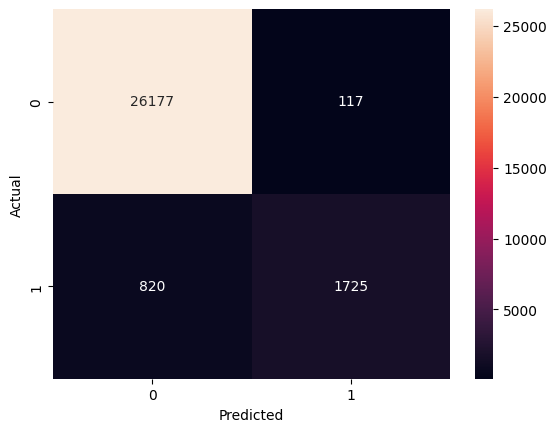

In [ ]:
# RFC model with parameter n_estimators=150
rfc_model_150 = build_rfc_150(Xr_train, yr_train)
evaluation(rfc_model_150, Xr_test, yr_test)

## Find important features with Random Forest model

In [ ]:
feature_names = np.array(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level'])
feature_scores = pd.Series(rfc_model_150.feature_importances_, index=feature_names).sort_values(ascending=False)

feature_scores

HbA1c_level            0.400715
blood_glucose_level    0.322698
bmi                    0.123580
age                    0.105071
hypertension           0.016099
smoking_history        0.013947
heart_disease          0.010730
gender                 0.007160
dtype: float64

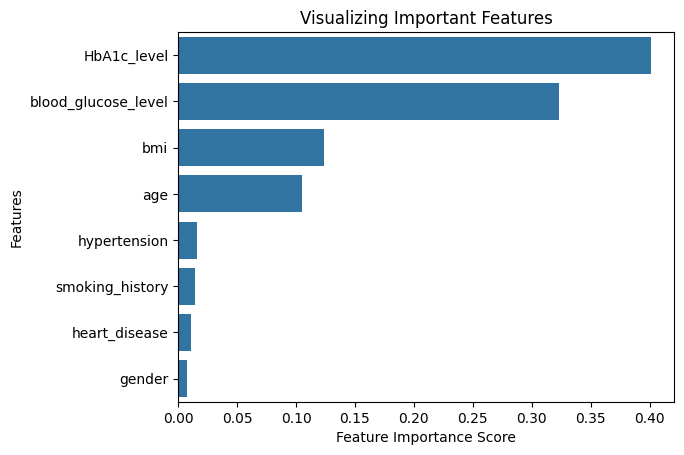

In [ ]:
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
# Add title to the graph
plt.title("Visualizing Important Features")
# Visualize the graph
plt.show()

## Build Random Forest model on selected features

In [ ]:
X_f = df.drop(['diabetes', 'gender'], axis=1)

y_f = df['diabetes']

In [ ]:
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_f, y_f, test_size=0.30, stratify=y_f)

In [ ]:
X_train_f.shape, X_test_f.shape

((67289, 7), (28839, 7))

Training Random Forest dengan menghilangkan fitur tidak penting, jumlah desicion tree atau n_estimators=100 dan n_estimators=150

Accuracy: 0.9678907035611498
Precision: 0.9326563335114911
Recall: 0.6856581532416502
F1-score: 0.7903079710144927

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     26294
           1       0.93      0.69      0.79      2545

    accuracy                           0.97     28839
   macro avg       0.95      0.84      0.89     28839
weighted avg       0.97      0.97      0.97     28839



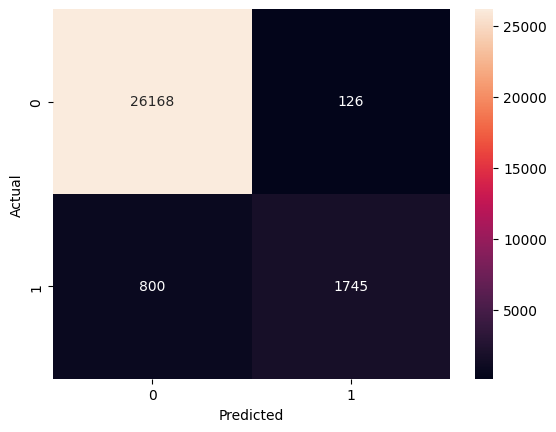

In [ ]:
# rfc model with default parameter and selected importance features
rfc_model_def_f = build_rfc(X_train_f, y_train_f)
evaluation(rfc_model_def_f, X_test_f, y_test_f)

Accuracy: 0.9677520024966192
Precision: 0.9329758713136729
Recall: 0.6836935166994106
F1-score: 0.7891156462585034

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     26294
           1       0.93      0.68      0.79      2545

    accuracy                           0.97     28839
   macro avg       0.95      0.84      0.89     28839
weighted avg       0.97      0.97      0.97     28839



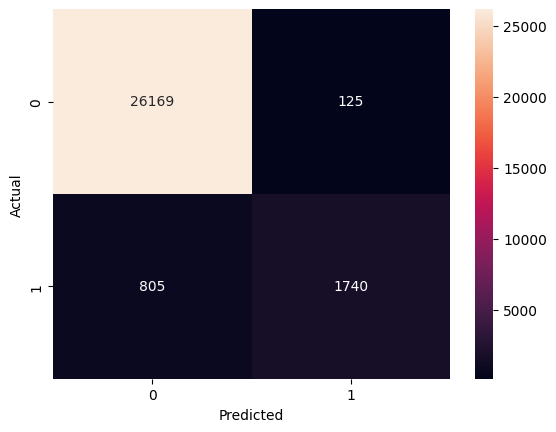

In [ ]:
# rfc model with n_estimators=150 and selected importance features
rfc_model_150_f = build_rfc_150(X_train_f, y_train_f)
evaluation(rfc_model_150_f, X_test_f, y_test_f)

Training Random Forest dengan semua fitur, n_estimators=150 dan class_weight='balanced'

Accuracy: 0.9677520024966192
Precision: 0.9376693766937669
Recall: 0.6797642436149313
F1-score: 0.7881548974943052

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     26294
           1       0.94      0.68      0.79      2545

    accuracy                           0.97     28839
   macro avg       0.95      0.84      0.89     28839
weighted avg       0.97      0.97      0.97     28839



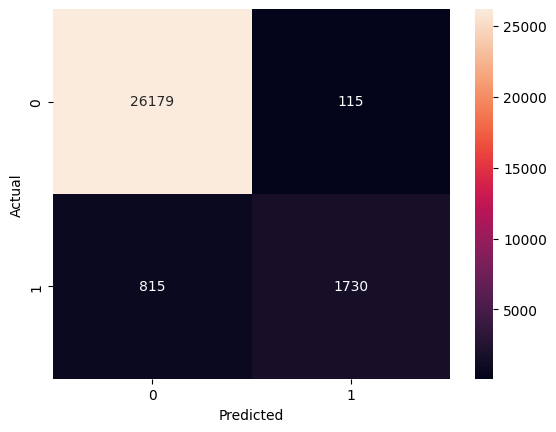

In [ ]:
# rfc model with all features, additional trees and weighted
rfc_model_150_weighted = RandomForestClassifier(n_estimators=150, class_weight='balanced')
rfc_model_150_weighted.fit(Xr_train, yr_train)
evaluation(rfc_model_150_weighted, Xr_test, yr_test)

Accuracy: 0.9679600540934151
Precision: 0.9341189073379753
Recall: 0.6852652259332024
F1-score: 0.7905711695376245

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     26294
           1       0.93      0.69      0.79      2545

    accuracy                           0.97     28839
   macro avg       0.95      0.84      0.89     28839
weighted avg       0.97      0.97      0.97     28839



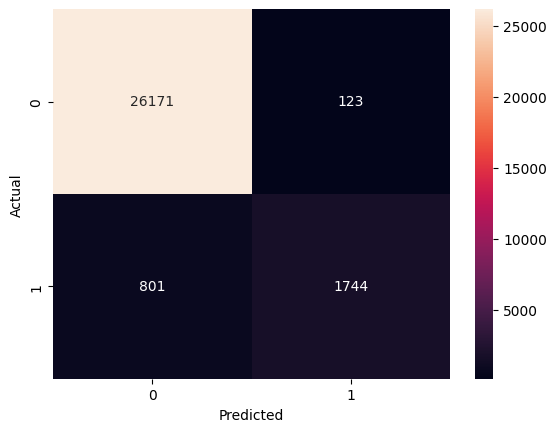

In [ ]:
# rfc model with only importance features, additional trees and weighted
rfc_model_150_f_weighted = RandomForestClassifier(n_estimators=150, class_weight='balanced')
rfc_model_150_f_weighted.fit(X_train_f, y_train_f)
evaluation(rfc_model_150_f_weighted, X_test_f, y_test_f)

## Build Balanced Random Forest Models and Evaluation

Training Balanced Random Forest dengan semua fitur

Accuracy: 0.9008287388605708
Precision: 0.4684431977559607
Recall: 0.918664047151277
F1-score: 0.6204883227176221

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94     26294
           1       0.47      0.92      0.62      2545

    accuracy                           0.90     28839
   macro avg       0.73      0.91      0.78     28839
weighted avg       0.95      0.90      0.91     28839



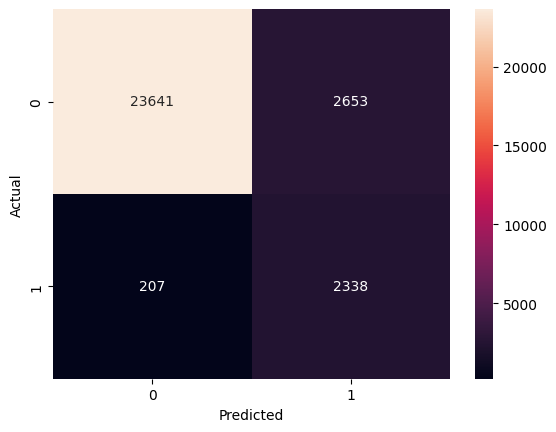

In [ ]:
# brfc model n_estimators=100, all features and weighted
brfc_model_def_weighted = BalancedRandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=2)
brfc_model_def_weighted.fit(Xr_train, yr_train)
evaluation(brfc_model_def_weighted, Xr_test, yr_test)

Accuracy: 0.8982280939006206
Precision: 0.46130952380952384
Recall: 0.9135559921414538
F1-score: 0.6130520764667106

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94     26294
           1       0.46      0.91      0.61      2545

    accuracy                           0.90     28839
   macro avg       0.73      0.91      0.78     28839
weighted avg       0.94      0.90      0.91     28839



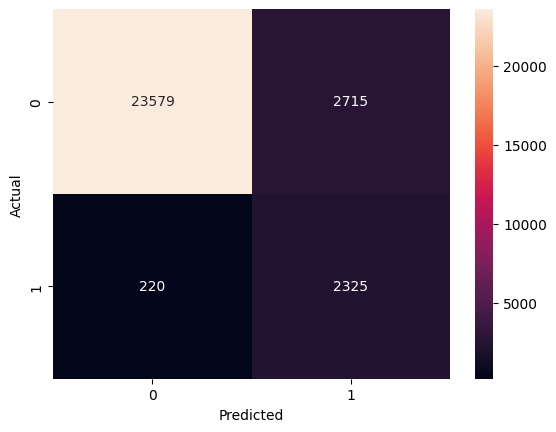

In [ ]:
# brfc model with n_estimators=150 and all features
brfc_model_150 = build_brfc(Xr_train, yr_train)
evaluation(brfc_model_150, Xr_test, yr_test)

Accuracy: 0.9000312077395194
Precision: 0.4662405113863364
Recall: 0.9170923379174852
F1-score: 0.6181962653953118

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94     26294
           1       0.47      0.92      0.62      2545

    accuracy                           0.90     28839
   macro avg       0.73      0.91      0.78     28839
weighted avg       0.94      0.90      0.91     28839



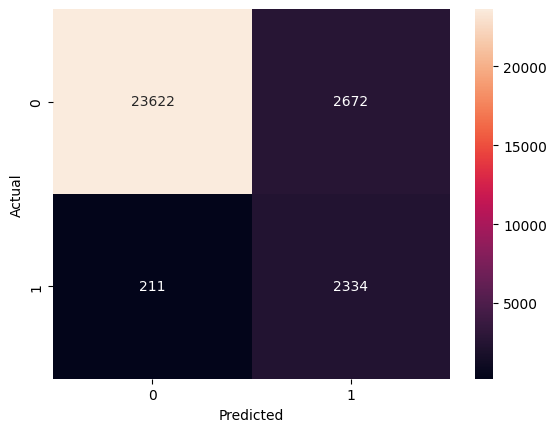

In [ ]:
# brfc model n_estimators=150, all features and weighted
brfc_model_150_weighted = BalancedRandomForestClassifier(n_estimators=150, class_weight='balanced')
brfc_model_150_weighted.fit(Xr_train, yr_train)
evaluation(brfc_model_150_weighted, Xr_test, yr_test)

Training Balanced Random Forest dengan fitur penting

Accuracy: 0.9026665279656021
Precision: 0.4730895645028759
Recall: 0.9049115913555992
F1-score: 0.6213408876298395

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94     26294
           1       0.47      0.90      0.62      2545

    accuracy                           0.90     28839
   macro avg       0.73      0.90      0.78     28839
weighted avg       0.94      0.90      0.92     28839



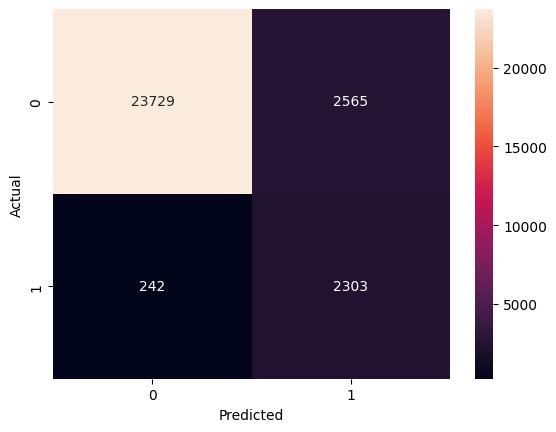

In [ ]:
# brfc model n_estimators=100, features and weighted
brfc_model_def_f_weighted = BalancedRandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=2)
brfc_model_def_f_weighted.fit(X_train_f, y_train_f)
evaluation(brfc_model_def_f_weighted, X_test_f, y_test_f)

Accuracy: 0.9006900377960401
Precision: 0.4675483214649034
Recall: 0.9029469548133595
F1-score: 0.6160857908847185

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94     26294
           1       0.47      0.90      0.62      2545

    accuracy                           0.90     28839
   macro avg       0.73      0.90      0.78     28839
weighted avg       0.94      0.90      0.91     28839



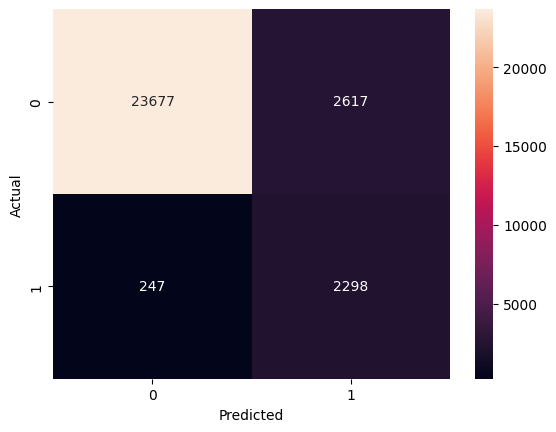

In [ ]:
# balanced rfc model with features and n_estimators=150
brfc_model_150_f = build_brfc(X_train_f, y_train_f)
evaluation(brfc_model_150_f, X_test_f, y_test_f)

Accuracy: 0.9019383473768161
Precision: 0.4709266488596671
Recall: 0.9005893909626719
F1-score: 0.6184565569347005

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94     26294
           1       0.47      0.90      0.62      2545

    accuracy                           0.90     28839
   macro avg       0.73      0.90      0.78     28839
weighted avg       0.94      0.90      0.92     28839



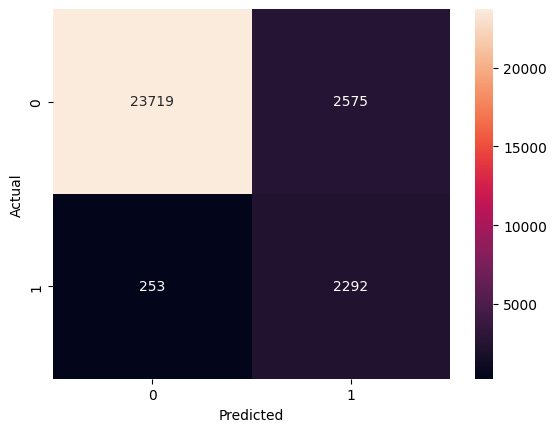

In [ ]:
# brfc model with importance features, additional trees and weighted
brfc_model_150_f_weighted = BalancedRandomForestClassifier(n_estimators=150, class_weight='balanced')
brfc_model_150_f_weighted.fit(X_train_f, y_train_f)
evaluation(brfc_model_150_f_weighted, X_test_f, y_test_f)

## Build Random Forest with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
smote_xr_train, smote_yr_train = smote.fit_resample(Xr_train, yr_train)
smote_xr_train_f, smote_yr_train_f = smote.fit_resample(X_train_f, y_train_f)

In [ ]:
smote_xr_train

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,73.000000,0,0,0,40.230000,6.200000,145
1,0,58.000000,0,0,1,35.150000,5.000000,100
2,0,75.000000,0,0,0,39.860000,6.200000,100
3,0,58.000000,0,0,1,41.380000,5.700000,130
4,1,48.000000,1,0,2,31.530000,3.500000,158
...,...,...,...,...,...,...,...,...
122699,0,51.952806,0,0,2,27.247793,5.751914,220
122700,0,76.089600,0,0,1,29.270112,6.635840,155
122701,0,21.442738,0,0,1,35.749255,6.800000,260
122702,1,52.001432,0,0,0,30.959857,6.599427,260


In [ ]:
smote_xr_train_f

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,76.000000,0,0,1,16.970000,5.800000,130
1,59.000000,0,1,1,26.800000,6.600000,158
2,15.000000,0,0,0,22.260000,6.200000,160
3,48.000000,1,0,0,38.880000,6.000000,90
4,74.000000,1,0,0,23.170000,6.500000,155
...,...,...,...,...,...,...,...
122699,73.072260,0,0,1,24.520281,6.500000,200
122700,60.371460,0,0,0,27.320000,6.414270,126
122701,55.651625,0,0,0,56.643231,6.239350,141
122702,66.226049,0,0,0,36.158860,6.486976,155


In [ ]:
smote_yr_train.value_counts()

diabetes
0    61352
1    61352
Name: count, dtype: int64

Training Random Forest dengan SWOTE

Accuracy: 0.9555809840840529
Precision: 0.7556634304207119
Recall: 0.7339882121807466
F1-score: 0.744668128363564

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     26294
           1       0.76      0.73      0.74      2545

    accuracy                           0.96     28839
   macro avg       0.86      0.86      0.86     28839
weighted avg       0.96      0.96      0.96     28839



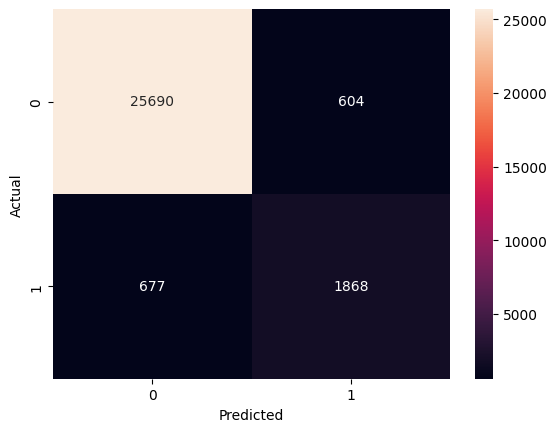

In [ ]:
# RFC model with default parameters and SMOTE
rfc_model_def_over = build_rfc(smote_xr_train, smote_yr_train)
evaluation(rfc_model_def_over, Xr_test, yr_test)

Accuracy: 0.9553382572211242
Precision: 0.7521058965102286
Recall: 0.7367387033398821
F1-score: 0.7443429932512903

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     26294
           1       0.75      0.74      0.74      2545

    accuracy                           0.96     28839
   macro avg       0.86      0.86      0.86     28839
weighted avg       0.95      0.96      0.96     28839



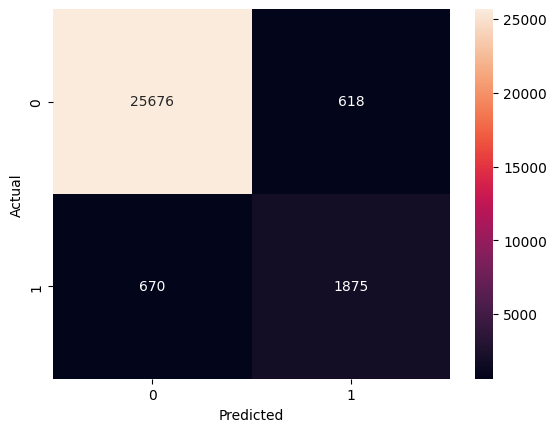

In [ ]:
# RFC model with parameter n_estimators=150 and SMOTE
rfc_model_150_over = build_rfc_150(smote_xr_train, smote_yr_train)
evaluation(rfc_model_150_over, Xr_test, yr_test)

Accuracy: 0.958493706439197
Precision: 0.7801330008312551
Recall: 0.737524557956778
F1-score: 0.7582306604726318

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     26294
           1       0.78      0.74      0.76      2545

    accuracy                           0.96     28839
   macro avg       0.88      0.86      0.87     28839
weighted avg       0.96      0.96      0.96     28839



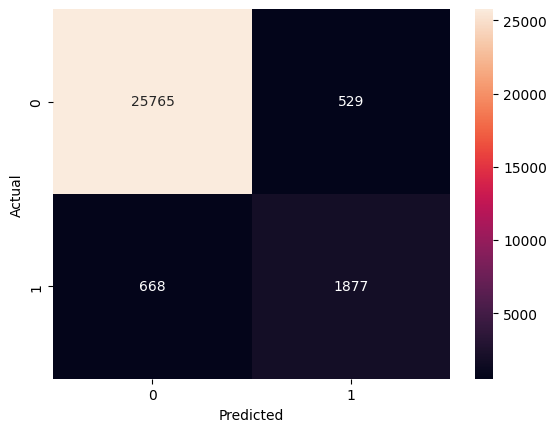

In [ ]:
# rfc model with selected importance features and SMOTE
rfc_model_150_f_over = build_rfc_150(smote_xr_train_f, smote_yr_train_f)
evaluation(rfc_model_150_f_over, X_test_f, y_test_f)

Accuracy: 0.9587017580359929
Precision: 0.7832635983263598
Recall: 0.7355599214145383
F1-score: 0.7586626139817629

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     26294
           1       0.78      0.74      0.76      2545

    accuracy                           0.96     28839
   macro avg       0.88      0.86      0.87     28839
weighted avg       0.96      0.96      0.96     28839



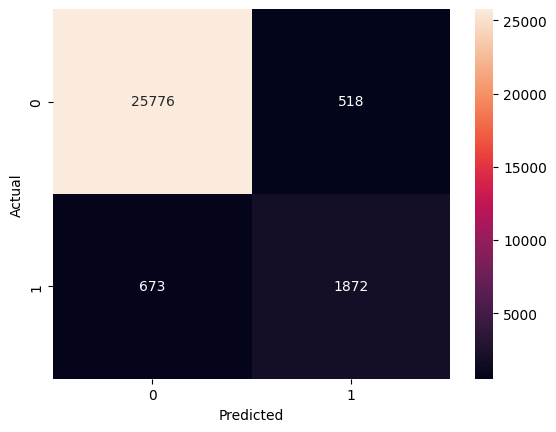

In [ ]:
# rfc model with selected importance features and SMOTE
rfc_model_def_f_over = build_rfc(smote_xr_train_f, smote_yr_train_f)
evaluation(rfc_model_def_f_over, X_test_f, y_test_f)

# Build Model Decision Tree and Evaluation

In [ ]:
X_train.shape

(67289, 8)

In [ ]:
y_train.shape

(67289,)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decision_tree_model = DecisionTreeClassifier(random_state=42)

decision_tree_model.fit(X_train, y_train)

train_accuracy = decision_tree_model.score(X_train, y_train)
val_accuracy = decision_tree_model.score(X_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)


Training Accuracy: 0.9990637399872193
Validation Accuracy: 0.9506917715593467


Accuracy: 0.9506917715593467
Precision: 0.7135793077215672
Recall: 0.7371316306483301
F1-score: 0.7251642829532277

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     26294
           1       0.71      0.74      0.73      2545

    accuracy                           0.95     28839
   macro avg       0.84      0.85      0.85     28839
weighted avg       0.95      0.95      0.95     28839



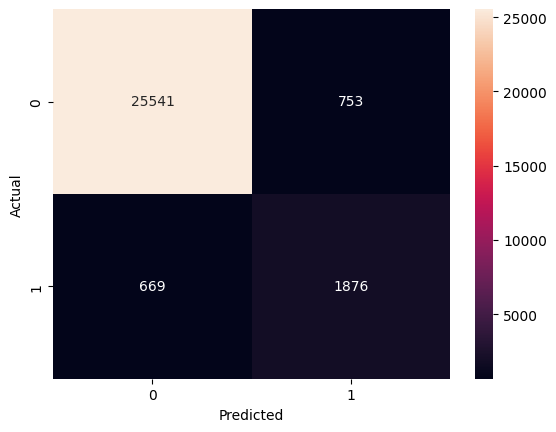

In [ ]:
evaluation(decision_tree_model, X_test, y_test)

## Hyperparameter Tuning Of Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 3, 5, 7],
    'criterion': ['gini', 'entropy']  # Add criterion hyperparameter
}

decision_tree_model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(decision_tree_model, param_grid, cv=5, n_jobs=-1, scoring='recall', verbose=3)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)

train_accuracy = best_model.score(X_train, y_train)
val_accuracy = best_model.score(X_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Training Accuracy: 0.9990637399872193
Validation Accuracy: 0.9505877457609487


Accuracy: 0.9505877457609487
Precision: 0.7134146341463414
Recall: 0.7355599214145383
F1-score: 0.7243180499129426

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     26294
           1       0.71      0.74      0.72      2545

    accuracy                           0.95     28839
   macro avg       0.84      0.85      0.85     28839
weighted avg       0.95      0.95      0.95     28839



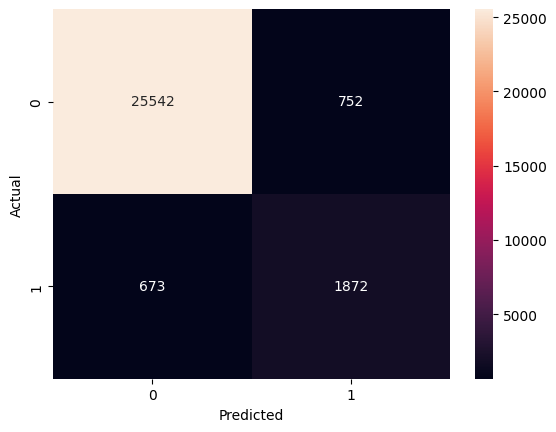

In [ ]:
evaluation(best_model, X_test, y_test)